Датасет `data.csv` містить дані про кредитування. Цільовою змінною є `loan_status` -- приймає 5 значень:

* *Charged Off* (кредит не повернуто)
* *Late (31-120 days)*
* *Late (16-30 days)* 
* *In Grace Period* 
* *Fully Paid*  

Файл `description.csv` не використовується у завданні, він містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.



In [1]:
import telebot

bot = telebot.TeleBot('5861146301:AAGDgM8vaKHq0rGBHwsGEkZlx603P1cbE58')

def send_message(text):
    bot.send_message("1148152159", text)  

send_message('Програму запущено')

In [2]:
import time


time_st = time.time()

### 1. Імпортувати датасет data.csv у об'єкт DataFrame і провести попередній аналіз даних засобами pandas, matplotlib, seaborn. Кожен графік чи візуалізація повинен супроводжуватися висновками.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

/home/user/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
desc_df = pd.read_csv("description.csv")
for i in range(desc_df.shape[0]):
    print(desc_df.loc[i, "Variable Name"], "-----", desc_df.loc[i, "Description"])

acc_now_delinq ----- The number of accounts on which the borrower is now delinquent.
annual_inc ----- The self-reported annual income provided by the borrower during registration.
application_type ----- Indicates whether the loan is an individual application or a joint application with two co-borrowers
collection_recovery_fee ----- post charge off collection fee
collections_12_mths_ex_med ----- Number of collections in 12 months excluding medical collections
delinq_2yrs ----- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti ----- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
emp_length ----- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
grade ----- LC assigned loan grade
home_ownership --

In [5]:
df = pd.read_csv("data.csv")
df.head(10)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,Fully Paid,21.12,1.0,...,78.00,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,Charged Off,30.98,0.0,...,0.00,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,Fully Paid,16.57,0.0,...,0.00,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,Charged Off,9.70,0.0,...,15.00,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,Fully Paid,16.59,0.0,...,0.00,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0
5,6000,7.89,187.72,A,9 years,MORTGAGE,53000.0,Fully Paid,6.61,0.0,...,0.00,0.00,0.000,4527.59,0.0,Individual,0.0,0.0,103923.0,15400.0
6,21000,30.94,691.60,G,NaN,MORTGAGE,90000.0,In Grace Period,26.44,1.0,...,34.58,0.00,0.000,726.18,0.0,Individual,0.0,0.0,295589.0,21100.0
7,10000,16.29,353.01,D,2 years,RENT,44000.0,Charged Off,12.06,2.0,...,17.65,0.00,0.000,370.66,0.0,Individual,0.0,0.0,11908.0,9300.0
8,15000,14.46,516.03,C,< 1 year,RENT,50750.0,Late (31-120 days),6.15,0.0,...,0.00,0.00,0.000,516.03,0.0,Individual,0.0,515.0,34575.0,11100.0
9,14400,11.99,320.25,C,4 years,RENT,66000.0,Late (31-120 days),26.67,0.0,...,0.00,0.00,0.000,320.25,0.0,Individual,0.0,0.0,107231.0,27800.0


In [6]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [7]:
cat_features, num_features = ["grade", "emp_length", "home_ownership", "application_type", "collections_12_mths_ex_med", "acc_now_delinq"], ["loan_amnt", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "total_acc", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "revol_util"]

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,19500.000000,19500.000000,19500.000000,1.950000e+04,19495.000000,19500.000000,19500.000000,9868.000000,19500.000000,19500.000000,...,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,18630.000000,1.863000e+04,18630.000000
mean,14821.008974,13.906393,448.408998,7.580852e+04,18.597095,0.330769,0.664000,34.047021,11.602462,0.225333,...,2545.939345,3.826898,298.539651,50.258535,4140.196449,0.018256,0.005077,222.111541,1.361425e+05,31819.256200
std,8838.026964,4.963300,265.330204,6.233493e+04,9.534863,0.879724,0.942594,21.996481,5.569023,0.628808,...,2746.267537,20.841700,1074.575286,190.363170,6461.795339,0.145975,0.074594,1443.977110,1.535275e+05,31987.610385
min,500.000000,5.310000,16.310000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,10.490000,257.880000,4.500000e+04,12.030000,0.000000,0.000000,15.000000,8.000000,0.000000,...,806.397500,0.000000,0.000000,0.000000,332.712500,0.000000,0.000000,0.000000,2.841575e+04,13700.000000
50%,12775.000000,13.350000,381.060000,6.500000e+04,17.980000,0.000000,0.000000,30.000000,11.000000,0.000000,...,1650.570000,0.000000,0.000000,0.000000,749.375000,0.000000,0.000000,0.000000,7.321900e+04,23500.000000
75%,20000.000000,16.990000,593.490000,9.000000e+04,24.590000,0.000000,1.000000,50.000000,14.000000,0.000000,...,3231.047500,0.000000,0.000000,0.000000,5795.580000,0.000000,0.000000,0.000000,2.038738e+05,39600.000000
max,40000.000000,30.990000,1546.520000,4.260016e+06,325.990000,16.000000,7.000000,135.000000,75.000000,28.000000,...,26822.380000,768.170000,26708.310000,4807.495800,40604.210000,4.000000,2.000000,44169.000000,3.078704e+06,778500.000000


In [9]:
df.duplicated().sum()

0

# Nan

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   19500 non-null  int64  
 1   int_rate                    19500 non-null  float64
 2   installment                 19500 non-null  float64
 3   grade                       19500 non-null  object 
 4   emp_length                  18281 non-null  object 
 5   home_ownership              19500 non-null  object 
 6   annual_inc                  19500 non-null  float64
 7   loan_status                 19500 non-null  object 
 8   dti                         19495 non-null  float64
 9   delinq_2yrs                 19500 non-null  float64
 10  inq_last_6mths              19500 non-null  float64
 11  mths_since_last_delinq      9868 non-null   float64
 12  open_acc                    19500 non-null  float64
 13  pub_rec                     195

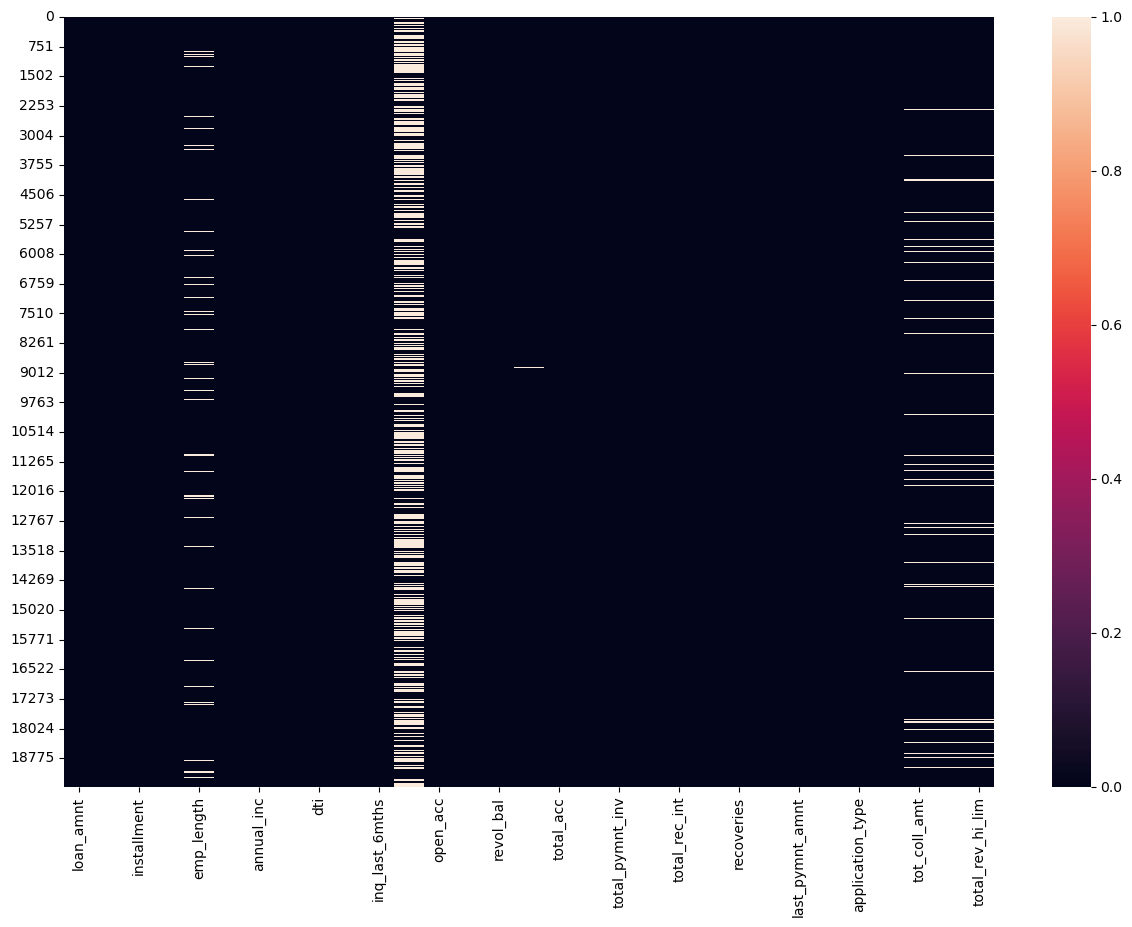

In [11]:
plot = sns.heatmap(df.isnull())
plot.figure.set_size_inches(15, 10)

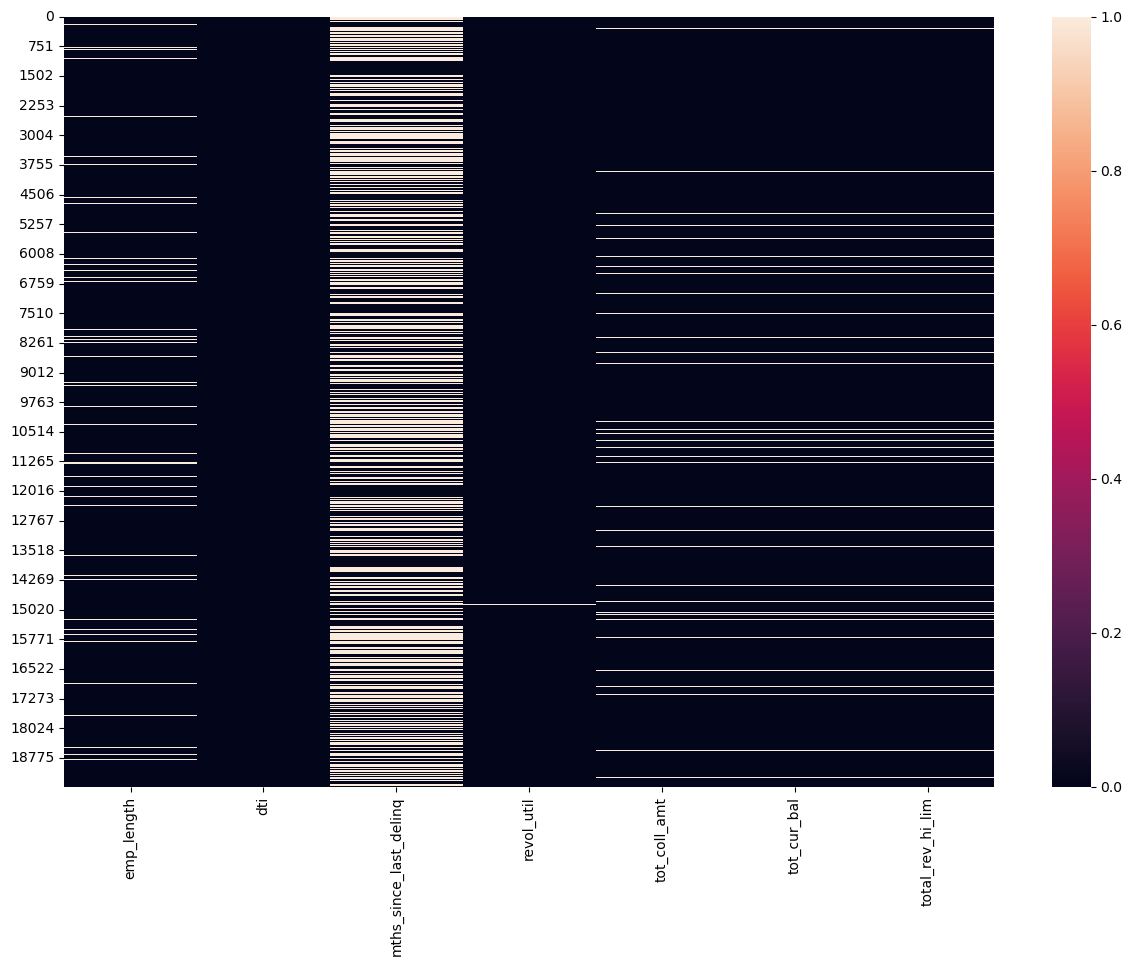

In [12]:
plot = sns.heatmap(df[["emp_length", "dti", "mths_since_last_delinq", "revol_util", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]].isnull())
plot.figure.set_size_inches(15, 10)

In [13]:
df["y_reg"] = np.where(df.loan_status == "Charged Off", 1, 0)
cor_nan = df[["dti", "mths_since_last_delinq", "revol_util", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]].corrwith(df.y_reg).abs().sort_values()
cor_nan

tot_coll_amt              0.000296
mths_since_last_delinq    0.011043
total_rev_hi_lim          0.062525
tot_cur_bal               0.066872
revol_util                0.069472
dti                       0.087245
dtype: float64

In [14]:
df[["emp_length"]].replace({'3 years': 3, '2 years': 2, '4 years': 4, '10+ years': 10, '9 years': 9, '< 1 year': 0, '8 years': 8, '6 years': 6, '1 year': 1, '5 years': 5, '7 years': 7}).corrwith(df.y_reg).abs().sort_values()

emp_length    0.010278
dtype: float64

In [15]:
df.drop("mths_since_last_delinq", axis=1, inplace=True)

In [16]:
df["emp_length"] = np.where(df.emp_length.isnull(), "< 1 year", df.emp_length)

In [17]:
df["dti"] = np.where(df.dti.isnull(), df.dti.mean(), df.dti)
df["revol_util"] = np.where(df.revol_util.isnull(), df.revol_util.mean(), df.revol_util)
df["tot_coll_amt"] = np.where(df.tot_coll_amt.isnull(), df.tot_coll_amt.mean(), df.tot_coll_amt)
df["tot_cur_bal"] = np.where(df.tot_cur_bal.isnull(), df.tot_cur_bal.mean(), df.tot_cur_bal)
df["total_rev_hi_lim"] = np.where(df.total_rev_hi_lim.isnull(), df.total_rev_hi_lim.mean(), df.total_rev_hi_lim)

In [18]:
df["y_reg"] = np.where(df.loan_status == "Charged Off", 1, 0)
cor_nan = df[["dti", "revol_util", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]].corrwith(df.y_reg).abs().sort_values()
cor_nan

tot_coll_amt        0.000289
total_rev_hi_lim    0.061106
tot_cur_bal         0.065355
revol_util          0.069436
dti                 0.087241
dtype: float64

In [19]:
df[["emp_length"]].replace({'3 years': 3, '2 years': 2, '4 years': 4, '10+ years': 10, '9 years': 9, '< 1 year': 0, '8 years': 8, '6 years': 6, '1 year': 1, '5 years': 5, '7 years': 7}).corrwith(df.y_reg).abs().sort_values()

emp_length    0.019387
dtype: float64

# Corr

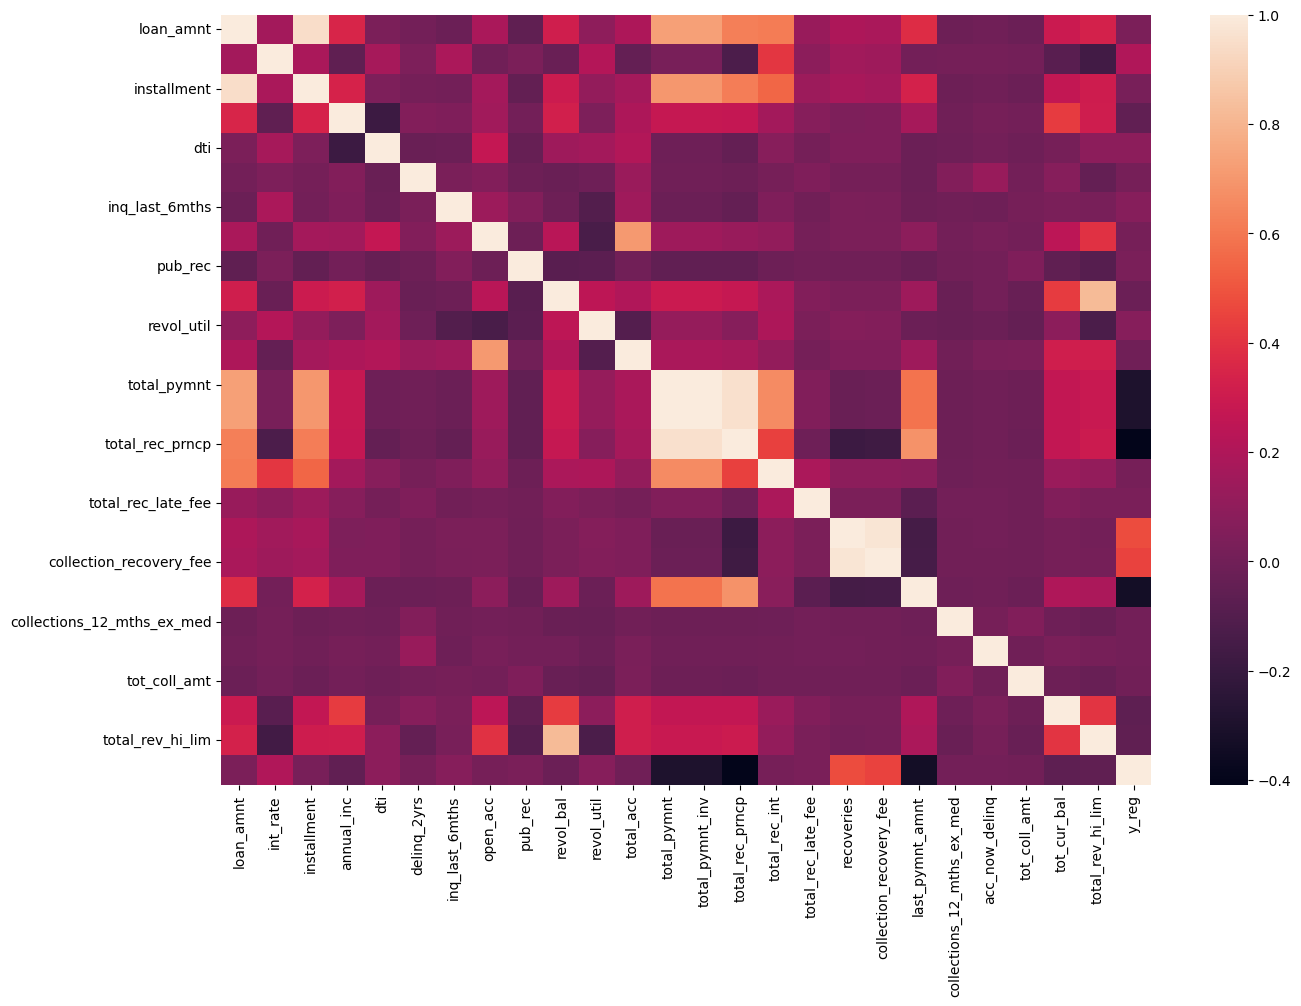

In [20]:
plot = sns.heatmap(df.corr())
plot.figure.set_size_inches(15, 10)

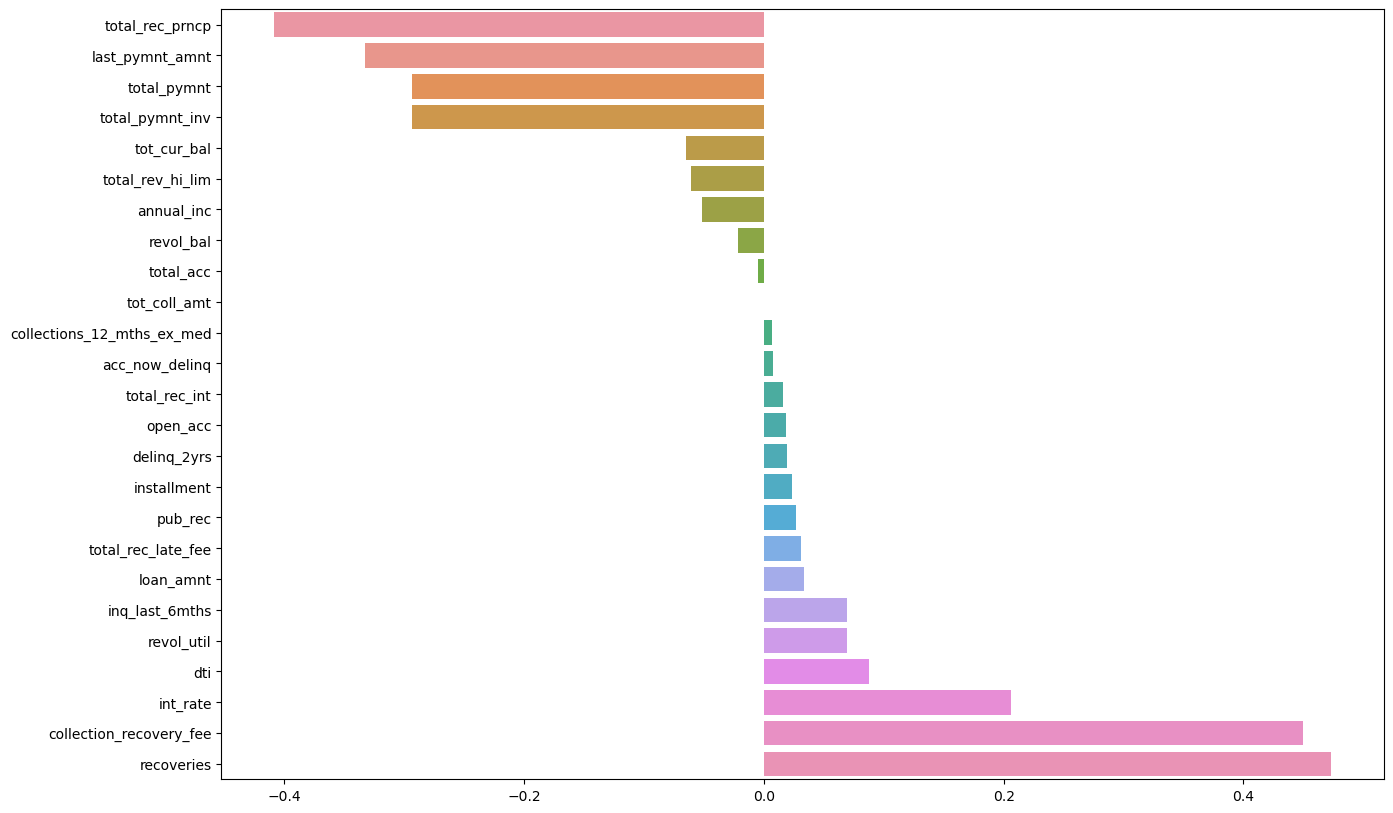

In [21]:
cor = df.drop("y_reg", axis=1).corrwith(df.y_reg).sort_values()

plot = sns.barplot(x=cor, y=cor.index)
plot.figure.set_size_inches(15, 10)

In [22]:
cor[cor.abs() > 0.2]

total_rec_prncp           -0.408411
last_pymnt_amnt           -0.333009
total_pymnt               -0.293547
total_pymnt_inv           -0.293158
int_rate                   0.206287
collection_recovery_fee    0.449611
recoveries                 0.473124
dtype: float64

# Dist

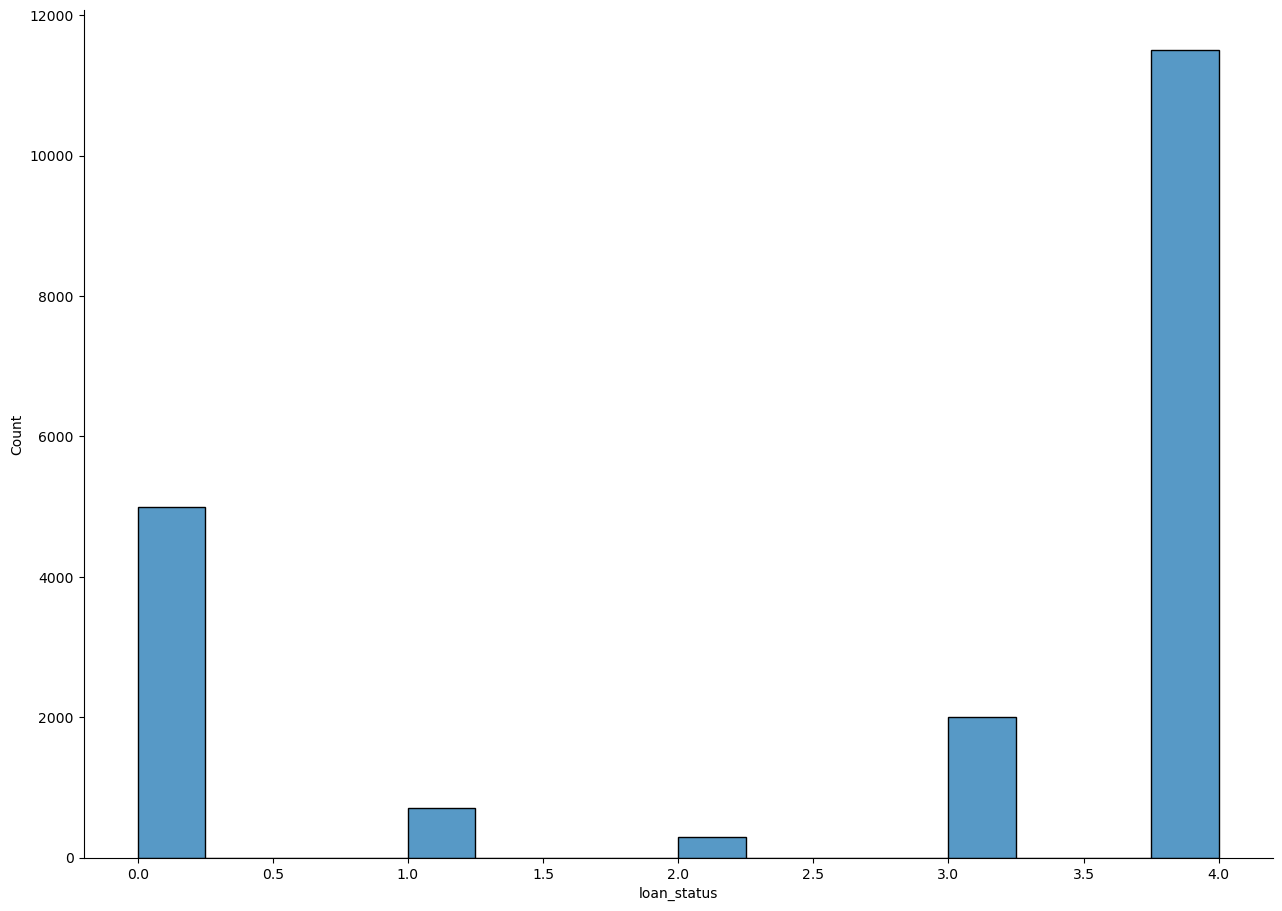

In [23]:
plot = sns.displot(df.loan_status.map({'Fully Paid': 4, 'Charged Off': 0, 'In Grace Period': 1, 'Late (31-120 days)': 3, 'Late (16-30 days)': 2}))
plot.figure.set_size_inches(15, 10)

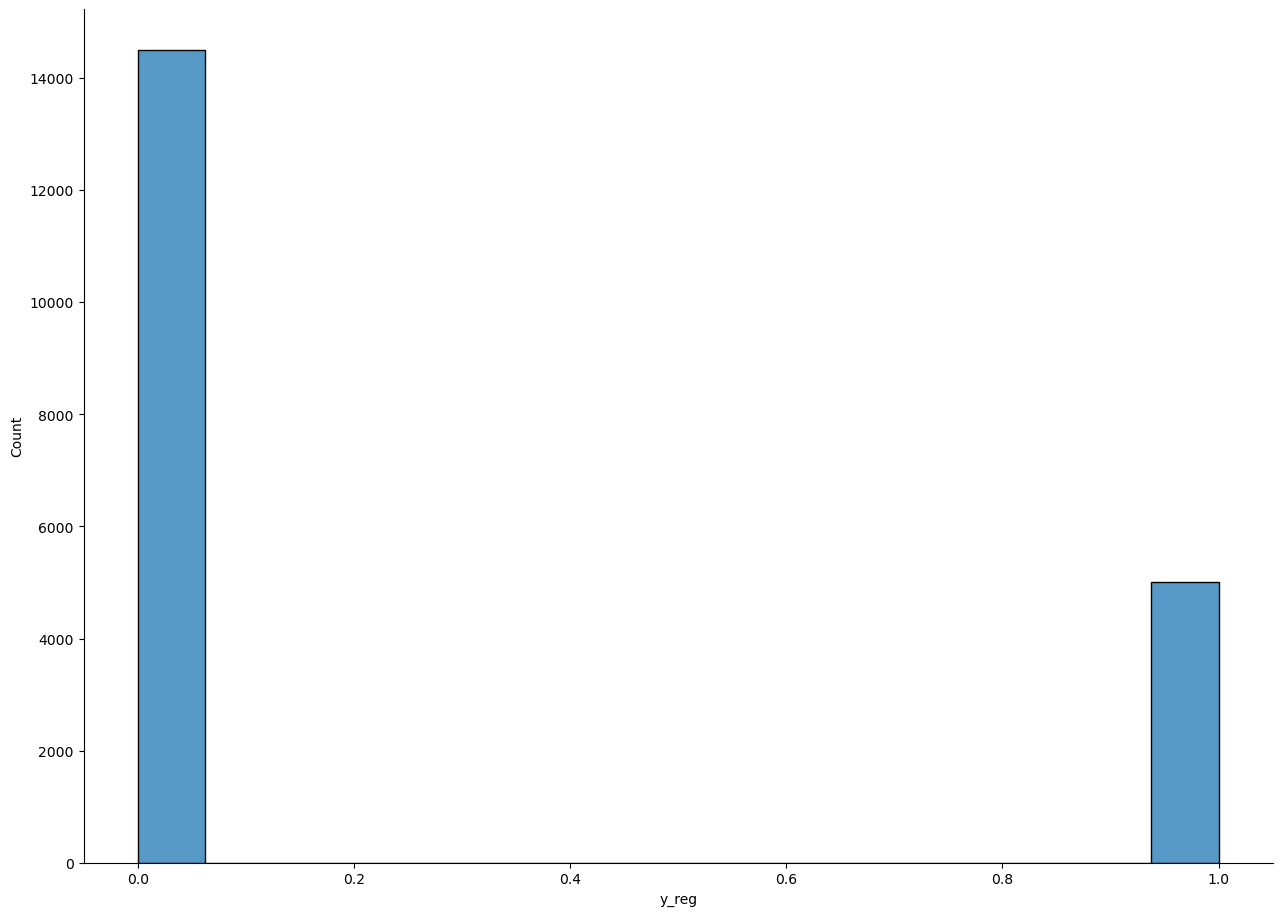

In [24]:
plot = sns.displot(df.y_reg.astype(int))
plot.figure.set_size_inches(15, 10)

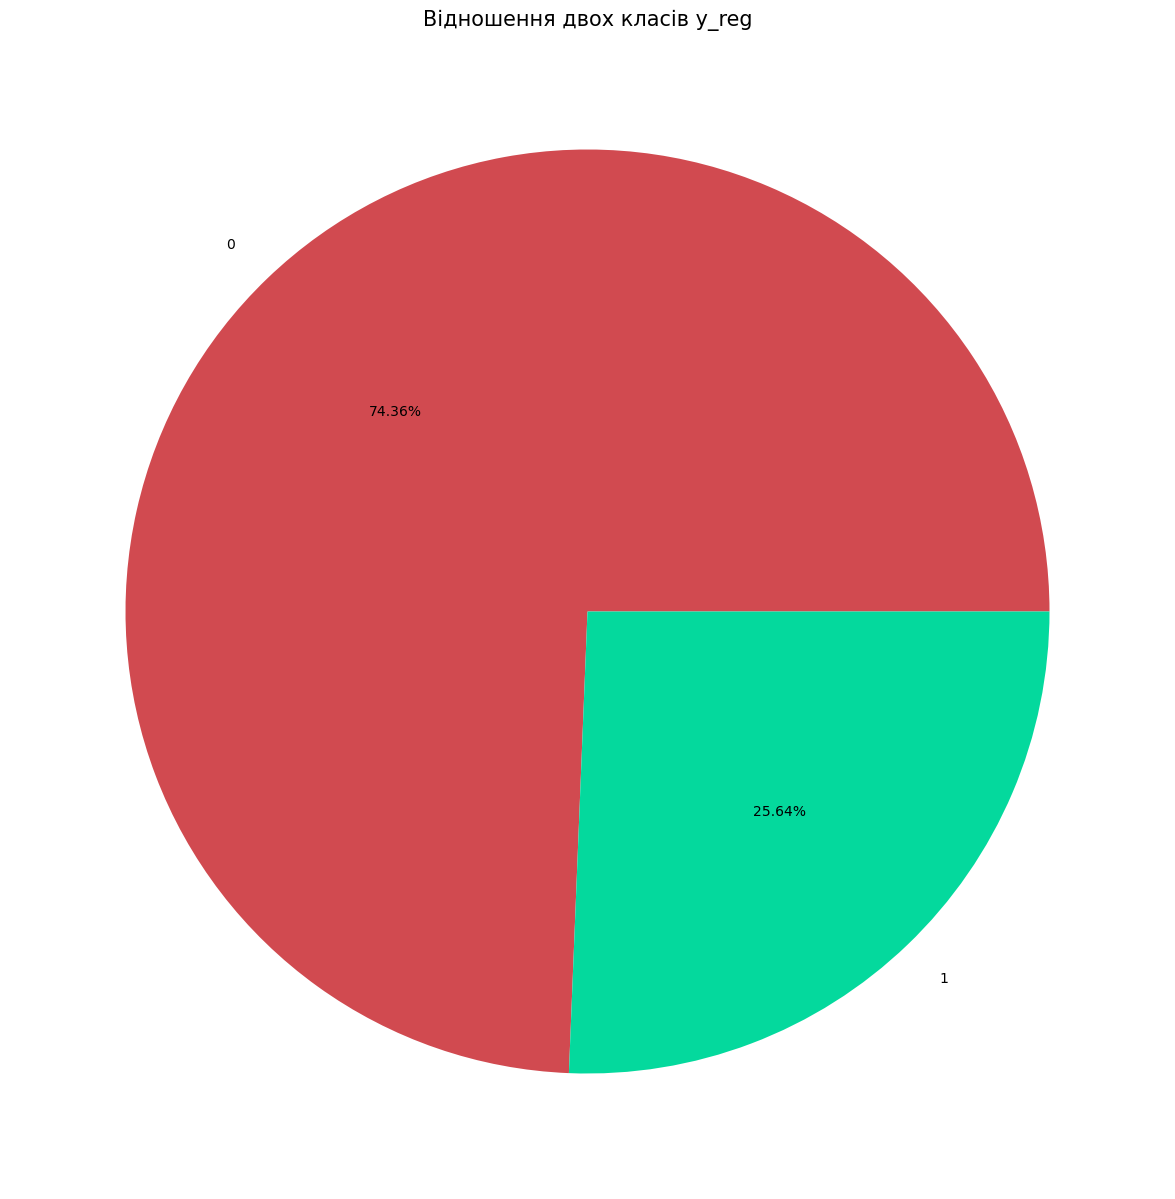

In [25]:
plt.figure(figsize=(20, 15))

plt.pie(df.y_reg.value_counts().sort_index(), autopct = "%1.2f%%", labels=["0", "1"], colors=["#D14A50", "#04D99D"])
plt.title("Відношення двох класів y_reg", fontsize=15)
plt.show()

# Feature anal

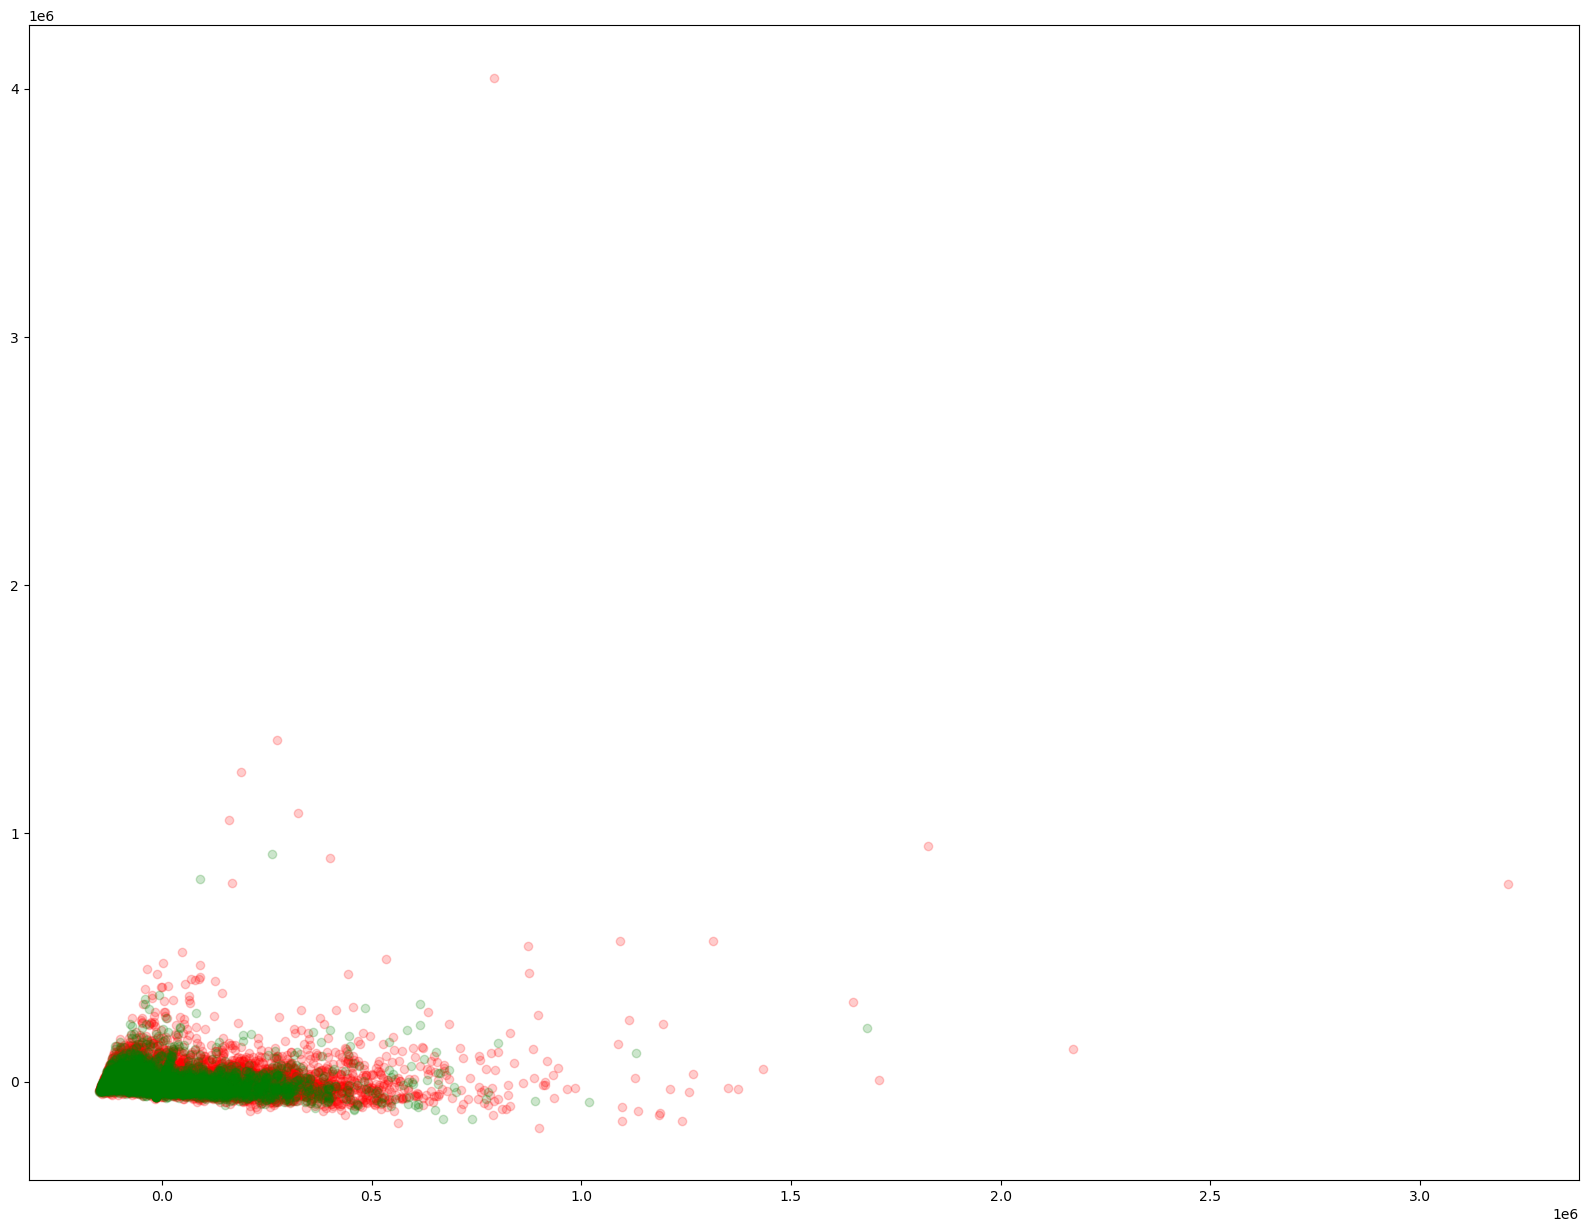

In [26]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20, 15))

pca_plot = PCA(n_components=2)

X_plot = pca_plot.fit_transform(df[num_features].replace({np.nan: 0}))


plt.scatter(X_plot[df.y_reg == 0][:, 0], X_plot[df.y_reg == 0][:, 1], c="red", alpha=0.2)
plt.scatter(X_plot[df.y_reg == 1][:, 0], X_plot[df.y_reg == 1][:, 1], c="green", alpha=0.2)

plt.show()

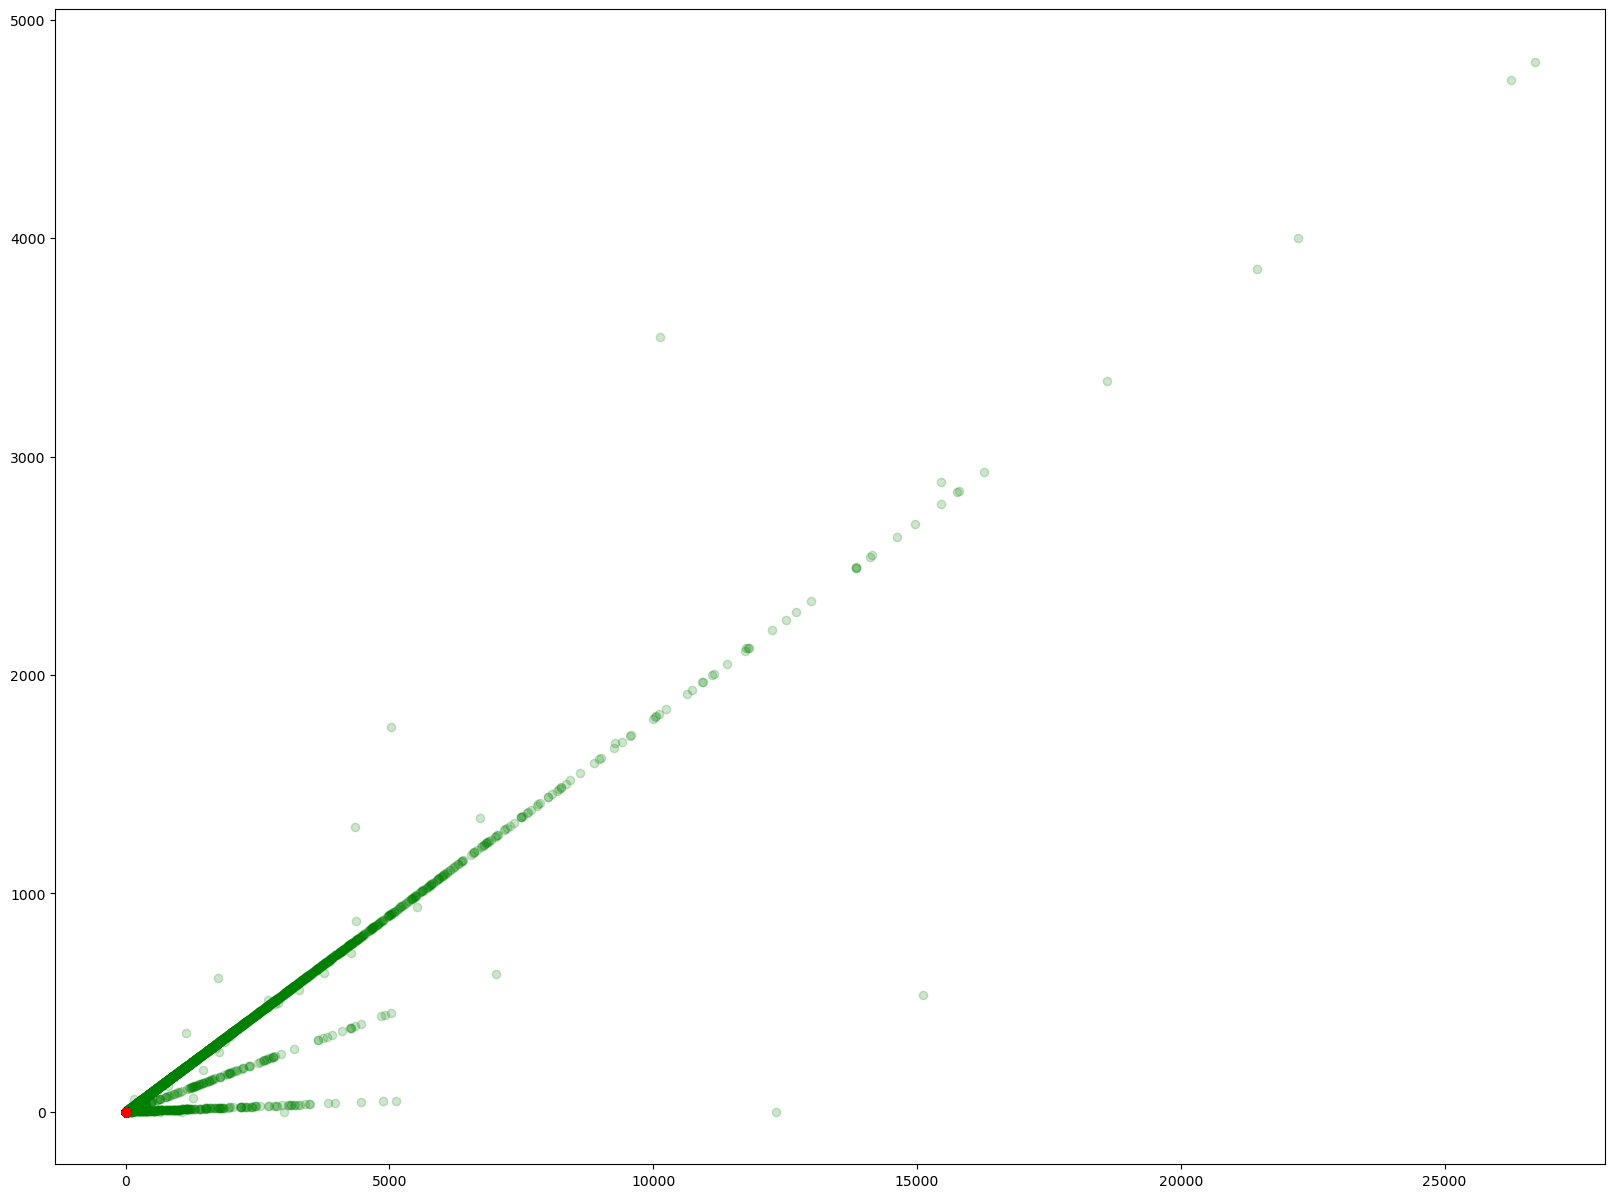

In [27]:
from sklearn.feature_selection import SelectKBest

plt.figure(figsize=(20, 15))

select_k = SelectKBest(k=2)

X_plot = select_k.fit_transform(df[num_features].replace({np.nan: 0}), df.y_reg)

plt.scatter(X_plot[df.y_reg == 1][:, 0], X_plot[df.y_reg == 1][:, 1], c="green", alpha=0.2)
plt.scatter(X_plot[df.y_reg == 0][:, 0], X_plot[df.y_reg == 0][:, 1], c="red", alpha=0.2)

plt.show()


In [28]:
select_k.get_feature_names_out()

array(['recoveries', 'collection_recovery_fee'], dtype=object)

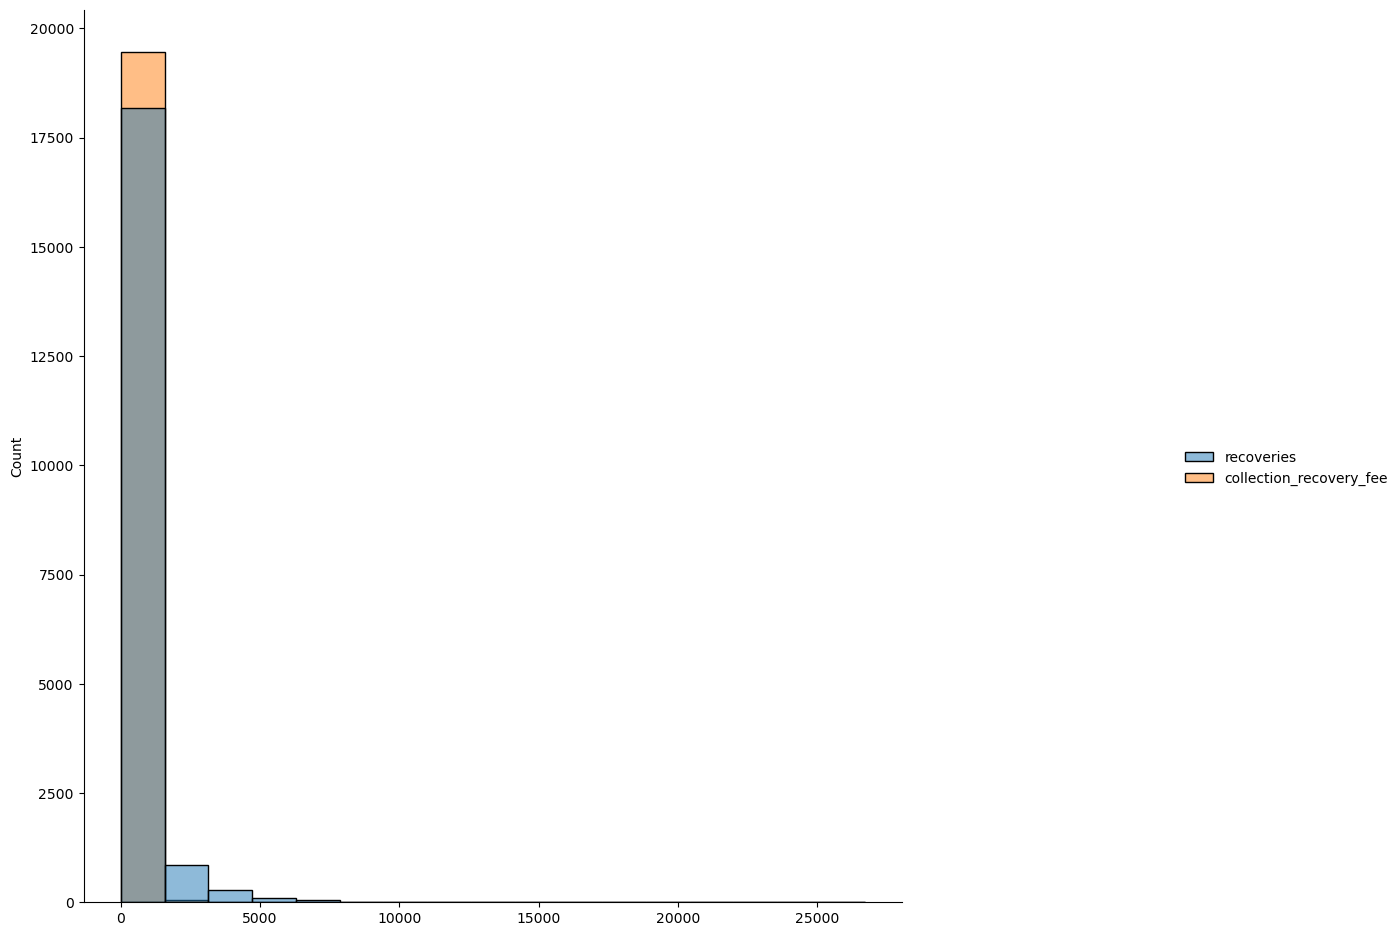

In [29]:
plot = sns.displot(df[['recoveries', 'collection_recovery_fee']])
plot.figure.set_size_inches(15, 10)

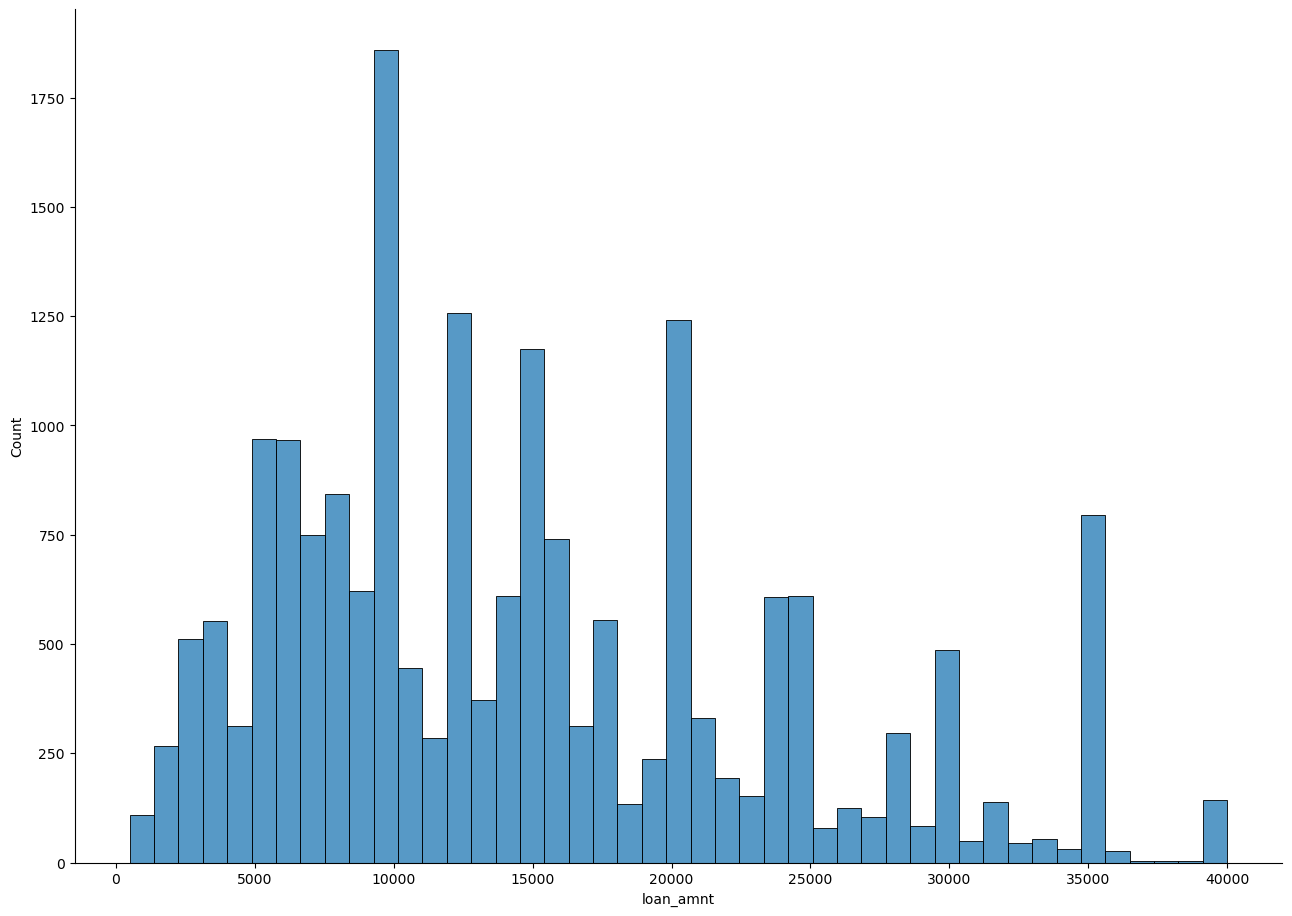

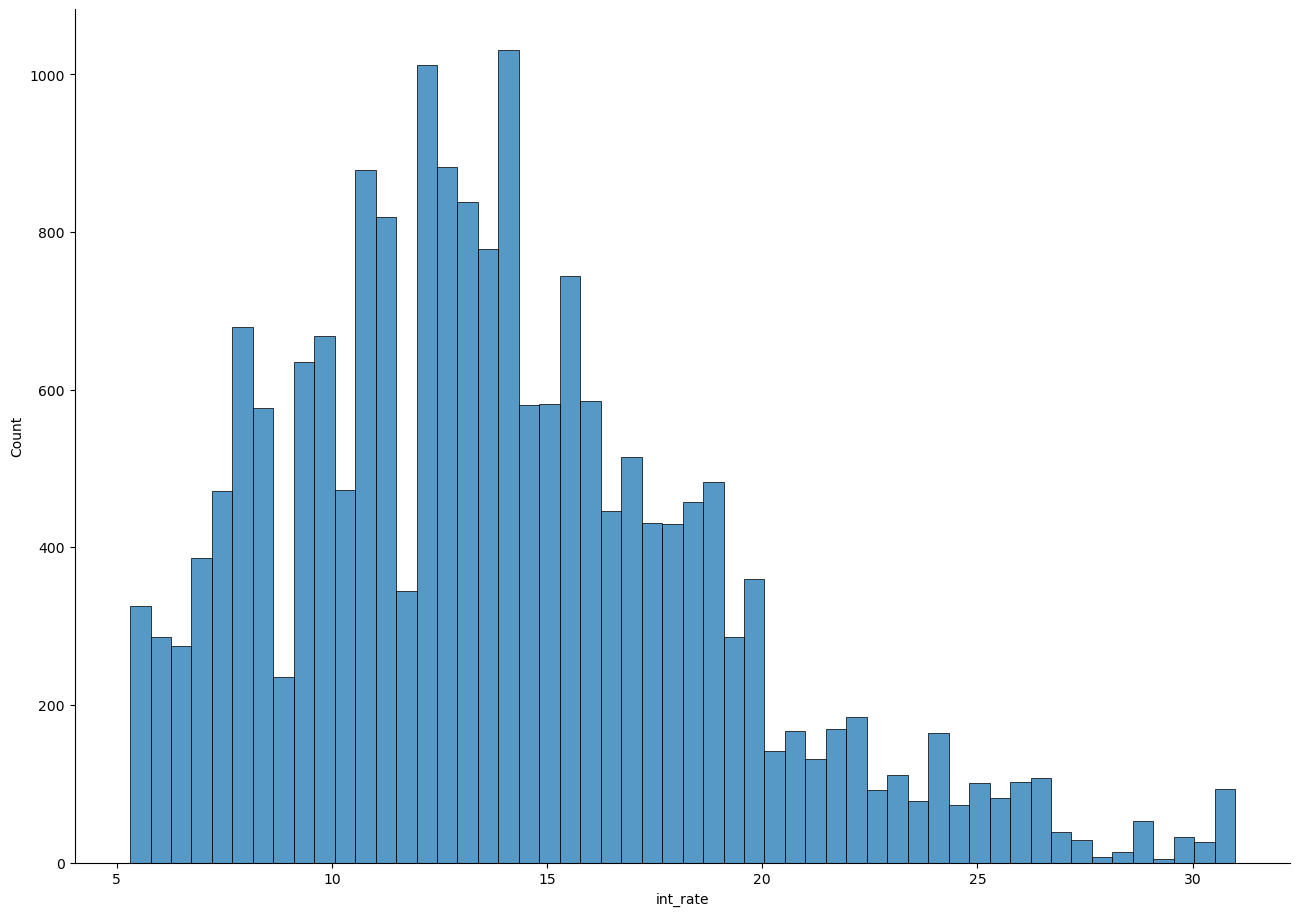

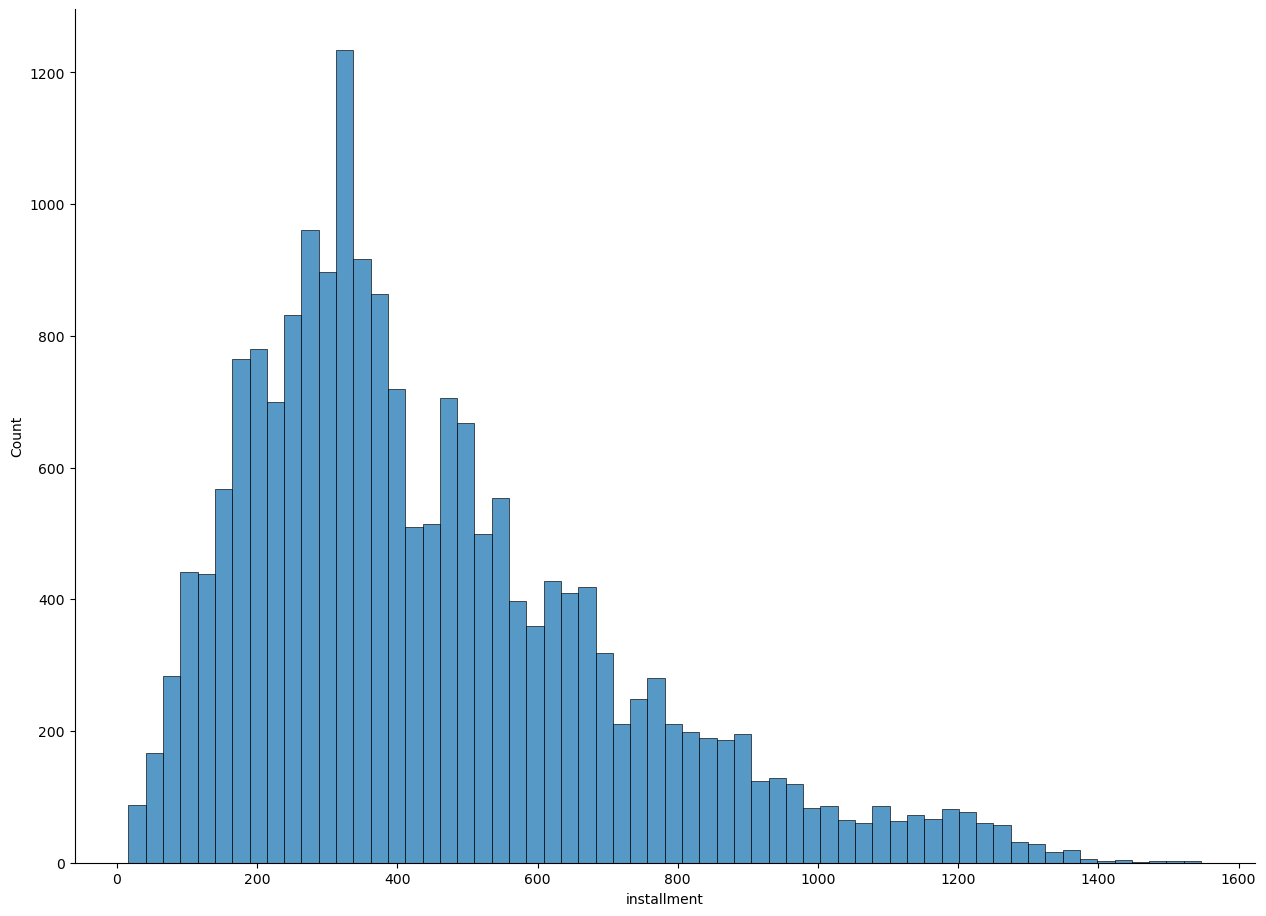

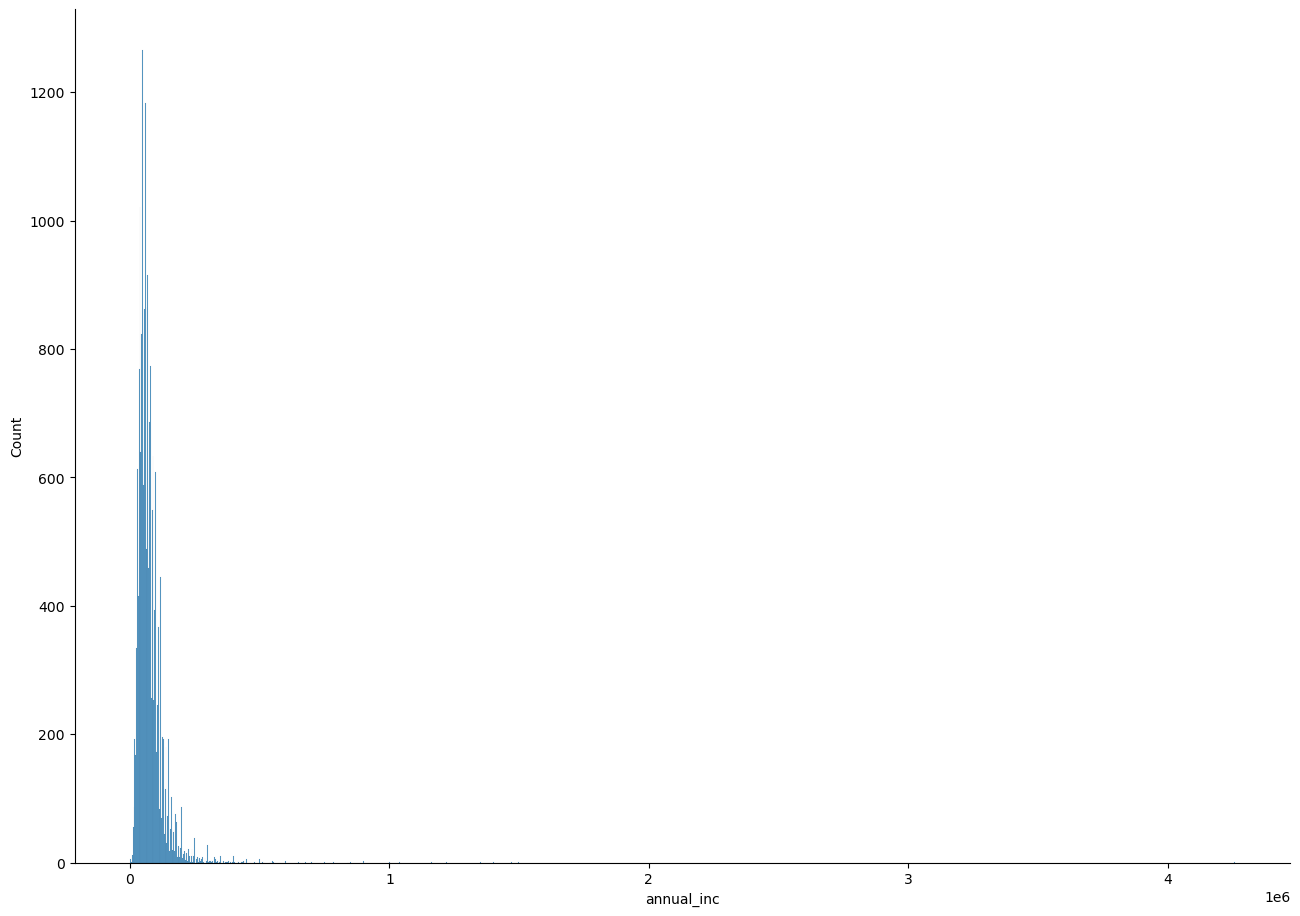

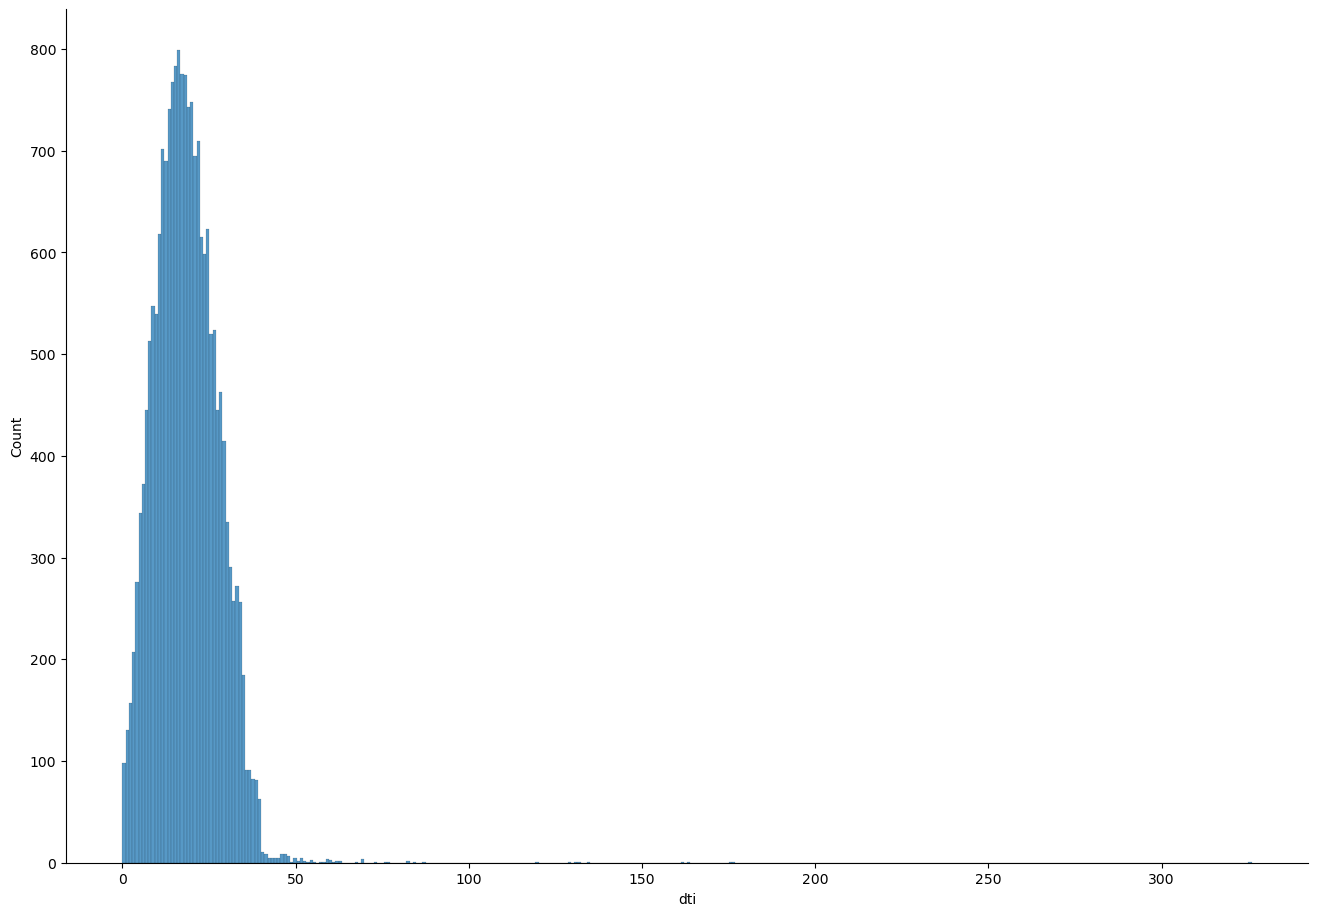

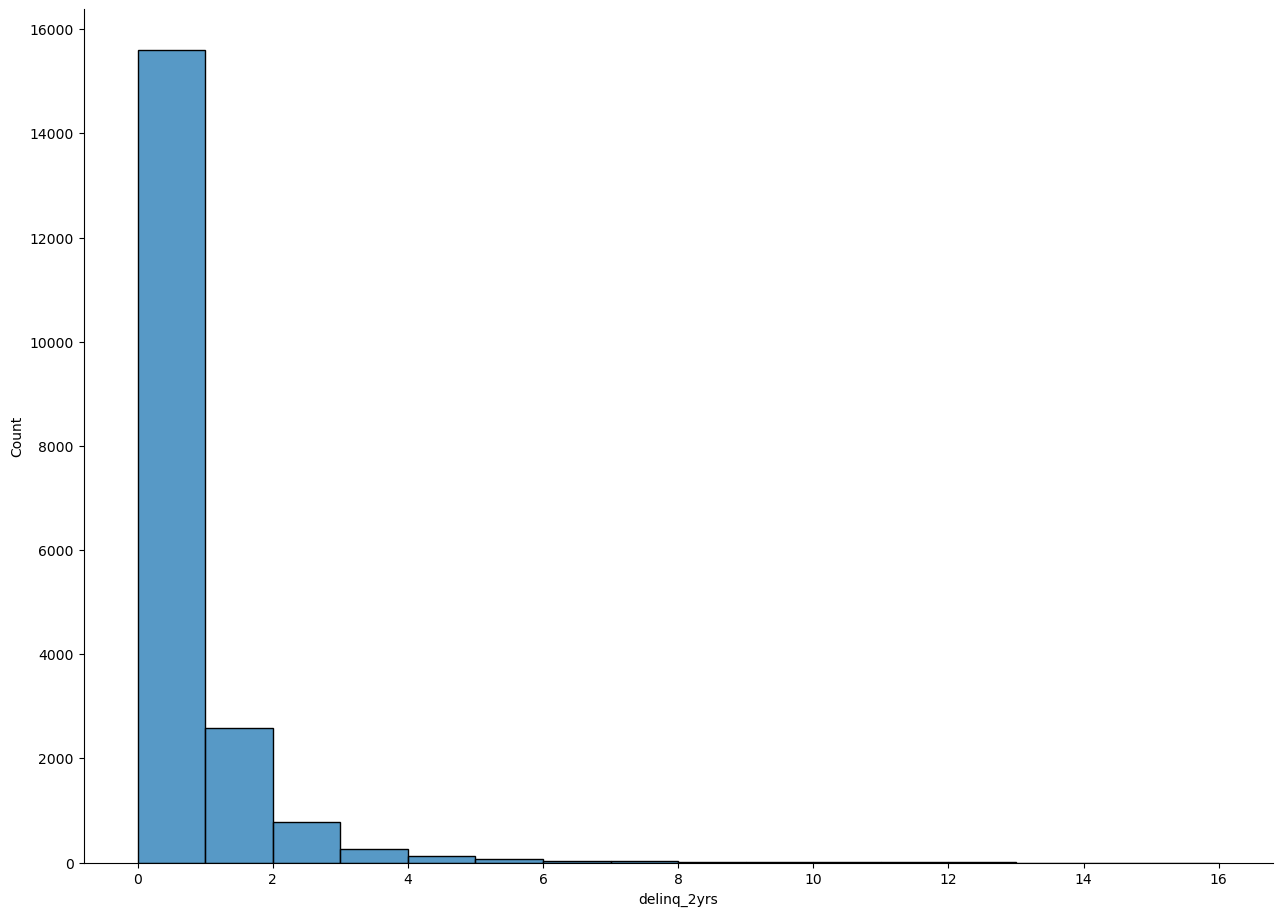

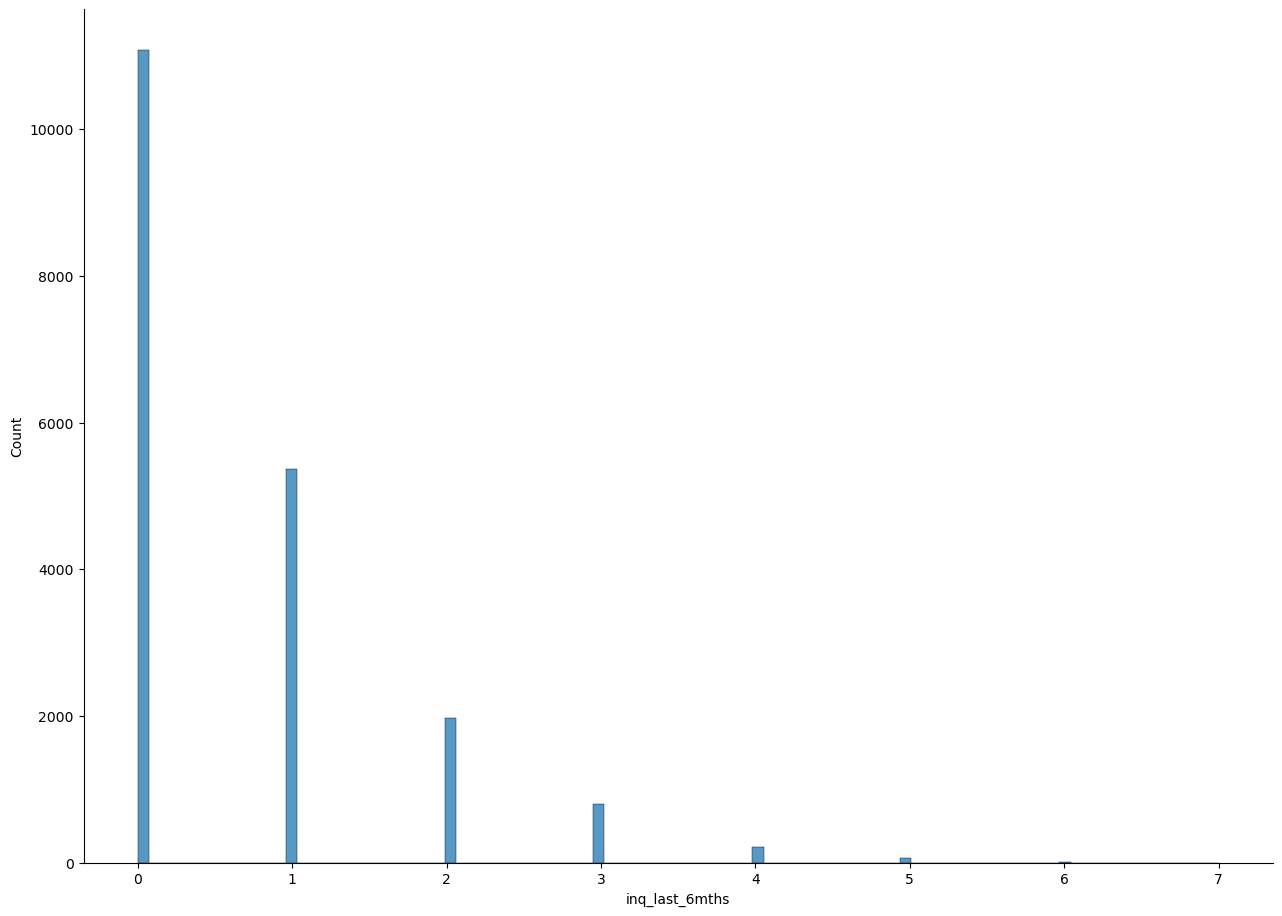

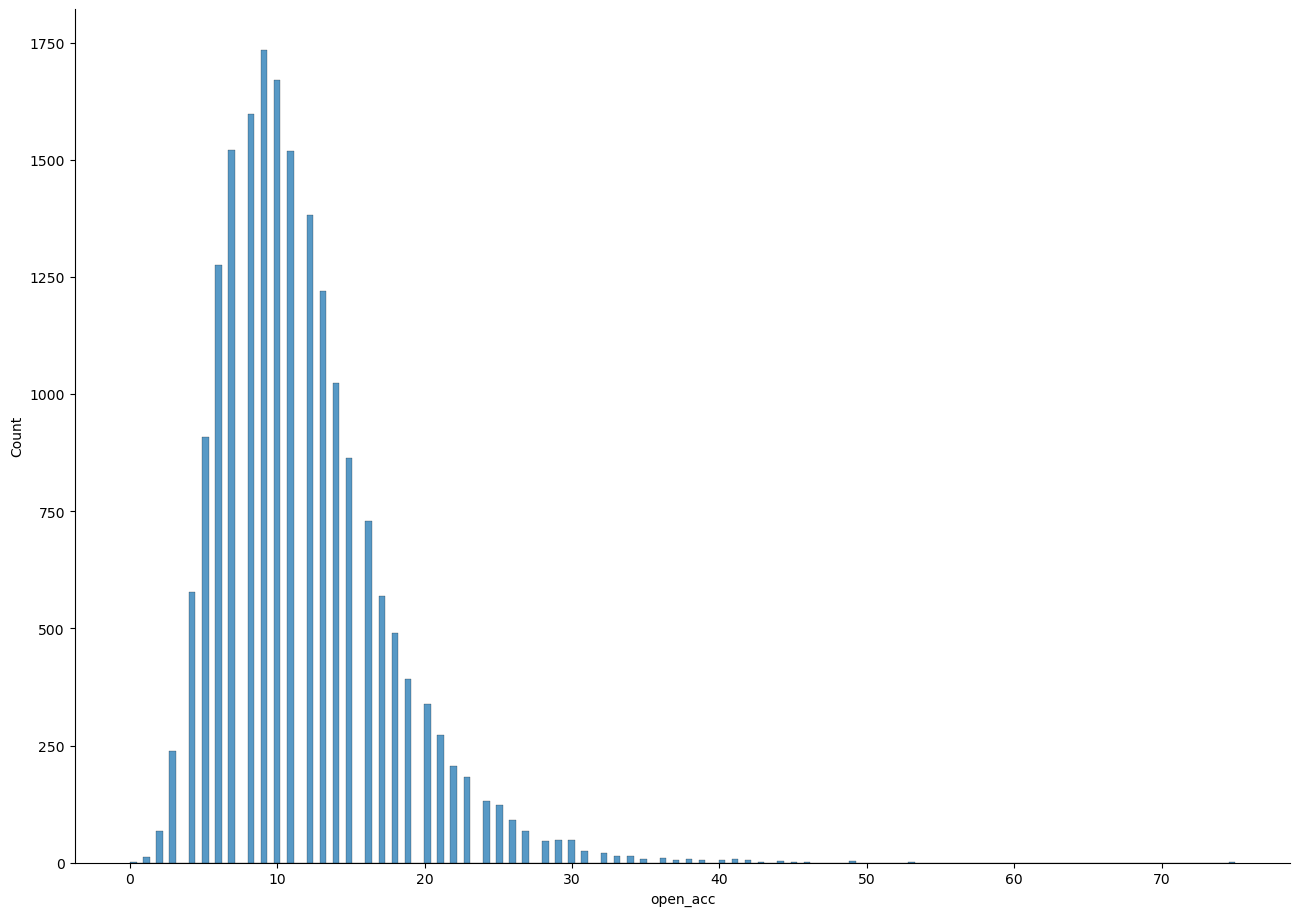

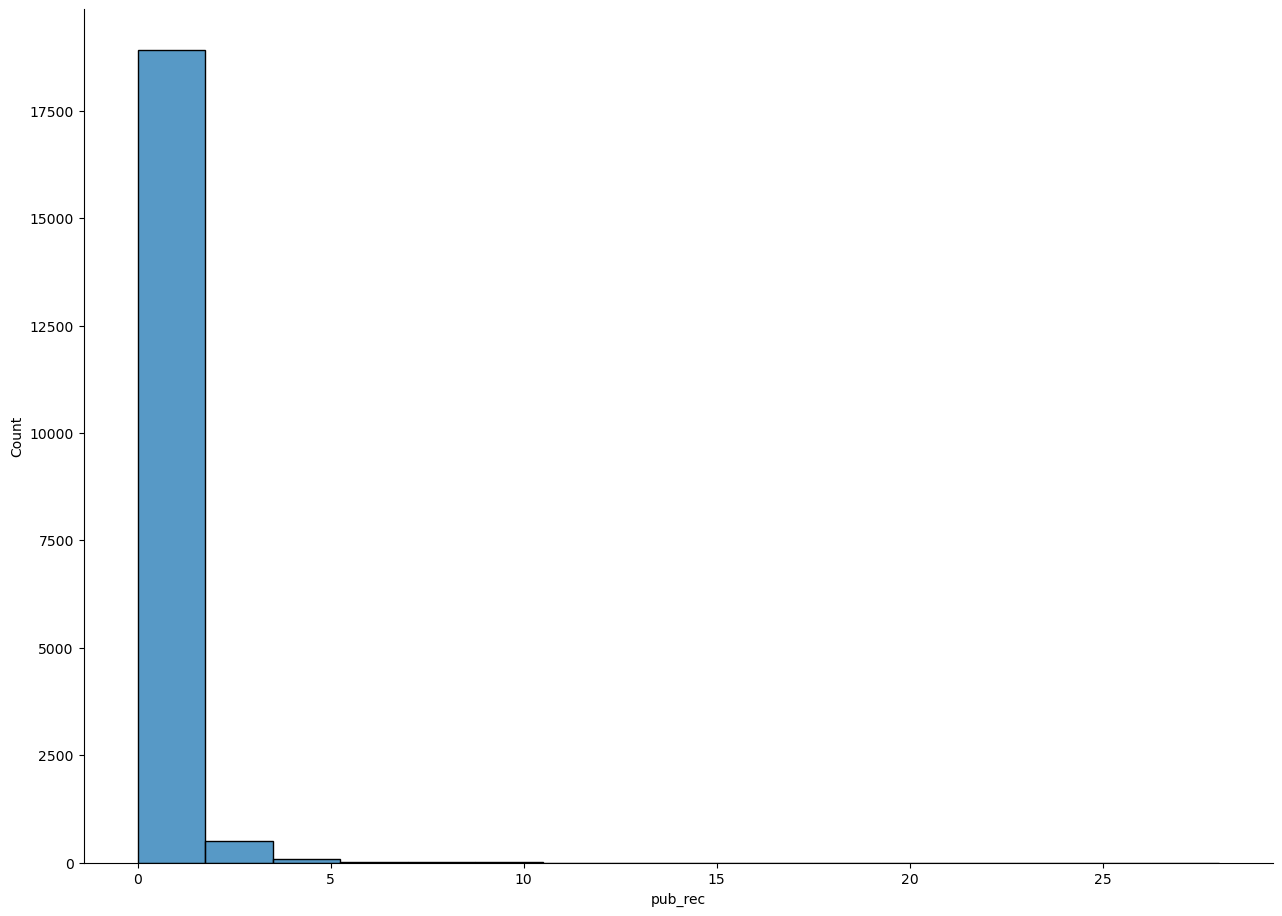

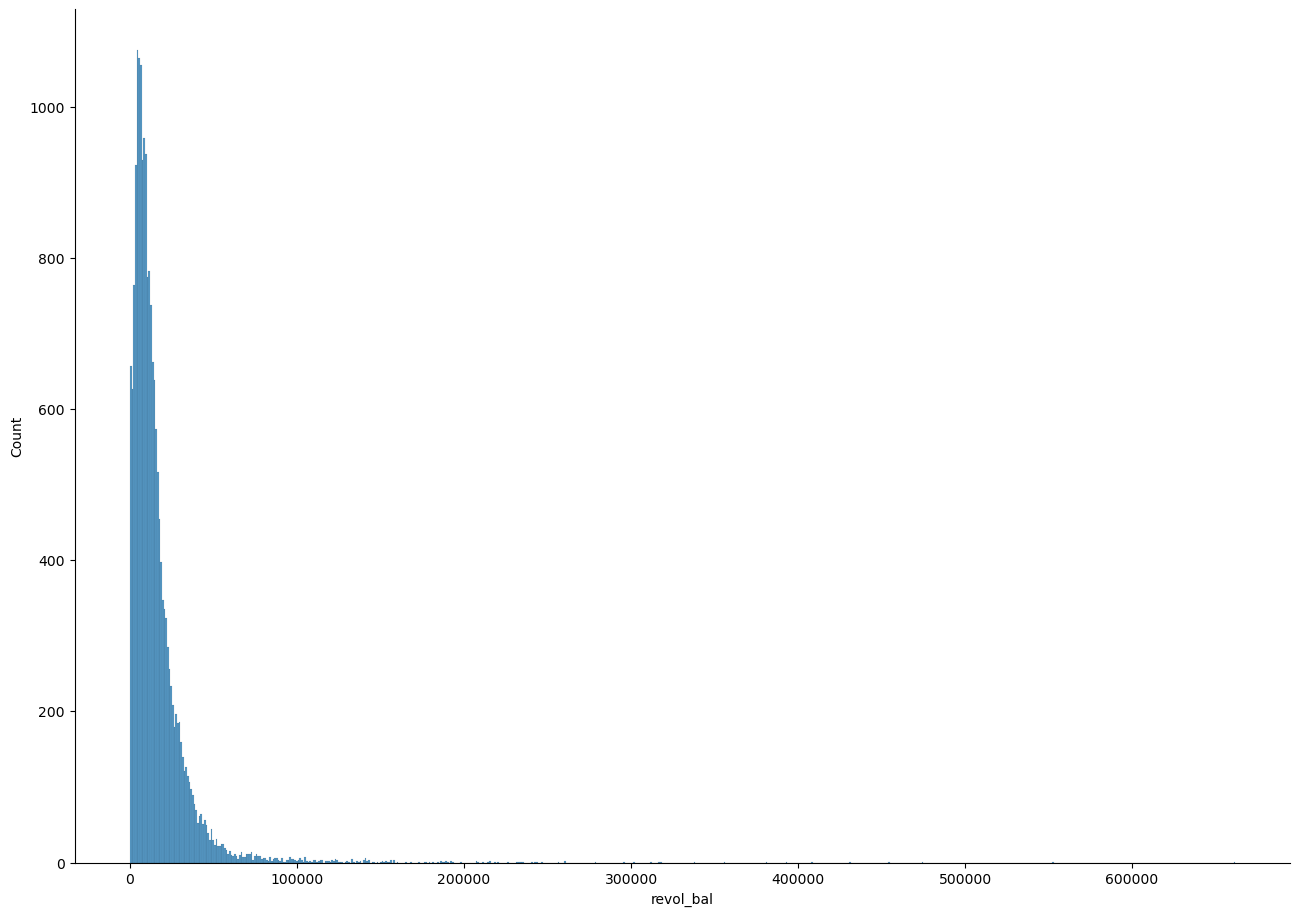

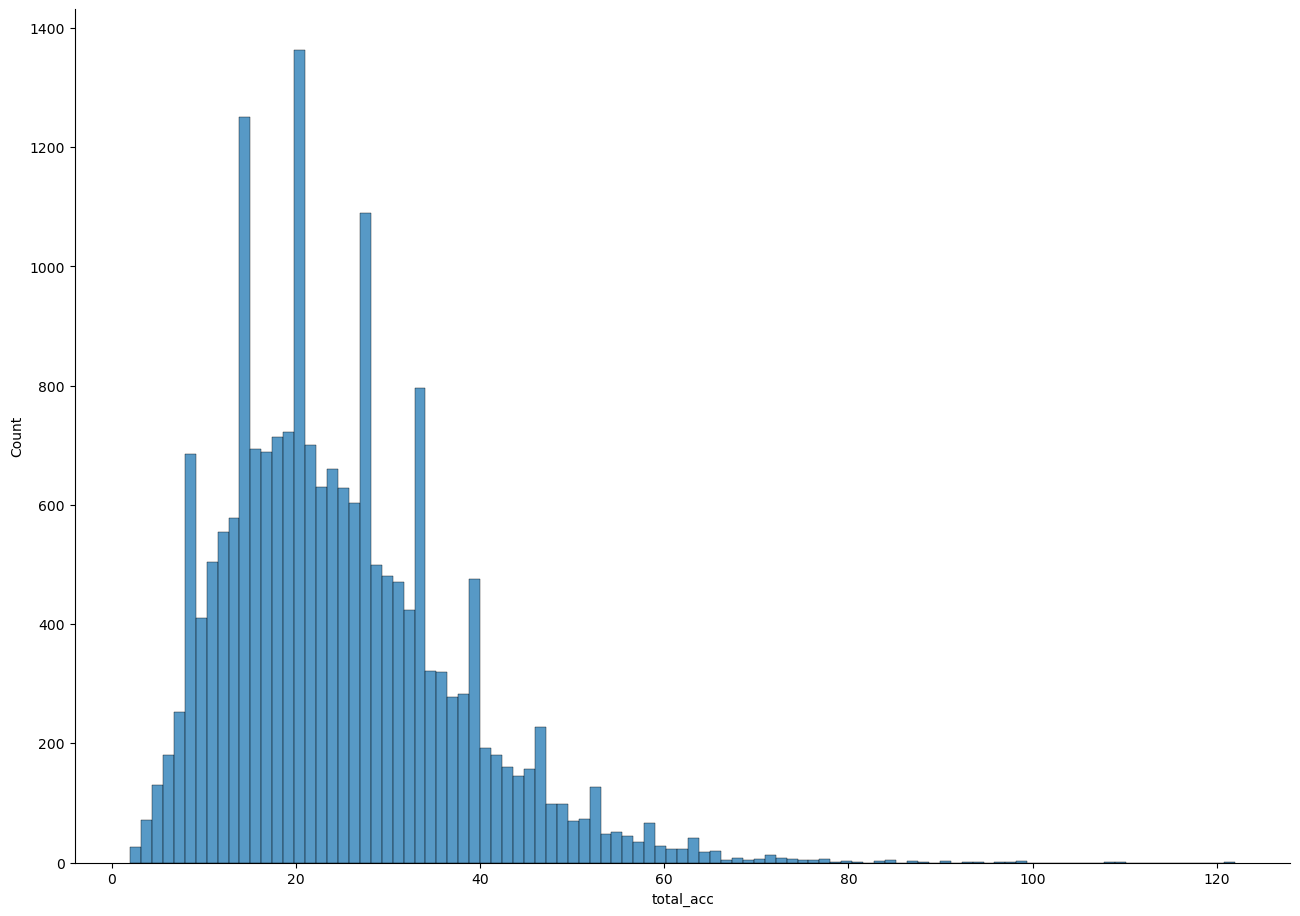

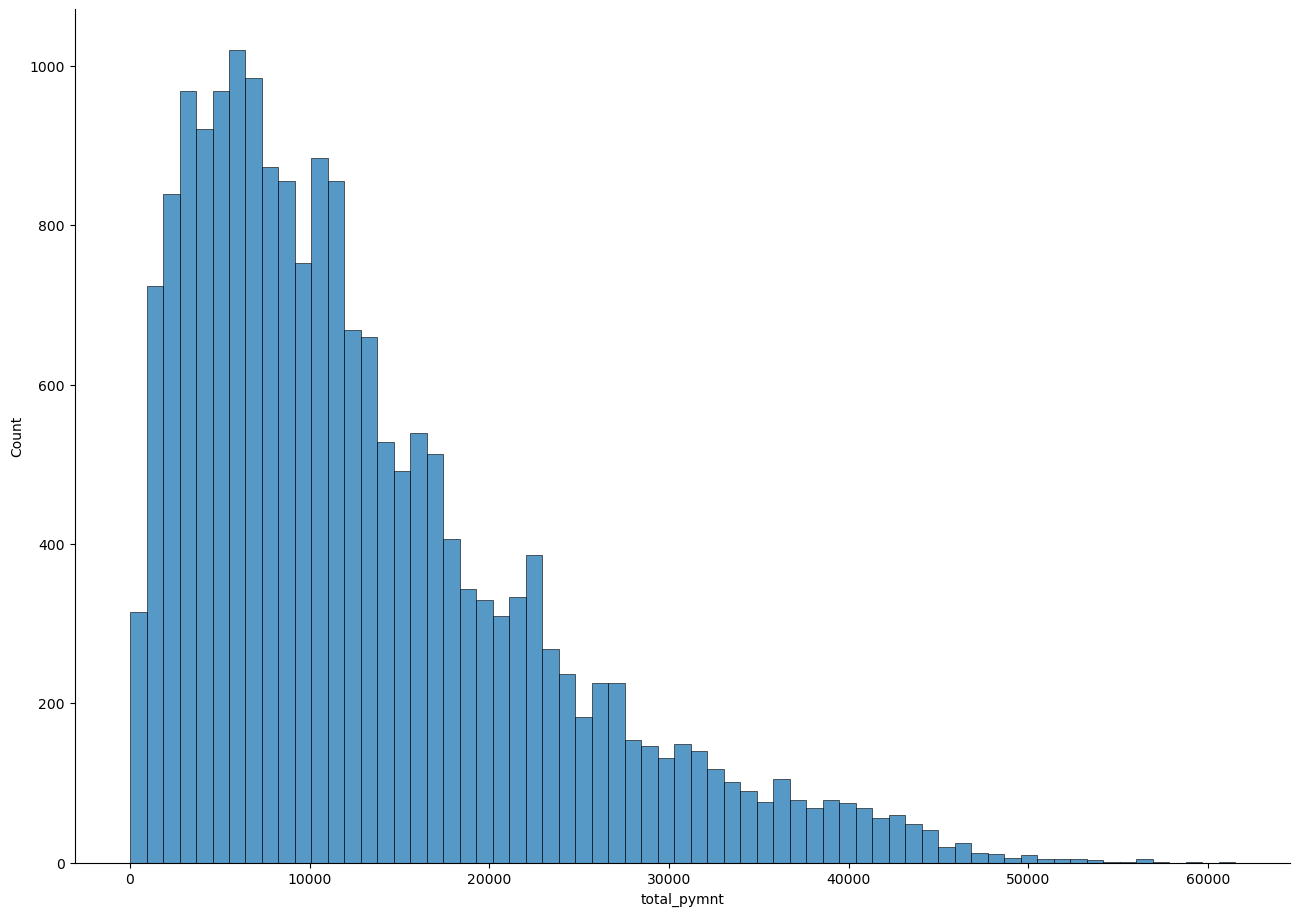

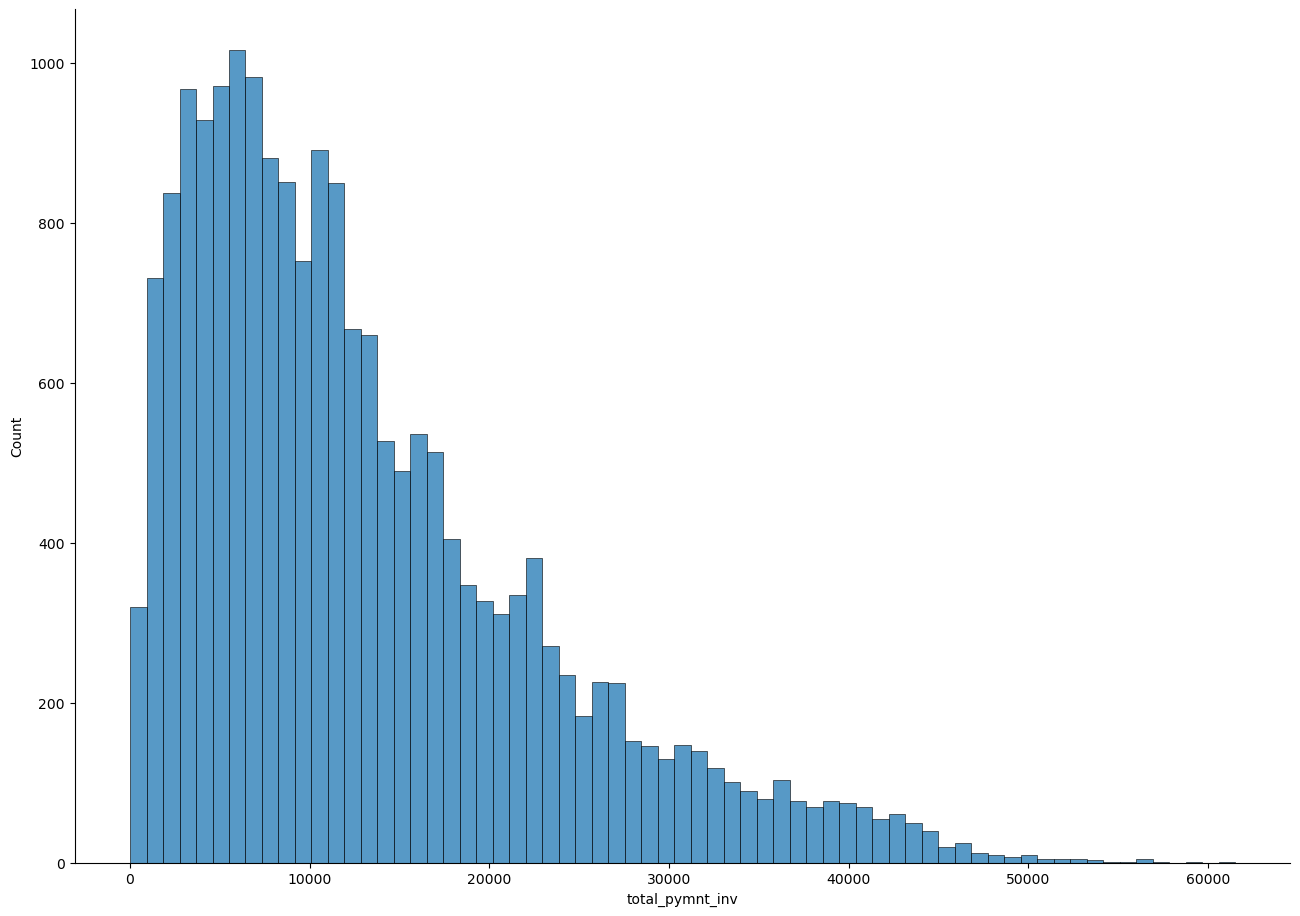

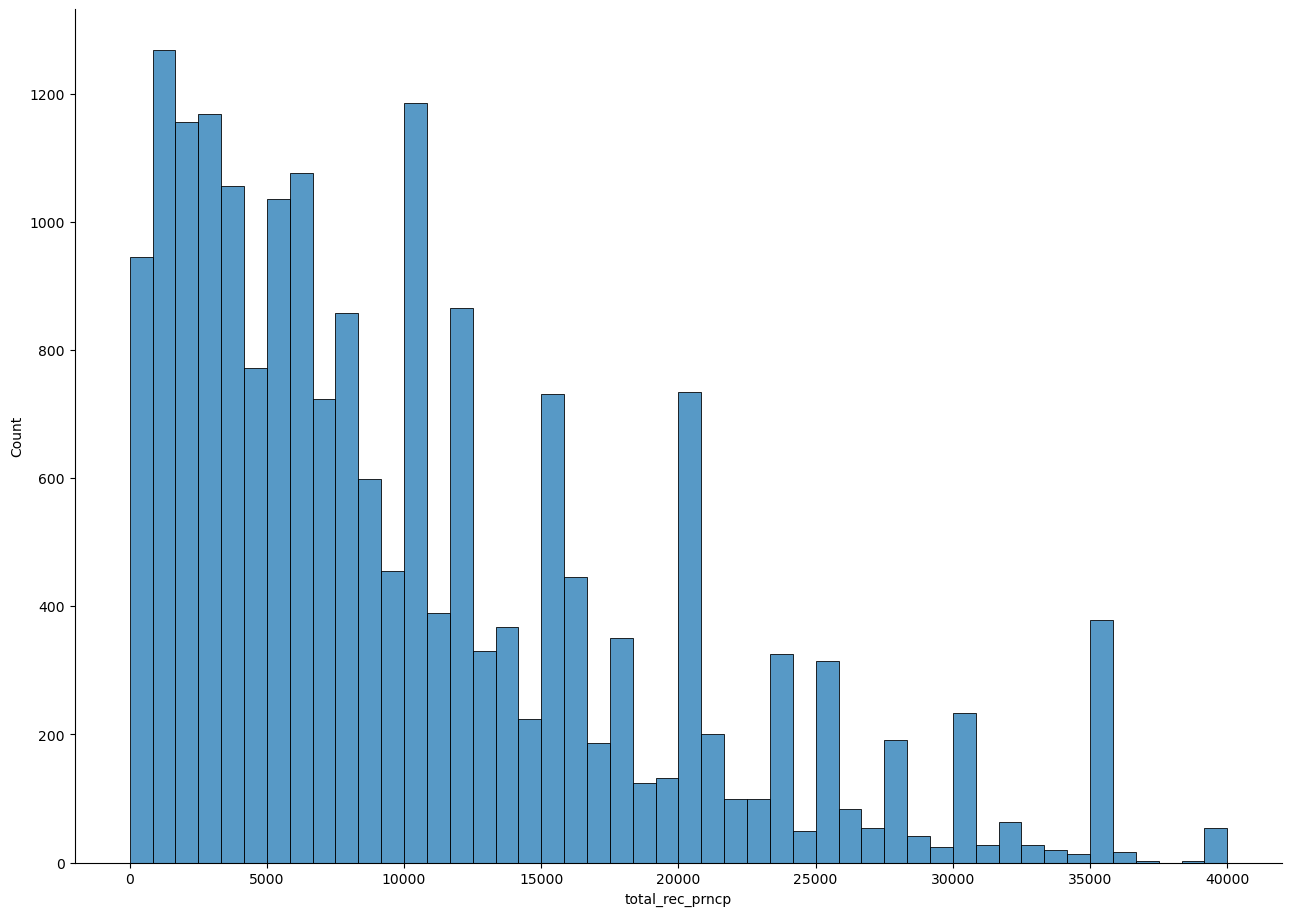

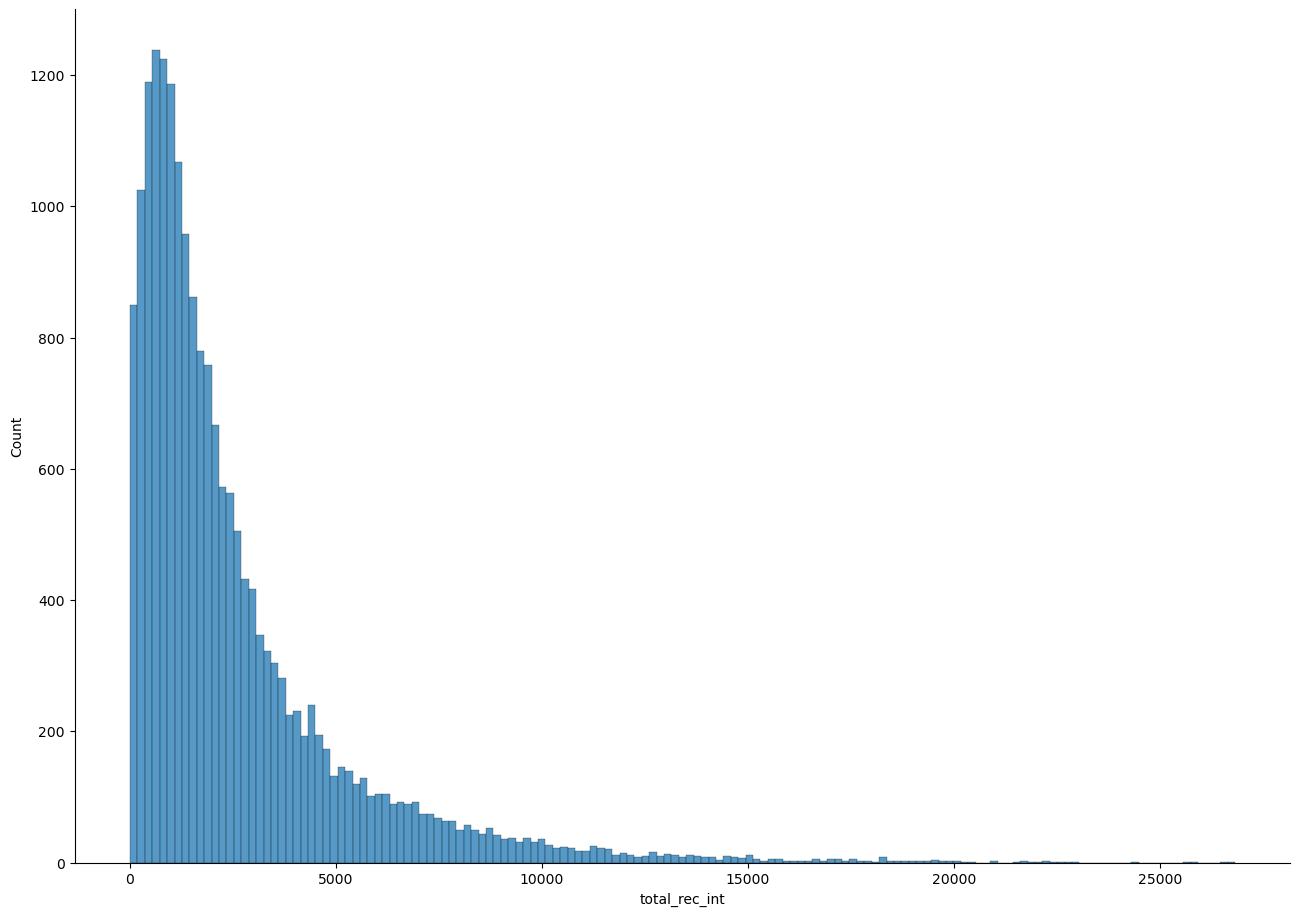

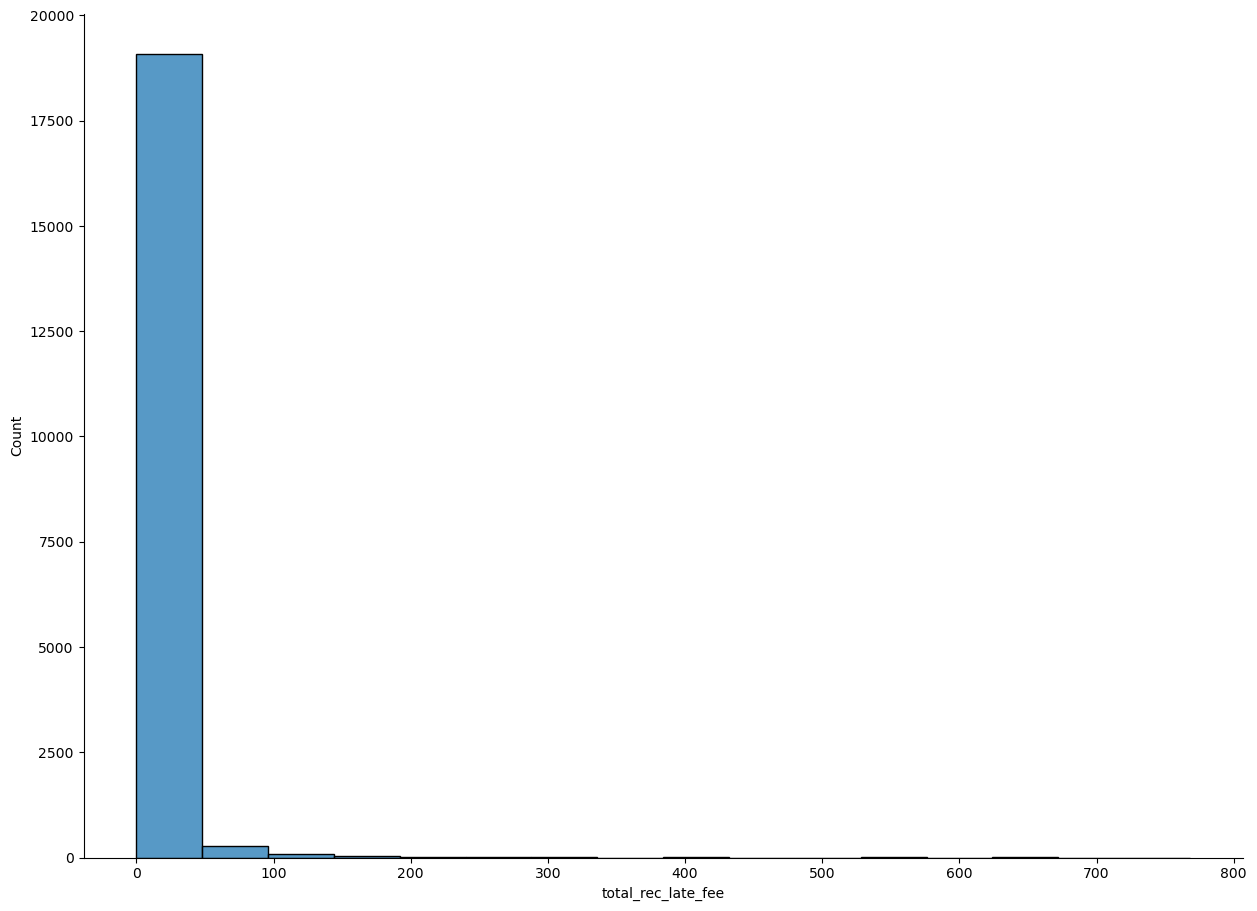

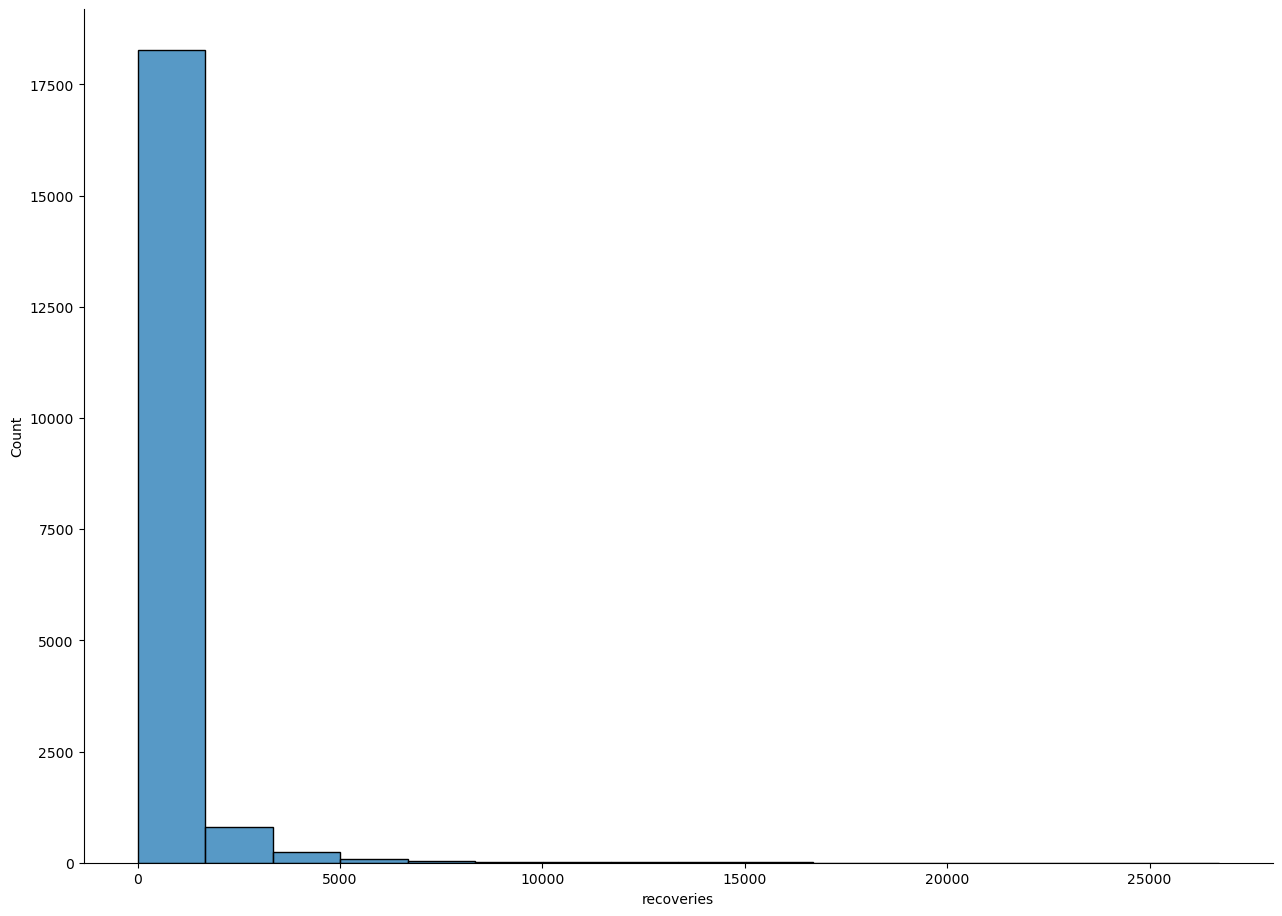

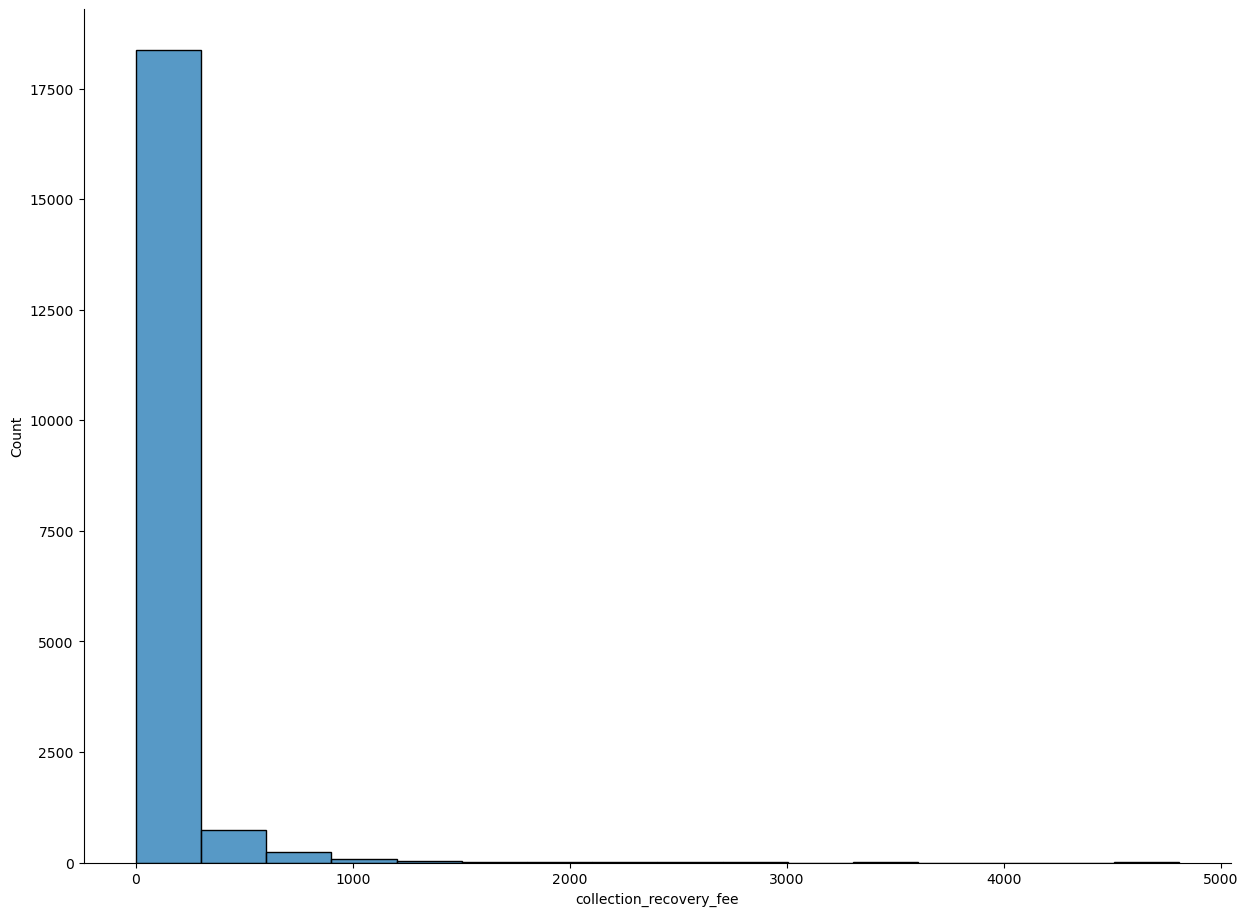

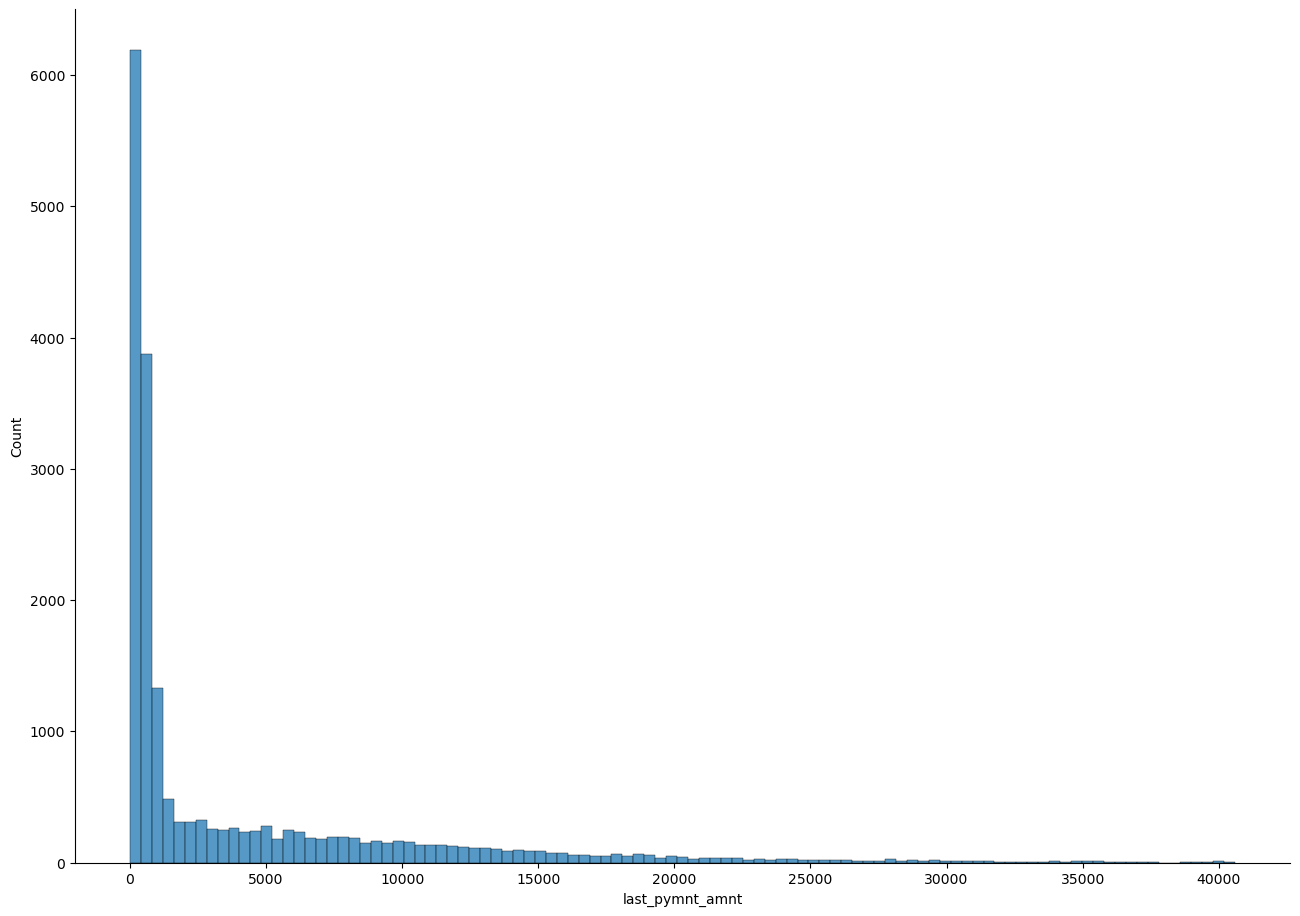

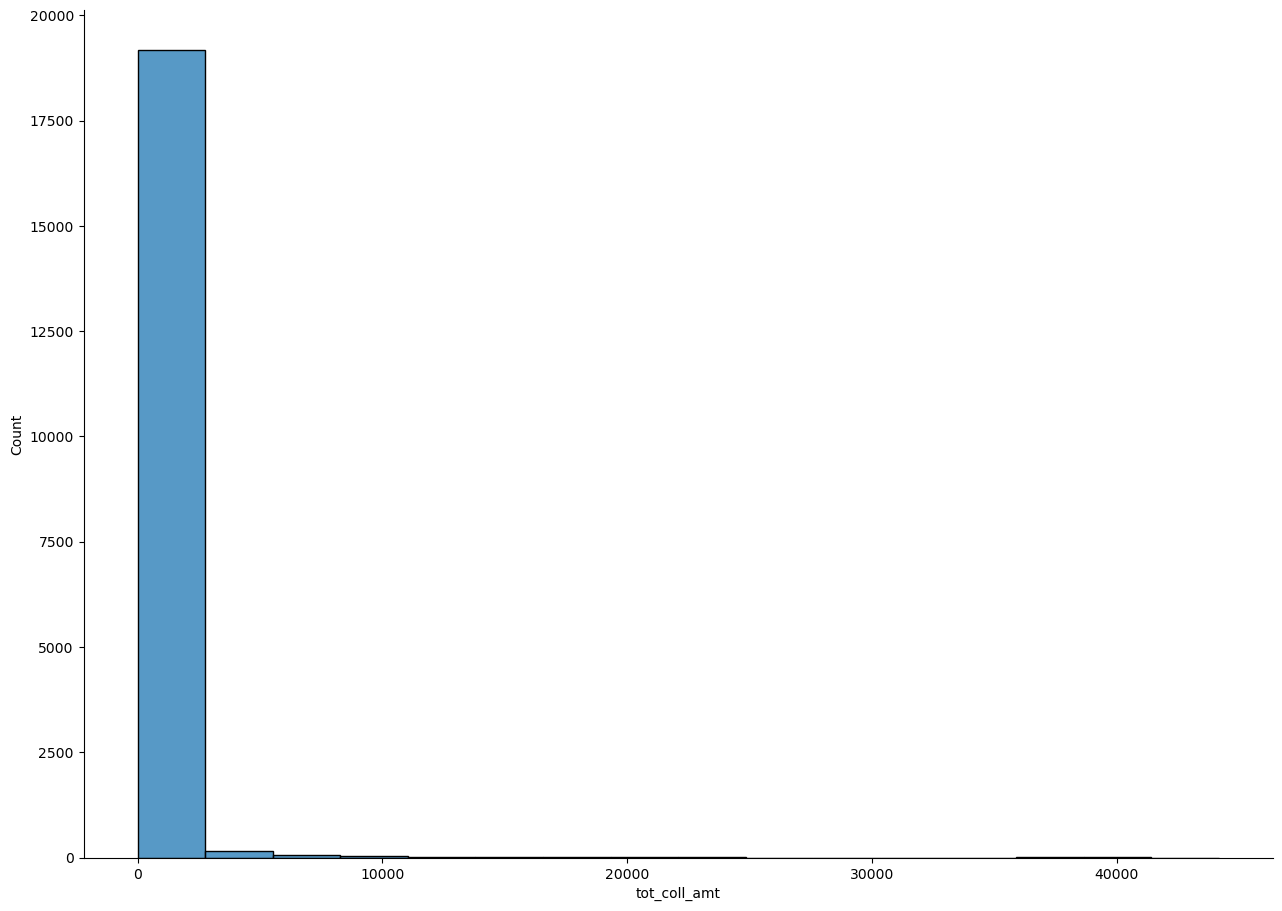

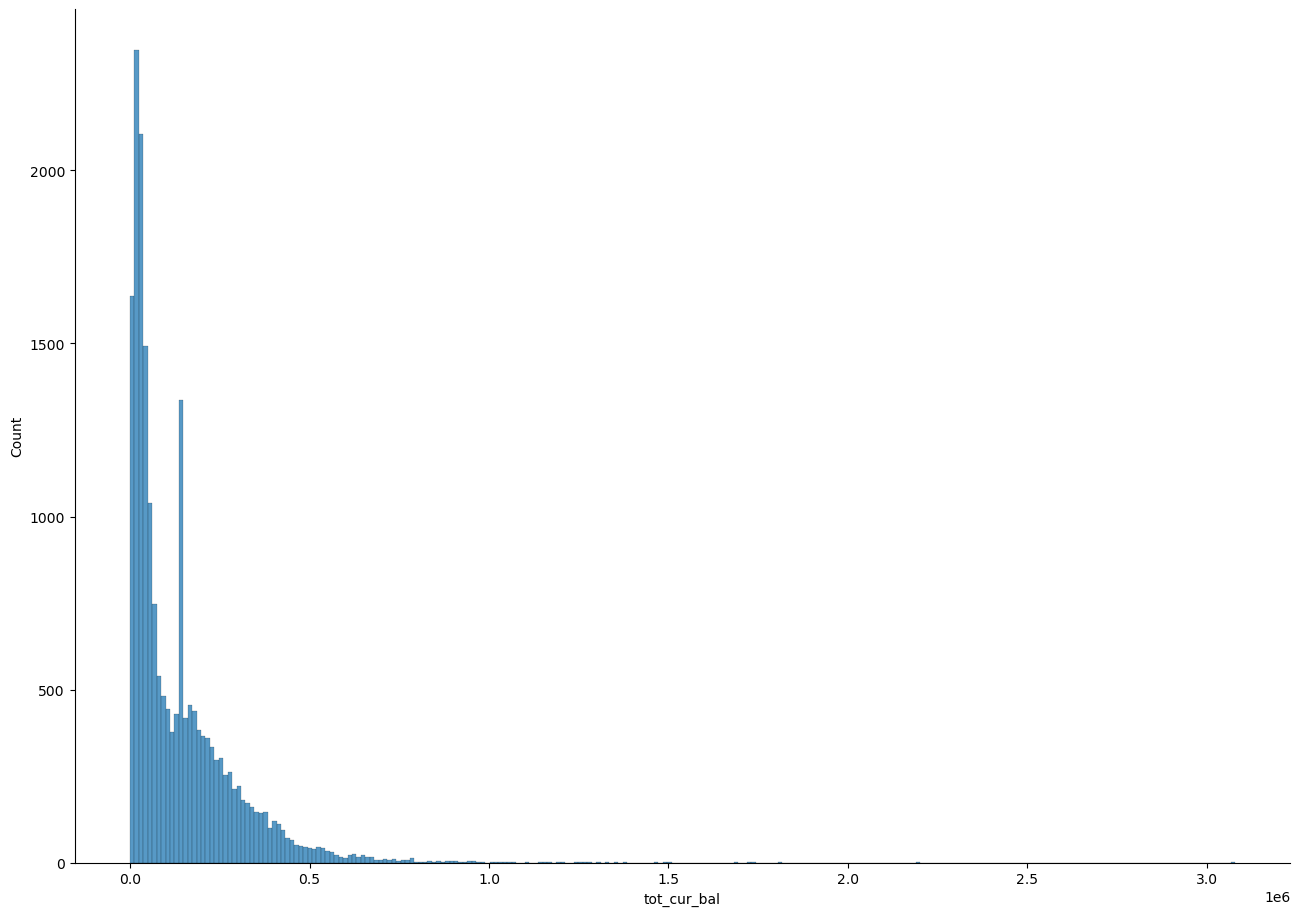

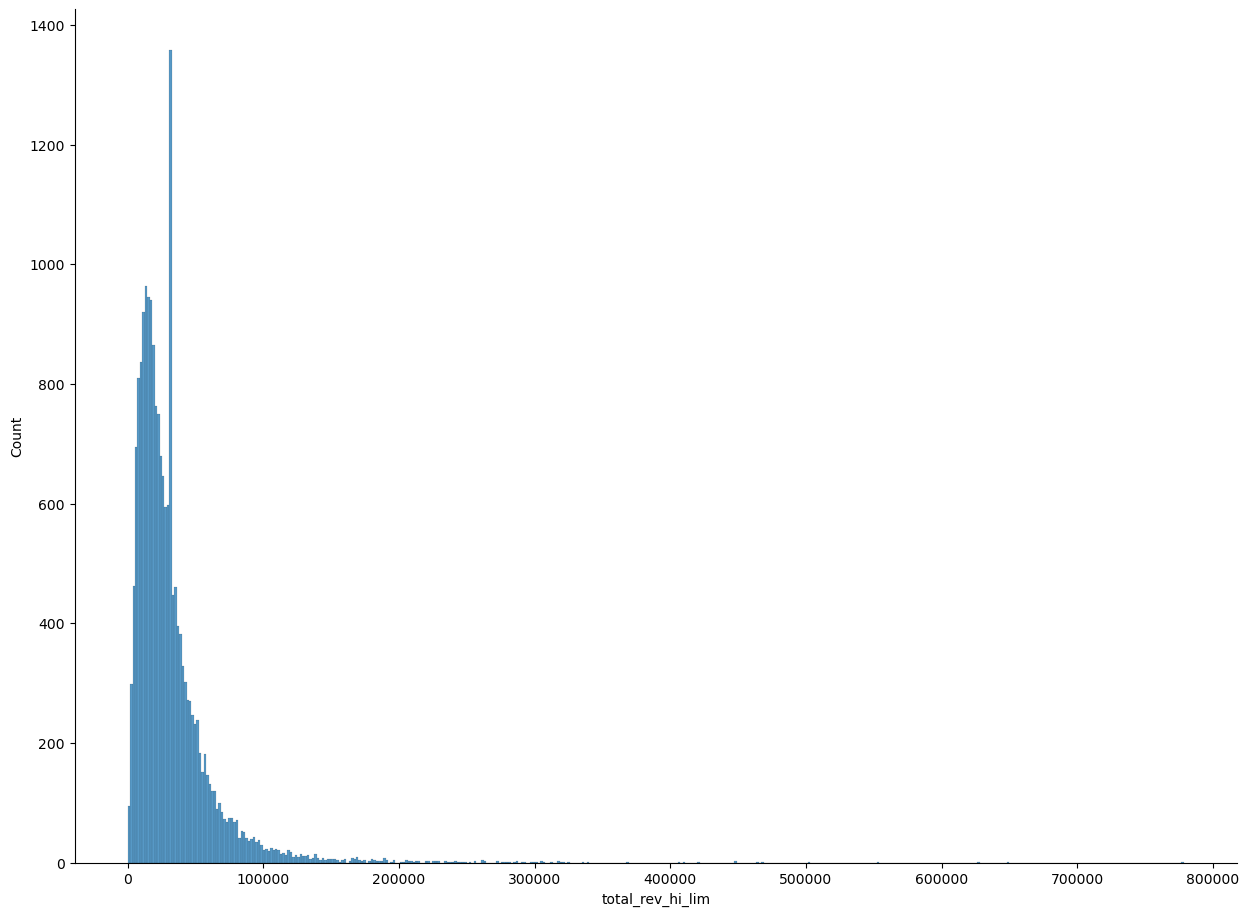

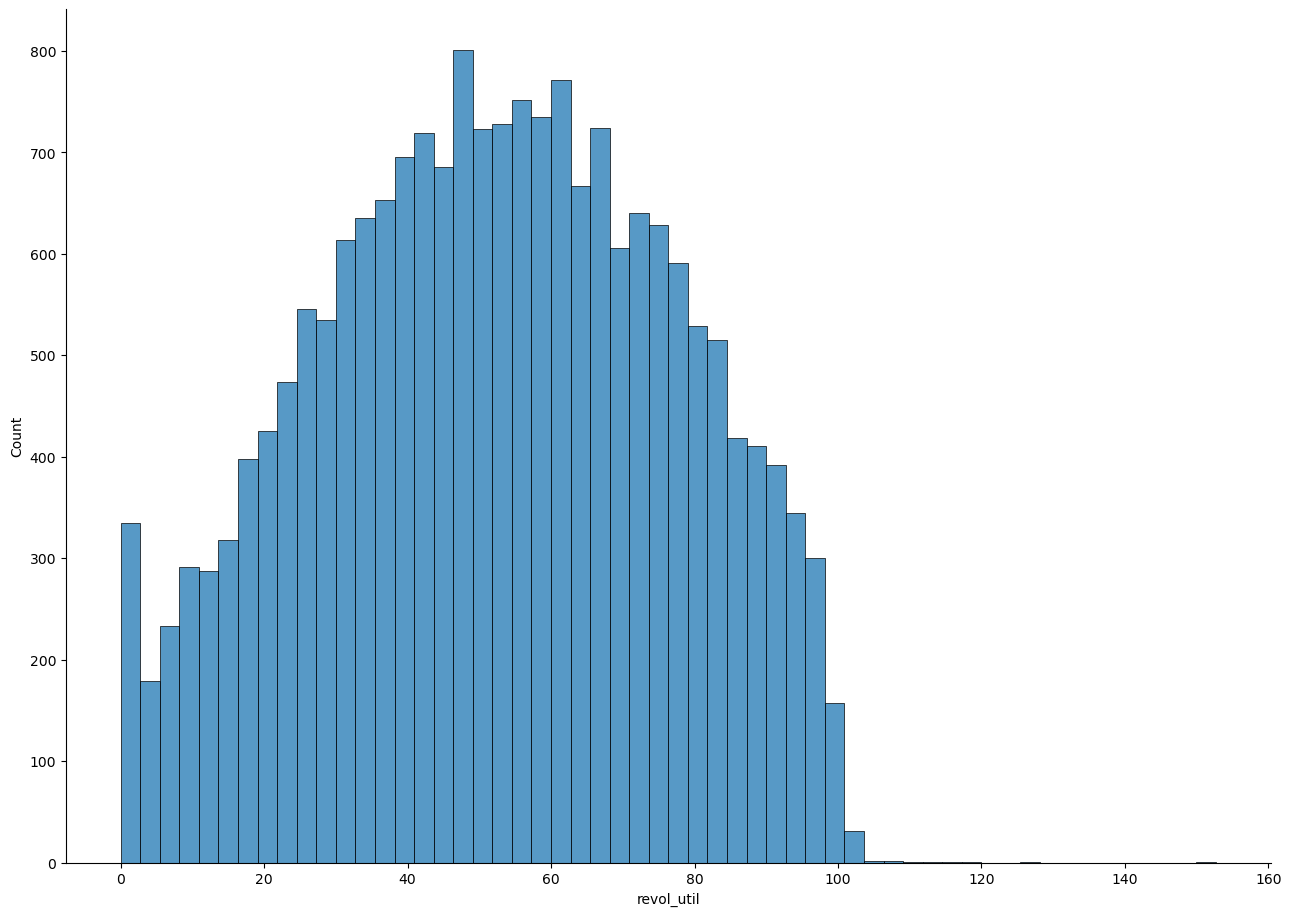

In [30]:
for col in num_features:
    plot = sns.displot(df[col])
    plot.figure.set_size_inches(15, 10)

In [31]:
for col in num_features:
    print(f"{col}: {(df[col] == 0).mean()}")

loan_amnt: 0.0
int_rate: 0.0
installment: 0.0
annual_inc: 0.0002564102564102564
dti: 0.00046153846153846153
delinq_2yrs: 0.7999487179487179
inq_last_6mths: 0.5681025641025641
open_acc: 5.128205128205128e-05
pub_rec: 0.8262564102564103
revol_bal: 0.005692307692307693
total_acc: 0.0
total_pymnt: 0.0017948717948717949
total_pymnt_inv: 0.0018461538461538461
total_rec_prncp: 0.002769230769230769
total_rec_int: 0.0029743589743589744
total_rec_late_fee: 0.9144615384615384
recoveries: 0.8249230769230769
collection_recovery_fee: 0.8343076923076923
last_pymnt_amnt: 0.002871794871794872
tot_coll_amt: 0.8038974358974359
tot_cur_bal: 0.000358974358974359
total_rev_hi_lim: 0.0005641025641025641
revol_util: 0.005897435897435898


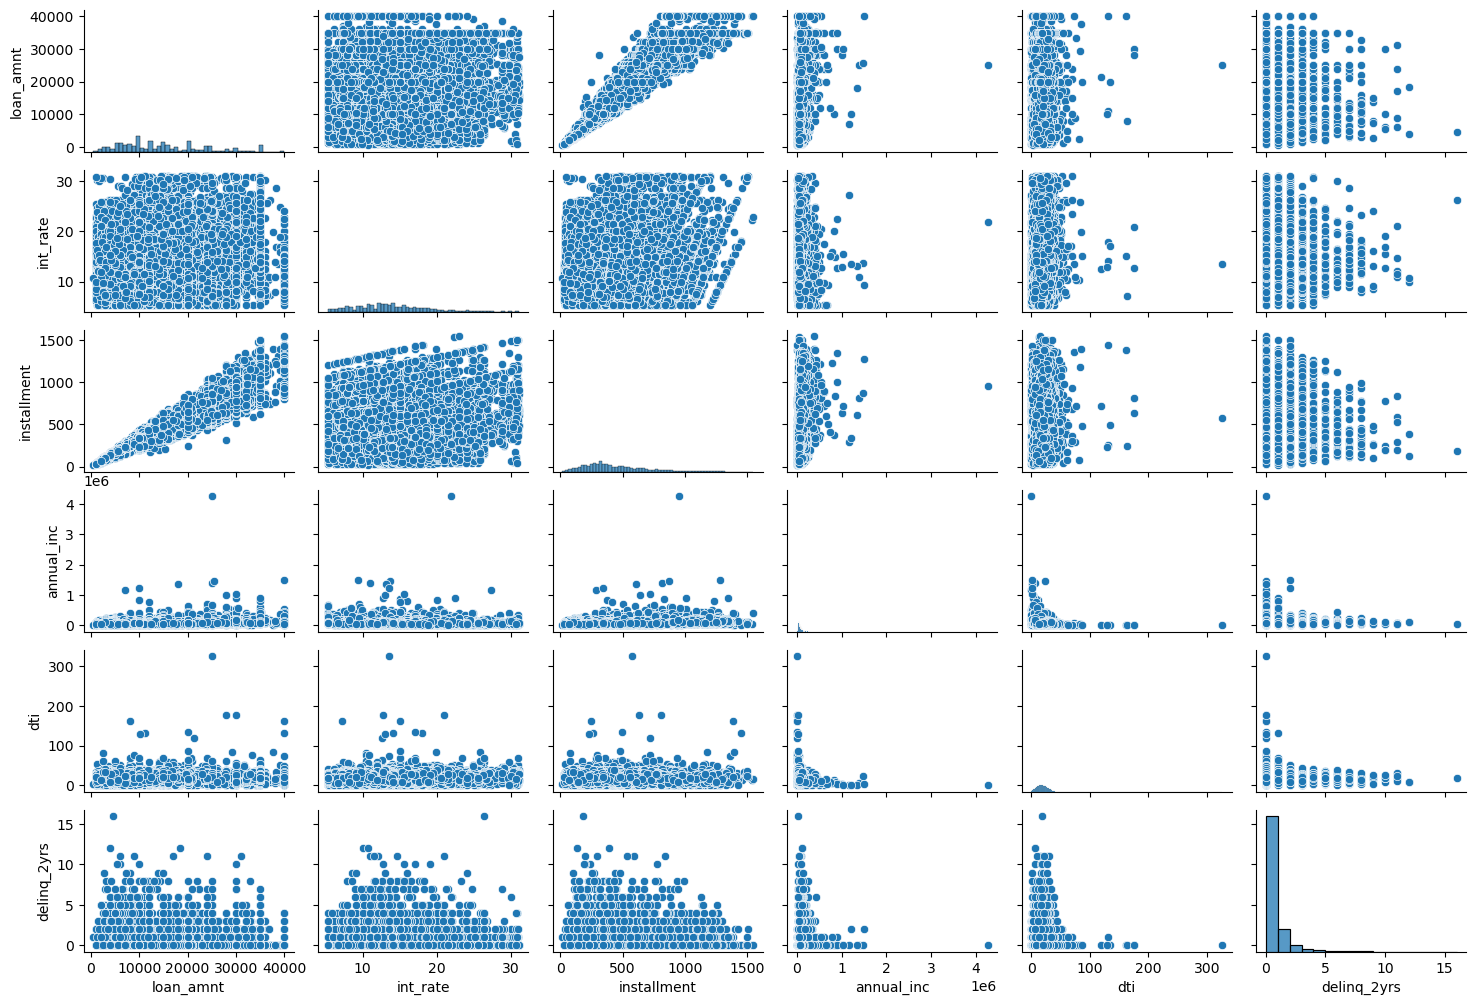

In [32]:
plot = sns.pairplot(df[num_features[:6]])
plot.figure.set_size_inches(15, 10)

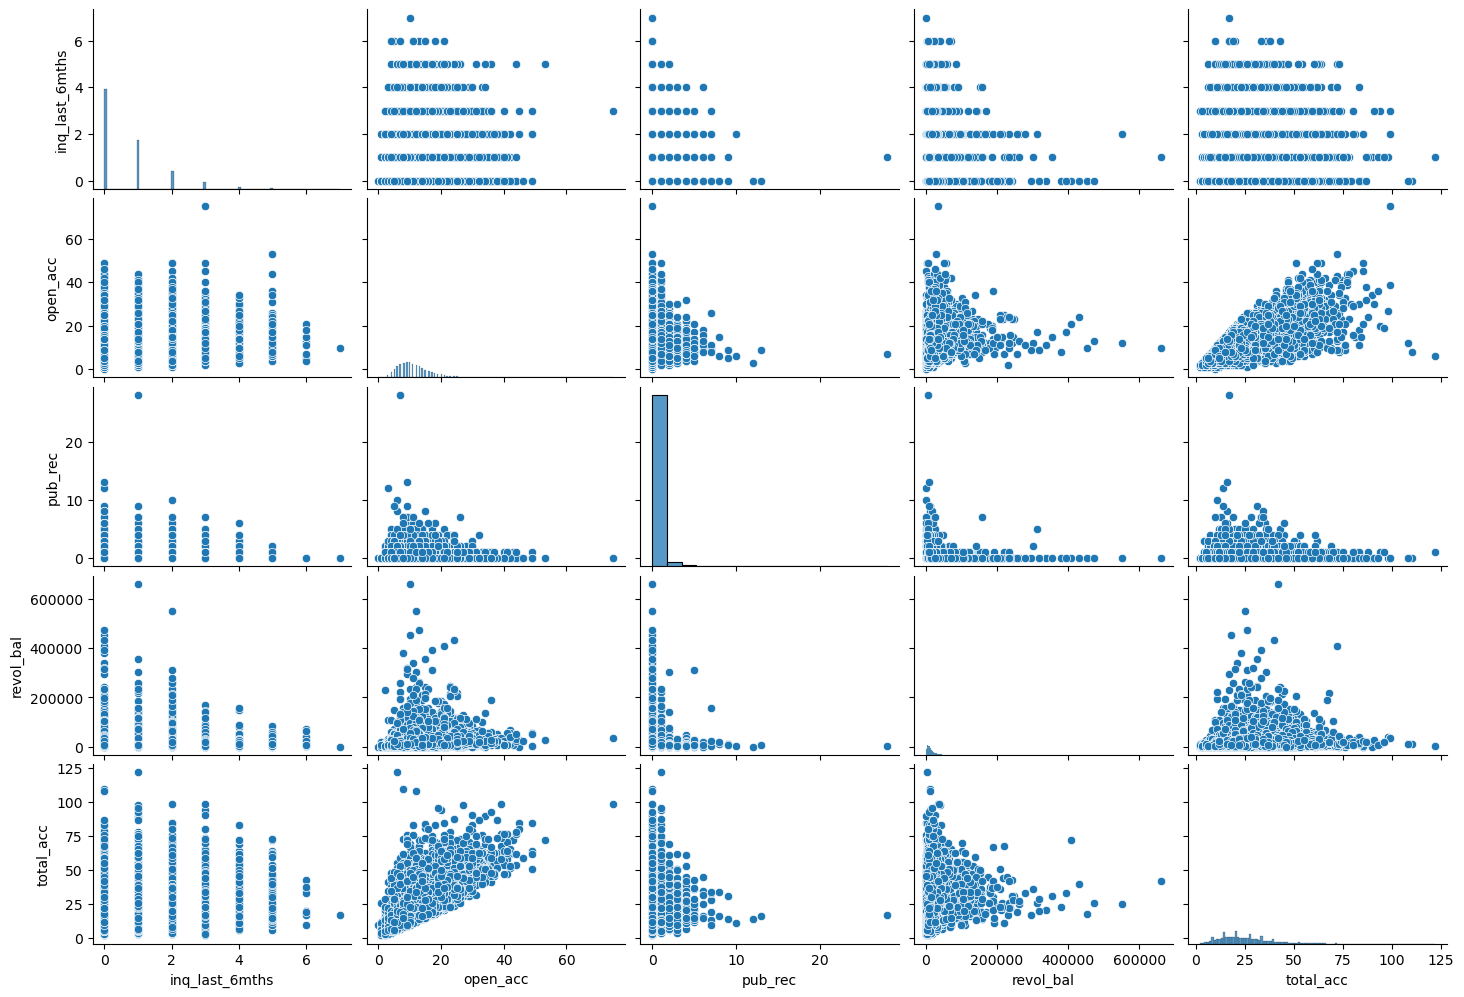

In [33]:
plot = sns.pairplot(df[num_features[6:11]])
plot.figure.set_size_inches(15, 10)

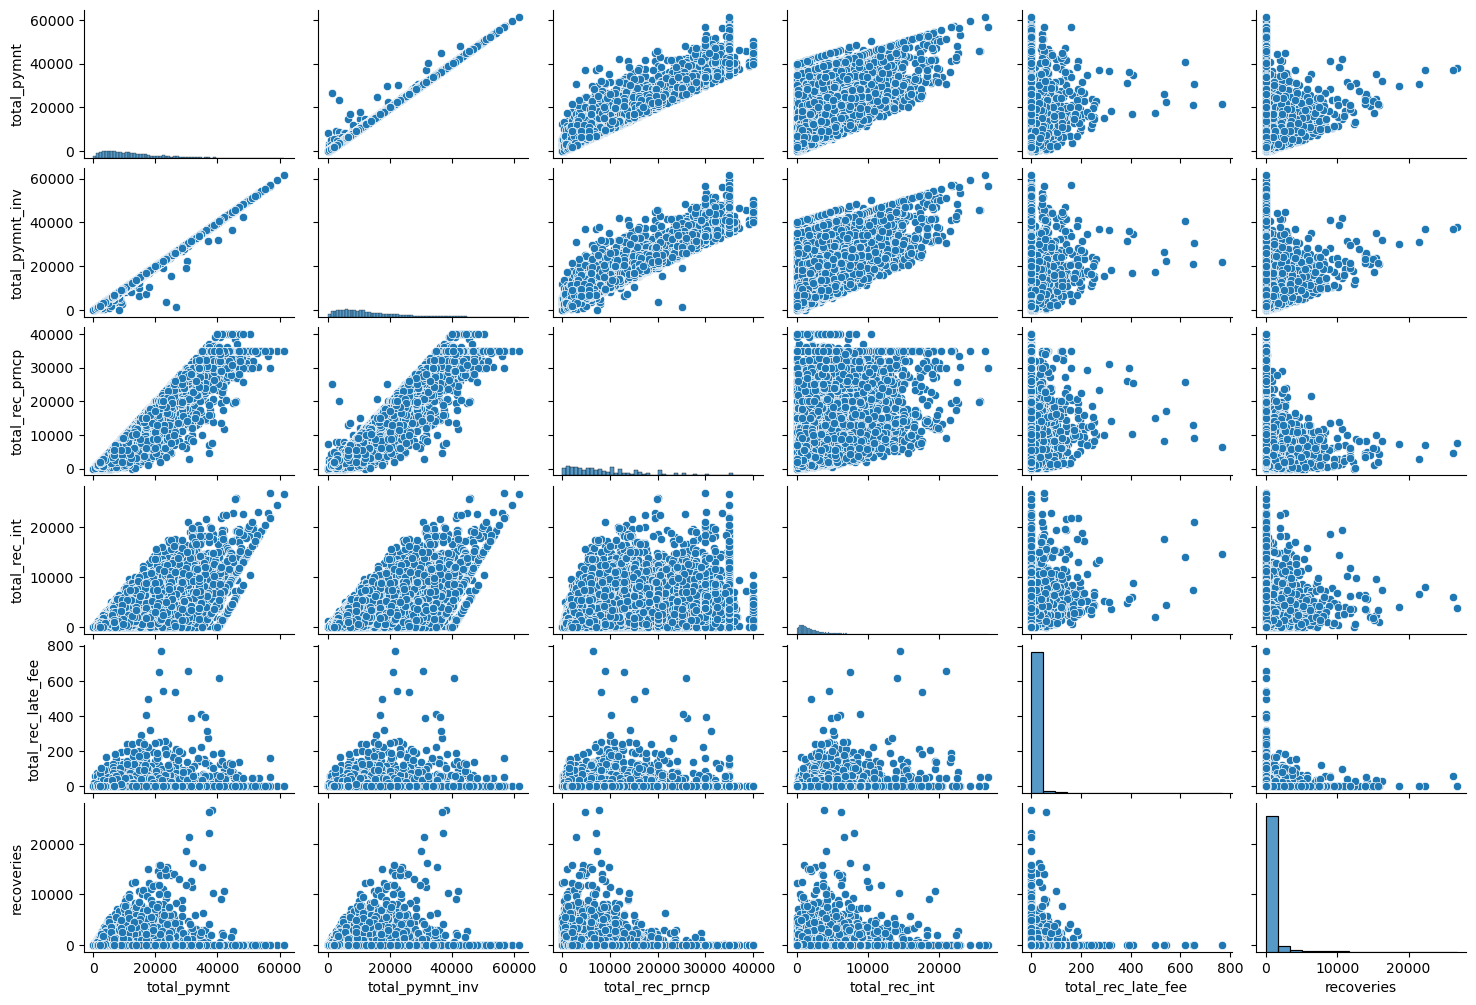

In [34]:
plot = sns.pairplot(df[num_features[11:17]])
plot.figure.set_size_inches(15, 10)

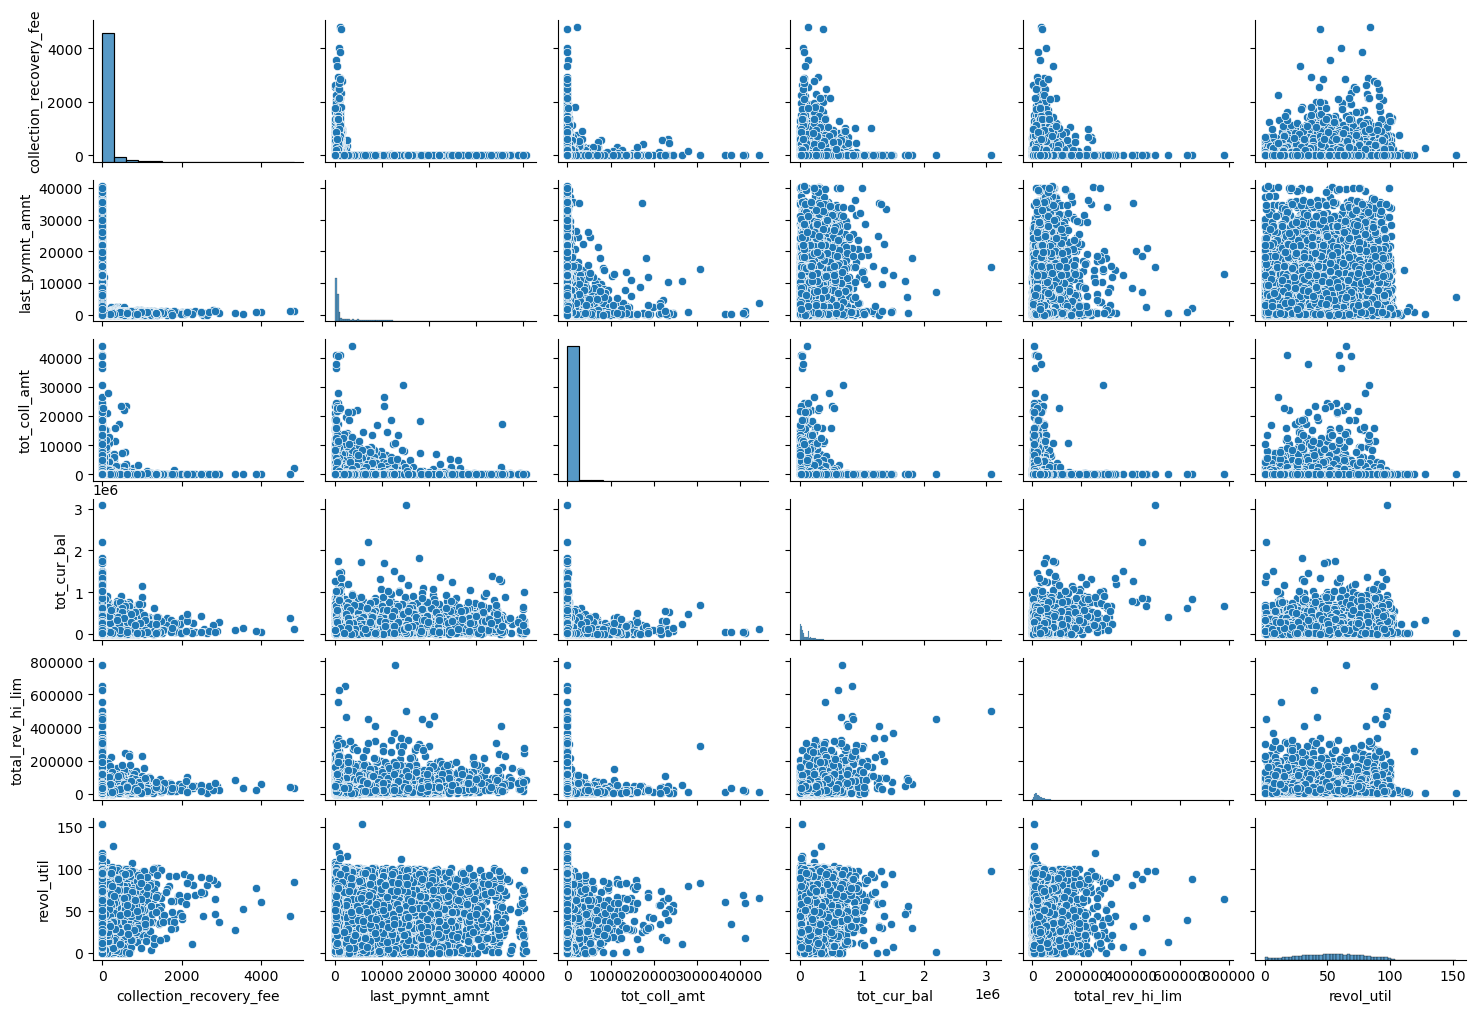

In [35]:
plot = sns.pairplot(df[num_features[17:]])
plot.figure.set_size_inches(15, 10)

# anomaly det

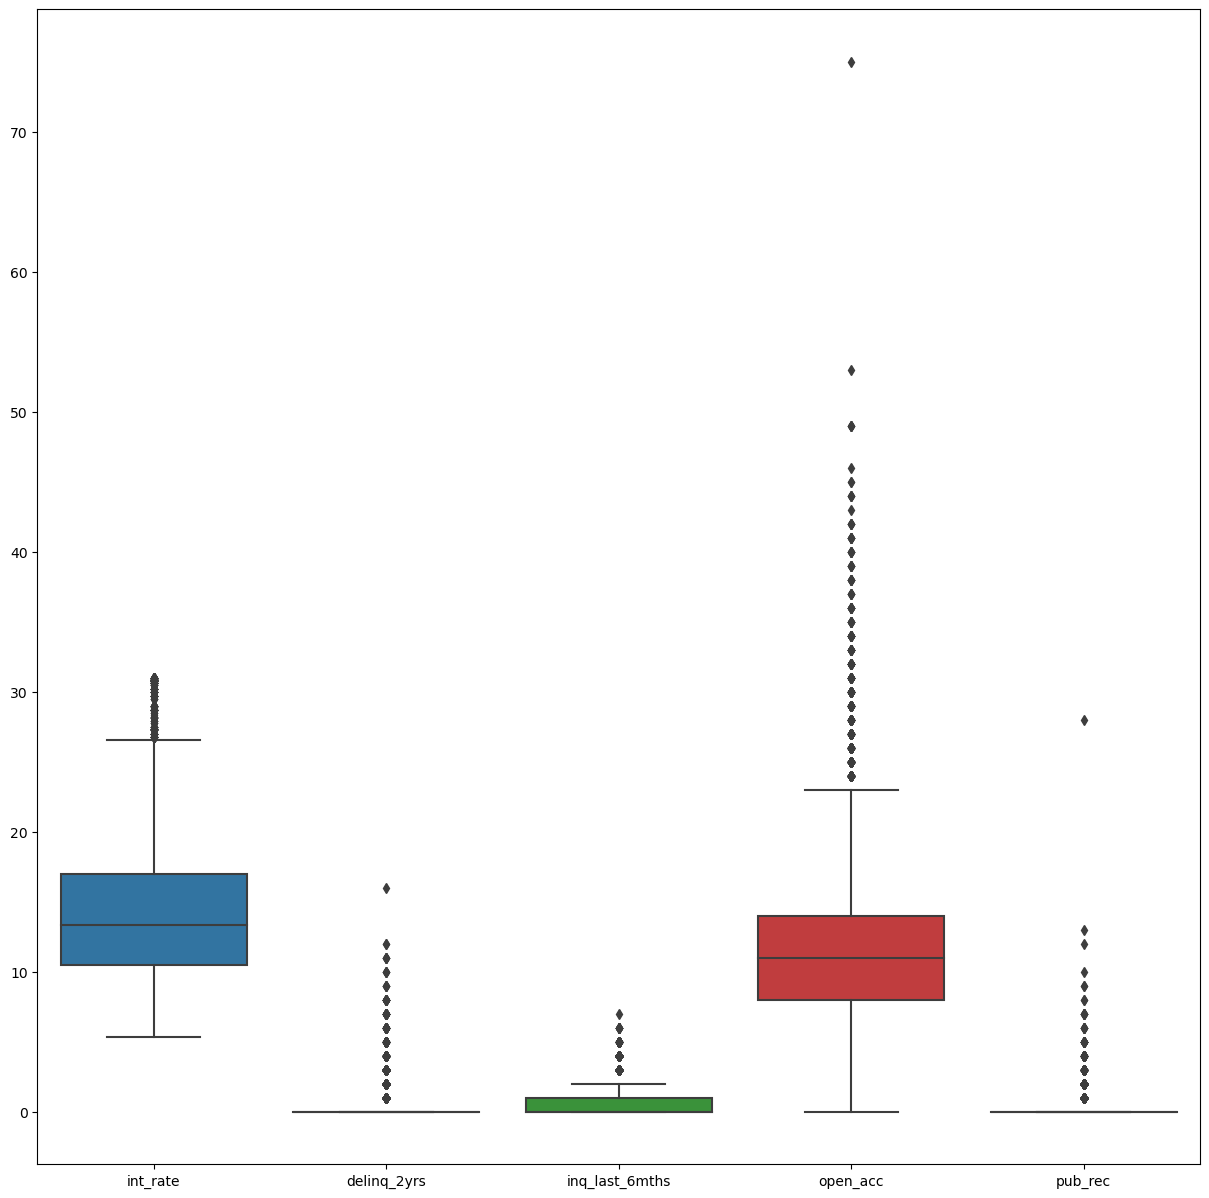

In [36]:
num_features_max_ = np.array(num_features)[(df[num_features].max() <= df[num_features].max().quantile(0.2))]
plot = sns.boxplot(data=df[num_features_max_])
plot.figure.set_size_inches(15, 15)

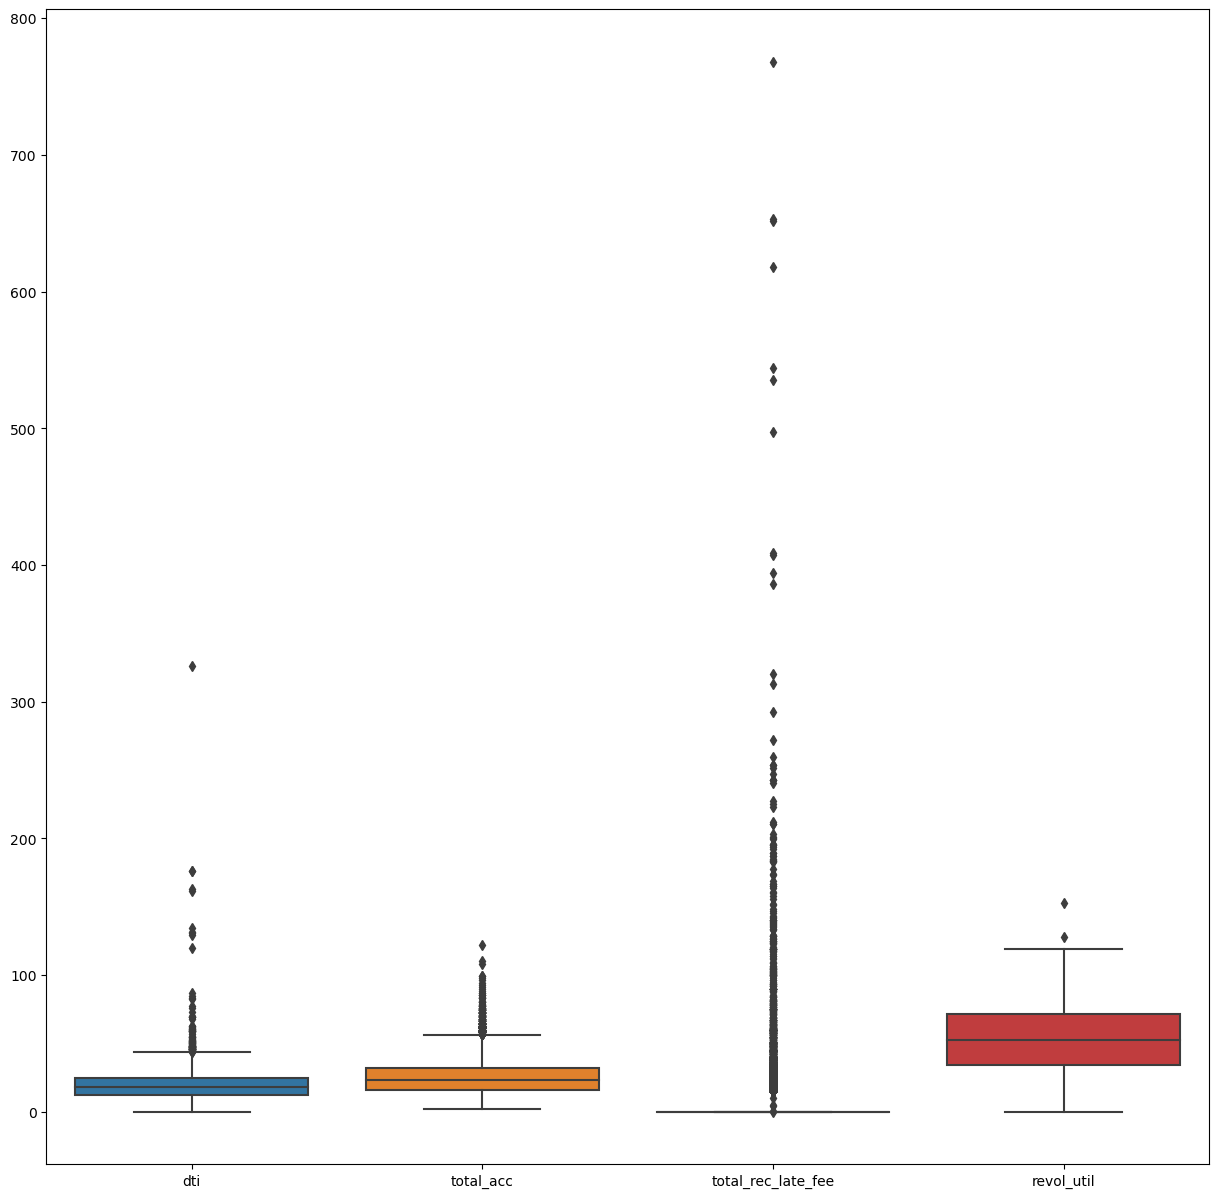

In [37]:
num_features_max_ = np.array(num_features)[(df[num_features].max() <= df[num_features].max().quantile(0.4)) & (df[num_features].max() > df[num_features].max().quantile(0.2))]
plot = sns.boxplot(data=df[num_features_max_])
plot.figure.set_size_inches(15, 15)

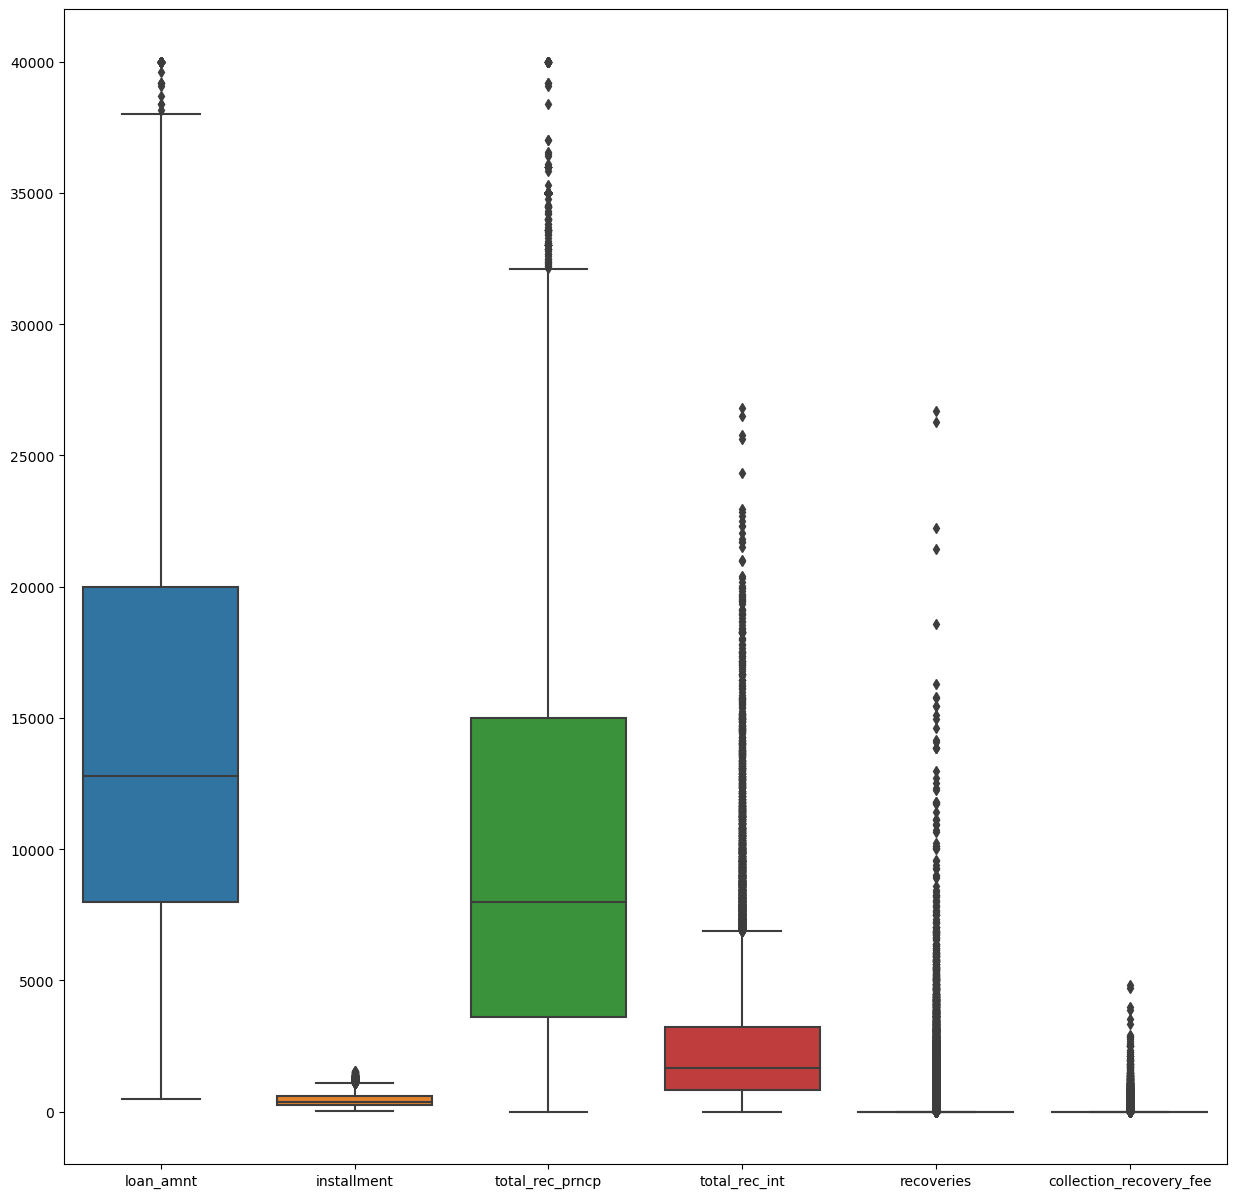

In [38]:
num_features_max_ = np.array(num_features)[(df[num_features].max() <= df[num_features].max().quantile(0.65)) & (df[num_features].max() > df[num_features].max().quantile(0.4))]
plot = sns.boxplot(data=df[num_features_max_])
plot.figure.set_size_inches(15, 15)

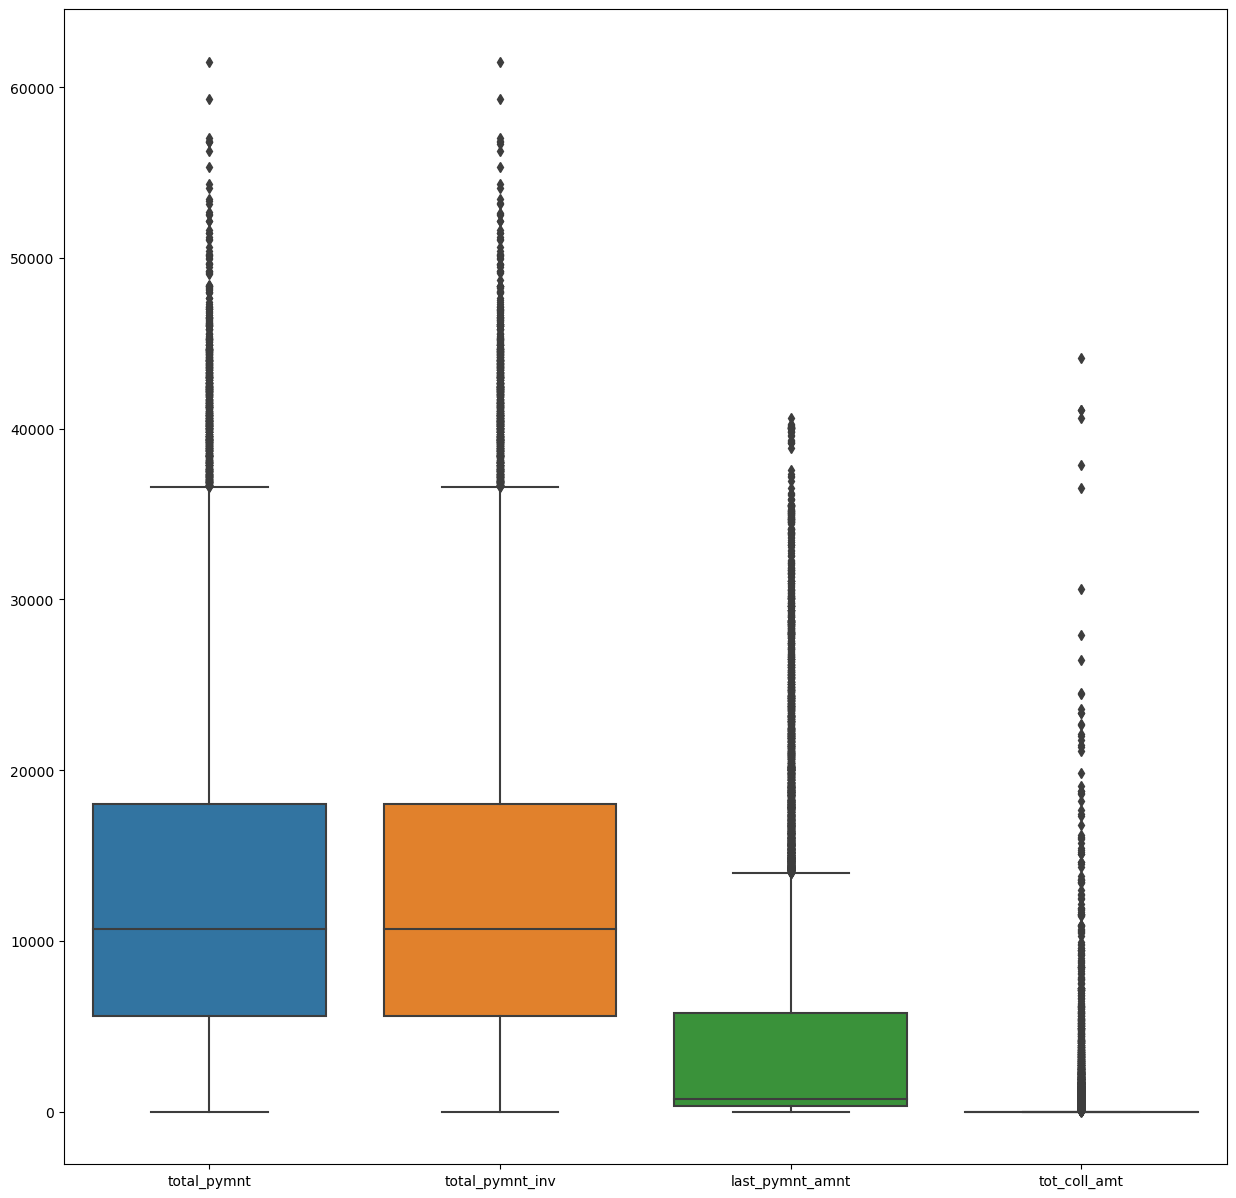

In [39]:
num_features_max_ = np.array(num_features)[(df[num_features].max() > df[num_features].max().quantile(0.65)) & (df[num_features].max() <= df[num_features].max().quantile(0.85))]
plot = sns.boxplot(data=df[num_features_max_])
plot.figure.set_size_inches(15, 15)

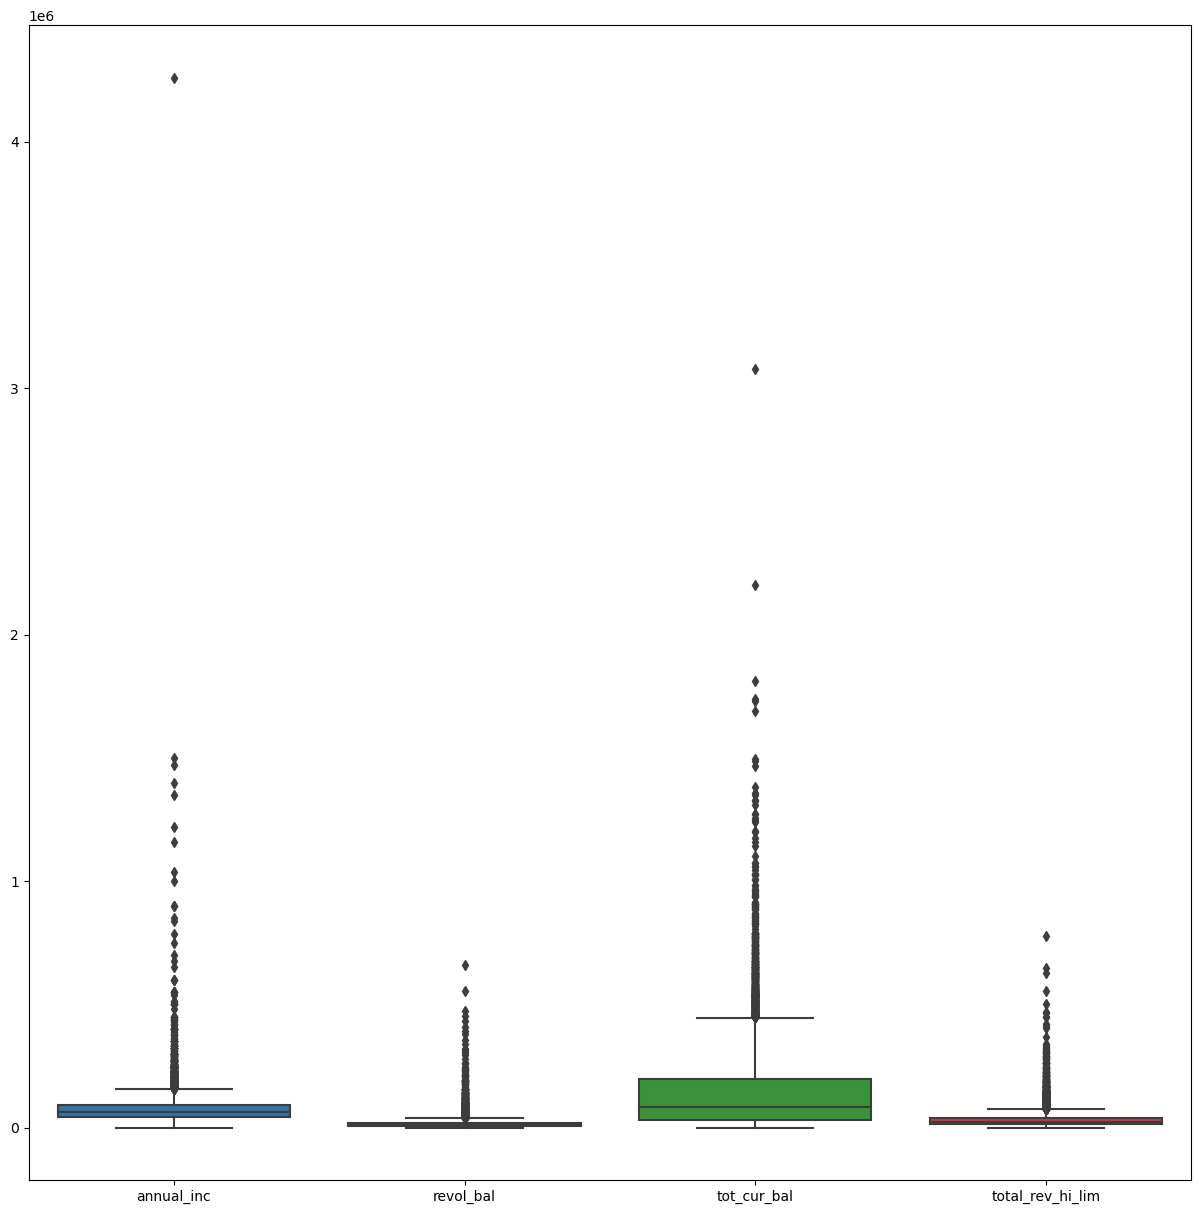

In [40]:
num_features_max_ = np.array(num_features)[(df[num_features].max() > df[num_features].max().quantile(0.85))]
plot = sns.boxplot(data=df[num_features_max_])
plot.figure.set_size_inches(15, 15)

In [41]:
df.shape, len(cat_features), len(num_features)

((19500, 31), 6, 23)

In [42]:
time_1 = time.time()

In [43]:
time_real_1 = time.strftime("%H:%M:%S", time.gmtime(time_1 - time_st))

send_message(f'Час виконання 1 завдання (аналіз завершено): {time_real_1}')

## 2. **Задача регресії**. 

Створити нову цільову змінну `y_reg` яка приймає значення `1` якщо `loan_status` `==` `Charged Off` і `0` в інших випадках. Після цього вилучити з датасету `loan_status`. (Зверніть увагу: датасет містить неповні дані, тому варто розглянути різні стратегії роботи з пропусками в даних)

   * Навчити модель лінійної регресії, експерементуючи з параметрами регуляризації, кількістю і складом ознак.     Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель SVM Regressor (`sklearn.svm.SVR`), експерементуючи з параметрами регуляризації та ядра. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

   * Навчити модель KNN Regressor (`sklearn.neighbors.KNeighborsRegressor`), експерементуючи з параметрами кількості сусідів та метрики. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.tree.DecisionTreeRegressor`, експерементуючи з параметрами `criterion`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.ensemble.RandomForestRegressor`, експерементуючи з параметрами `n_estimators`, `max_depth`, `max_features`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.



# train test split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(["loan_status", "y_reg"], axis=1), df.y_reg, test_size=0.3, random_state=88, shuffle=True)

In [45]:
def score_reg(y_train_pred, y_test_pred, y_train, y_test):
    print(f"Mean squared error:\n  test: {mean_squared_error(y_test, y_test_pred, squared=False)}\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nR2 score:\n  test: {r2_score(y_test, y_test_pred)}\n  train: {r2_score(y_train, y_train_pred)}\n\nAccuracy score:\n  test: {accuracy_score(y_test, y_test_pred.round())}\n  train: {accuracy_score(y_train, y_train_pred.round())}")

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, KBinsDiscretizer, MaxAbsScaler


column_trans_base = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", StandardScaler(), num_features)])

In [47]:
column_trans_minmax = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", MinMaxScaler(), num_features)])

In [48]:
column_trans_kbin = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", StandardScaler(), num_features), ("kbin", KBinsDiscretizer(n_bins=5), num_features)])

In [49]:
column_trans_poly_low = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", StandardScaler(), num_features), ("poly", PolynomialFeatures(degree=2), num_features)])

In [50]:
column_trans_poly_high = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", StandardScaler(), num_features), ("poly", PolynomialFeatures(degree=3), num_features)])

In [51]:
column_trans_kbin_poly = ColumnTransformer([("ohe", OneHotEncoder(), cat_features), ("scaling", StandardScaler(), num_features), ("poly", PolynomialFeatures(degree=2), num_features), ("kbin", KBinsDiscretizer(n_bins=5), num_features)])

# Linear reg

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


m_lin_reg_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", LinearRegression())])
m_lin_reg_base_2.fit(X_train, y_train)

y_test_pred = m_lin_reg_base_2.predict(X_test)
y_train_pred = m_lin_reg_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34502274012082823
  train: 0.33225573141159587

R2 score:
  test: 0.3761966481660479
  train: 0.42078626602895963

Accuracy score:
  test: 0.8304273504273504
  train: 0.8381684981684981


In [53]:
print(f"Mean squared error:\n{mean_squared_error(df.y_reg, df.y_reg.mean() * np.ones(df.shape[0]), squared=False)}\n\nR2 score:\n{r2_score(df.y_reg, df.y_reg.mean() * np.ones(df.shape[0]))}\n\nAccuracy score:\n{accuracy_score(df.y_reg, round(df.y_reg.mean()) * np.ones(df.shape[0]))}")

Mean squared error:
0.43665093245965136

R2 score:
0.0

Accuracy score:
0.7435897435897436


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [54]:
m_lin_reg_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", LinearRegression())])
m_lin_reg_minmax_2.fit(X_train, y_train)

y_test_pred = m_lin_reg_minmax_2.predict(X_test)
y_train_pred = m_lin_reg_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34509725309906963
  train: 0.3322488340675223

R2 score:
  test: 0.3759271791753481
  train: 0.4208103137402307

Accuracy score:
  test: 0.8307692307692308
  train: 0.8384615384615385


## lin reg + kbin

In [55]:
m_lin_reg_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", LinearRegression())])
m_lin_reg_kbin_2.fit(X_train, y_train)

y_test_pred = m_lin_reg_kbin_2.predict(X_test)
y_train_pred = m_lin_reg_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.319386241780135
  train: 0.3062274841600385

R2 score:
  test: 0.4654545069083028
  train: 0.5079806065172092

Accuracy score:
  test: 0.8564102564102564
  train: 0.8713553113553113


## lin reg + poly low

In [56]:
m_lin_reg_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", LinearRegression())])
m_lin_reg_poly_low_2.fit(X_train, y_train)

y_test_pred = m_lin_reg_poly_low_2.predict(X_test)
y_train_pred = m_lin_reg_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31234142482557664
  train: 0.2807119567850132

R2 score:
  test: 0.48877575960200303
  train: 0.5865569348833635

Accuracy score:
  test: 0.875042735042735
  train: 0.8878388278388278


## lin reg + poly high

In [57]:
m_lin_reg_poly_high_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", LinearRegression())])
m_lin_reg_poly_high_2.fit(X_train, y_train)

y_test_pred = m_lin_reg_poly_high_2.predict(X_test)
y_train_pred = m_lin_reg_poly_high_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 7.030222877017402
  train: 0.23872003515182197

R2 score:
  test: -257.9944461228467
  train: 0.7009996972880854

Accuracy score:
  test: 0.852991452991453
  train: 0.9227106227106228


# Ridge

In [58]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

X = column_trans_base.fit_transform(df.drop(["loan_status", "y_reg"], axis=1))


alpha_tmp = np.logspace(-10, 10, 500)

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
ridge_best_alpha = searcher.best_params_["alpha"]
ridge_best_alpha

CPU times: user 2min 19s, sys: 1.13 s, total: 2min 20s
Wall time: 35.2 s


1.739726432343799e-10

In [59]:
m_ridge_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_base_2.fit(X_train, y_train)

y_test_pred = m_ridge_base_2.predict(X_test)
y_train_pred = m_ridge_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34506302676893186
  train: 0.3322364552239837

R2 score:
  test: 0.376050962618931
  train: 0.4208534715437011

Accuracy score:
  test: 0.8297435897435897
  train: 0.8385347985347985


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [60]:
m_ridge_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_minmax_2.fit(X_train, y_train)

y_test_pred = m_ridge_minmax_2.predict(X_test)
y_train_pred = m_ridge_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.345049402418661
  train: 0.3322517271525093

R2 score:
  test: 0.3761002332260589
  train: 0.42080022700938624

Accuracy score:
  test: 0.8297435897435897
  train: 0.8385347985347985


## ridge + kbin

In [61]:
m_ridge_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_kbin_2.fit(X_train, y_train)

y_test_pred = m_ridge_kbin_2.predict(X_test)
y_train_pred = m_ridge_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3193089502250599
  train: 0.3061920272412962

R2 score:
  test: 0.4657131959048332
  train: 0.5080945380392512

Accuracy score:
  test: 0.8564102564102564
  train: 0.8716483516483516


## ridge + kbin + select k

In [62]:
m_ridge_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("select_k", SelectKBest(k=90)), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_ridge_kbin_selectk_2.predict(X_test)
y_train_pred = m_ridge_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3193858314903007
  train: 0.30703449261060006

R2 score:
  test: 0.46545588028268314
  train: 0.5053839290488795

Accuracy score:
  test: 0.8564102564102564
  train: 0.8691575091575091


## ridge + kbin + PCA

In [63]:
m_ridge_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=100)), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_ridge_kbin_pca_2.predict(X_test)
y_train_pred = m_ridge_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3206977510387155
  train: 0.3085735995743561

R2 score:
  test: 0.4610554397575165
  train: 0.5004126629352084

Accuracy score:
  test: 0.8538461538461538
  train: 0.8643956043956044


## ridge + poly low

In [64]:
m_ridge_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_poly_low_2.fit(X_train, y_train)

y_test_pred = m_ridge_poly_low_2.predict(X_test)
y_train_pred = m_ridge_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3117359319764834
  train: 0.280593800415199

R2 score:
  test: 0.49075591697893217
  train: 0.5869049118713783

Accuracy score:
  test: 0.875042735042735
  train: 0.8876190476190476


## ridge + poly low + select k

In [65]:
m_ridge_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("select_k", SelectKBest(k=240)), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_ridge_poly_low_selectk_2.predict(X_test)
y_train_pred = m_ridge_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3086637831044091
  train: 0.28219114133218215

R2 score:
  test: 0.5007436312823861
  train: 0.5821882583613485

Accuracy score:
  test: 0.8772649572649572
  train: 0.886007326007326


## ridge + poly low + pca

In [66]:
m_ridge_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=200)), ("estimator", Ridge(alpha=ridge_best_alpha))])
m_ridge_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_ridge_poly_low_pca_2.predict(X_test)
y_train_pred = m_ridge_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3144001140534353
  train: 0.29066915454257075

R2 score:
  test: 0.48201443890074847
  train: 0.5567060712440774

Accuracy score:
  test: 0.8642735042735042
  train: 0.8701831501831502


# Lasso

In [67]:
%%time


from sklearn.linear_model import Lasso


alpha_tmp = np.logspace(-7, 2, 100)

searcher = GridSearchCV(Lasso(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
lasso_best_alpha = searcher.best_params_["alpha"]
lasso_best_alpha

CPU times: user 12min 27s, sys: 587 ms, total: 12min 28s
Wall time: 3min 7s


0.0001

In [68]:
m_lasso_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_base_2.fit(X_train, y_train)

y_test_pred = m_lasso_base_2.predict(X_test)
y_train_pred = m_lasso_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3449927211542322
  train: 0.3323820404029375

R2 score:
  test: 0.3763051924164509
  train: 0.4203457992337949

Accuracy score:
  test: 0.82991452991453
  train: 0.8376556776556776


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [69]:
m_lasso_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_minmax_2.fit(X_train, y_train)

y_test_pred = m_lasso_minmax_2.predict(X_test)
y_train_pred = m_lasso_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34509126878569174
  train: 0.3329611542961403

R2 score:
  test: 0.3759488230158353
  train: 0.4183241603055873

Accuracy score:
  test: 0.82991452991453
  train: 0.8350915750915751


## lasso + kbin

In [70]:
m_lasso_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_kbin_2.fit(X_train, y_train)

y_test_pred = m_lasso_kbin_2.predict(X_test)
y_train_pred = m_lasso_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31920096261286013
  train: 0.30641821789545465

R2 score:
  test: 0.4660745174396742
  train: 0.5073675072544162

Accuracy score:
  test: 0.8564102564102564
  train: 0.8697435897435898


## lasso + kbin + selectk

In [71]:
m_lasso_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("select_k", SelectKBest(k=110)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_lasso_kbin_selectk_2.predict(X_test)
y_train_pred = m_lasso_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3190947430775667
  train: 0.3067491134792168

R2 score:
  test: 0.46642980383991317
  train: 0.5063029626386153

Accuracy score:
  test: 0.8558974358974359
  train: 0.8694505494505494


## lasso + kbin + pca

In [72]:
m_lasso_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=100)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_lasso_kbin_pca_2.predict(X_test)
y_train_pred = m_lasso_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3206903419876727
  train: 0.30859739278225357

R2 score:
  test: 0.46108034184440316
  train: 0.5003356165276884

Accuracy score:
  test: 0.8524786324786324
  train: 0.8634432234432234


## lasso + poly low

In [73]:
m_lasso_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_low_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_low_2.predict(X_test)
y_train_pred = m_lasso_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31051208591646234
  train: 0.28156806034700094

R2 score:
  test: 0.49474655724208594
  train: 0.5840312867717048

Accuracy score:
  test: 0.8733333333333333
  train: 0.8871794871794871


## lasso + poly low + selectk

In [74]:
m_lasso_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("select_k", SelectKBest(k=250)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_low_selectk_2.predict(X_test)
y_train_pred = m_lasso_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3042494753513247
  train: 0.2834431622601377

R2 score:
  test: 0.5149215958871172
  train: 0.5784725534478329

Accuracy score:
  test: 0.8733333333333333
  train: 0.8850549450549451


## lasso + poly low + pca

In [75]:
m_lasso_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=200)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_low_pca_2.predict(X_test)
y_train_pred = m_lasso_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3143967053472397
  train: 0.29066918206545955

R2 score:
  test: 0.4820256707733901
  train: 0.5567059872948183

Accuracy score:
  test: 0.8642735042735042
  train: 0.8701831501831502


## lasso + poly high

In [76]:
m_lasso_poly_high_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_high_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_high_2.predict(X_test)
y_train_pred = m_lasso_poly_high_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.6102082892647578
  train: 0.24772414765182055

R2 score:
  test: -0.9512300241117198
  train: 0.6780187558897337

Accuracy score:
  test: 0.8818803418803419
  train: 0.9183882783882784


## lasso + poly high + selectk

In [77]:
m_lasso_poly_high_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("select_k", SelectKBest(k=310)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_high_selectk_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_high_selectk_2.predict(X_test)
y_train_pred = m_lasso_poly_high_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.32612343976578806
  train: 0.289455519059634

R2 score:
  test: 0.4426650311703523
  train: 0.5604001273814809

Accuracy score:
  test: 0.8823931623931623
  train: 0.8857142857142857


## lasso + poly high + pca

In [78]:
m_lasso_poly_high_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=100)), ("estimator", Lasso(alpha=lasso_best_alpha))])
m_lasso_poly_high_pca_2.fit(X_train, y_train)

y_test_pred = m_lasso_poly_high_pca_2.predict(X_test)
y_train_pred = m_lasso_poly_high_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4189623312565255
  train: 0.3972409210505148

R2 score:
  test: 0.08018133293988317
  train: 0.17205431154059625

Accuracy score:
  test: 0.7622222222222222
  train: 0.7688644688644689


# SVM

In [79]:
from sklearn.svm import SVR


m_svm_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", SVR())])
m_svm_base_2.fit(X_train, y_train)

y_test_pred = m_svm_base_2.predict(X_test)
y_train_pred = m_svm_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.27058768060735944
  train: 0.23096349406893757

R2 score:
  test: 0.6163207573665261
  train: 0.7201143898072462

Accuracy score:
  test: 0.8994871794871795
  train: 0.9225641025641026


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [80]:
m_svm_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", SVR())])
m_svm_minmax_2.fit(X_train, y_train)

y_test_pred = m_svm_minmax_2.predict(X_test)
y_train_pred = m_svm_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31110980618821743
  train: 0.2904039104758218

R2 score:
  test: 0.4927995097260419
  train: 0.5575147393432555

Accuracy score:
  test: 0.8482051282051282
  train: 0.8682051282051282


## svm + kbin

In [81]:
m_svm_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", SVR())])
m_svm_kbin_2.fit(X_train, y_train)

y_test_pred = m_svm_kbin_2.predict(X_test)
y_train_pred = m_svm_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2692069643461325
  train: 0.19640179438262922

R2 score:
  test: 0.6202263350060534
  train: 0.7976119848925514

Accuracy score:
  test: 0.9022222222222223
  train: 0.9508424908424908


## svm + kbin + selectk

In [82]:
m_svm_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("select_k", SelectKBest(k=120)), ("estimator", SVR())])
m_svm_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_svm_kbin_selectk_2.predict(X_test)
y_train_pred = m_svm_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.26814450104072485
  train: 0.19582026551505693

R2 score:
  test: 0.6232180804702997
  train: 0.7988087176615652

Accuracy score:
  test: 0.9042735042735043
  train: 0.9492307692307692


## svm + kbin + pca

In [83]:
m_svm_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=140)), ("estimator", SVR())])
m_svm_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_svm_kbin_pca_2.predict(X_test)
y_train_pred = m_svm_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.27031005814364994
  train: 0.18143303939578434

R2 score:
  test: 0.6171076618756366
  train: 0.8272863586673692

Accuracy score:
  test: 0.9005128205128206
  train: 0.9608058608058608


## svm + poly low

In [84]:
m_svm_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", SVR(C=1e2))])
m_svm_poly_low_2.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_2.predict(X_test)
y_train_pred = m_svm_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3805346615455312
  train: 0.3616642329446952

R2 score:
  test: 0.24117661447580652
  train: 0.3137142038239161

Accuracy score:
  test: 0.7933333333333333
  train: 0.8006593406593406


## svm + poly low + selectk

In [85]:
m_svm_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("select_k", SelectKBest(k=2)), ("estimator", SVR(C=1e2))])
m_svm_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_selectk_2.predict(X_test)
y_train_pred = m_svm_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2927397750634074
  train: 0.28539644532035296

R2 score:
  test: 0.550928251922826
  train: 0.5726428172840374

Accuracy score:
  test: 0.9041025641025641
  train: 0.9082051282051282


## svm + poly low + pca

In [86]:
m_svm_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=140)), ("estimator", SVR(C=1e2))])
m_svm_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_pca_2.predict(X_test)
y_train_pred = m_svm_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3802107447074654
  train: 0.360420762180285

R2 score:
  test: 0.24246790845781474
  train: 0.31842525463022686

Accuracy score:
  test: 0.7947008547008547
  train: 0.8024175824175824


# KNN

In [87]:
%%time


from sklearn.neighbors import KNeighborsRegressor


param_grid_tmp = {"n_neighbors": np.arange(40, 42), "algorithm": ('auto', 'ball_tree', 'kd_tree', 'brute')}

searcher = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
knn_best_param = searcher.best_params_
knn_best_param

CPU times: user 2min 27s, sys: 5.93 s, total: 2min 33s
Wall time: 2min 3s


{'algorithm': 'auto', 'n_neighbors': 40}

In [88]:
m_knn_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_base_2.fit(X_train, y_train)

y_test_pred = m_knn_base_2.predict(X_test)
y_train_pred = m_knn_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3203462002805528
  train: 0.3066711707345621

R2 score:
  test: 0.4622363805098262
  train: 0.5065538205004345

Accuracy score:
  test: 0.8487179487179487
  train: 0.8578754578754578


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [89]:
m_knn_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_minmax_2.fit(X_train, y_train)

y_test_pred = m_knn_minmax_2.predict(X_test)
y_train_pred = m_knn_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.382252517558076
  train: 0.3668339195632331

R2 score:
  test: 0.23431000405622926
  train: 0.29395422109662117

Accuracy score:
  test: 0.7805128205128206
  train: 0.7963369963369963


## knn + kbin

In [90]:
m_knn_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_kbin_2.fit(X_train, y_train)

y_test_pred = m_knn_kbin_2.predict(X_test)
y_train_pred = m_knn_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31149556526455907
  train: 0.2971781202660034

R2 score:
  test: 0.49154092840946817
  train: 0.5366303858030324

Accuracy score:
  test: 0.8535042735042735
  train: 0.8682051282051282


## knn + kbin + selectk

In [91]:
m_knn_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=10)), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_knn_kbin_selectk_2.predict(X_test)
y_train_pred = m_knn_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2618762430360316
  train: 0.25028792943138034

R2 score:
  test: 0.6406278088506951
  train: 0.6713196811974287

Accuracy score:
  test: 0.8970940170940171
  train: 0.9050549450549451


## knn + kbin + pca

In [92]:
m_knn_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=30)), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_knn_kbin_pca_2.predict(X_test)
y_train_pred = m_knn_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31365862138514666
  train: 0.2994394182492766

R2 score:
  test: 0.4844548297379023
  train: 0.5295517804542481

Accuracy score:
  test: 0.8526495726495726
  train: 0.8644688644688645


## knn + poly low

In [93]:
m_knn_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_poly_low_2.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_2.predict(X_test)
y_train_pred = m_knn_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3880782148674425
  train: 0.3789765352706079

R2 score:
  test: 0.21079324852971248
  train: 0.24643879741057706

Accuracy score:
  test: 0.7637606837606837
  train: 0.7733333333333333


## knn + poly low + selectk

In [94]:
m_knn_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=20)), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_selectk_2.predict(X_test)
y_train_pred = m_knn_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.25313103427438627
  train: 0.24111026006613137

R2 score:
  test: 0.6642291026484772
  train: 0.6949821387719697

Accuracy score:
  test: 0.9143589743589744
  train: 0.9194139194139194


## knn + poly low + pca

In [95]:
m_knn_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=130)), ("estimator", KNeighborsRegressor(**knn_best_param))])
m_knn_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_pca_2.predict(X_test)
y_train_pred = m_knn_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3880782148674425
  train: 0.3789765352706079

R2 score:
  test: 0.21079324852971248
  train: 0.24643879741057706

Accuracy score:
  test: 0.7637606837606837
  train: 0.7733333333333333


# Tree

In [96]:
%%time


from sklearn.tree import DecisionTreeRegressor


param_grid_tmp = {"max_depth": np.arange(1, 10), "max_features": np.linspace(0.001, 0.5, 5), "min_samples_split": np.linspace(0.001, 0.5, 5), "min_samples_leaf": np.linspace(0.05644444444444444, 0.5, 5)}

searcher = GridSearchCV(DecisionTreeRegressor(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
tree_best_param = searcher.best_params_
tree_best_param

CPU times: user 2min 17s, sys: 44.2 ms, total: 2min 17s
Wall time: 2min 17s


{'max_depth': 4,
 'max_features': 0.5,
 'min_samples_leaf': 0.05644444444444444,
 'min_samples_split': 0.12575}

In [97]:
m_tree_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_base_2.fit(X_train, y_train)

y_test_pred = m_tree_base_2.predict(X_test)
y_train_pred = m_tree_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3117013911179978
  train: 0.296554436560295

R2 score:
  test: 0.4908687609055804
  train: 0.5385732799956091

Accuracy score:
  test: 0.8553846153846154
  train: 0.8655677655677656


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [98]:
m_tree_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_minmax_2.fit(X_train, y_train)

y_test_pred = m_tree_minmax_2.predict(X_test)
y_train_pred = m_tree_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3117013911179978
  train: 0.296554436560295

R2 score:
  test: 0.4908687609055804
  train: 0.5385732799956091

Accuracy score:
  test: 0.8553846153846154
  train: 0.8655677655677656


## tree + kbin

In [99]:
m_tree_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_kbin_2.fit(X_train, y_train)

y_test_pred = m_tree_kbin_2.predict(X_test)
y_train_pred = m_tree_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2541769561816837
  train: 0.24972818774825079

R2 score:
  test: 0.6614486005544927
  train: 0.6727881527617809

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + kbin + selectk

In [100]:
m_tree_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=40)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_tree_kbin_selectk_2.predict(X_test)
y_train_pred = m_tree_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.25003326839404594
  train: 0.24589337711828427

R2 score:
  test: 0.6723970076566719
  train: 0.6827602844653844

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + kbin + pca

In [101]:
m_tree_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=110)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_tree_kbin_pca_2.predict(X_test)
y_train_pred = m_tree_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34194748463586244
  train: 0.33440988480437867

R2 score:
  test: 0.38726725378744753
  train: 0.413251347334341

Accuracy score:
  test: 0.8297435897435897
  train: 0.8378754578754579


## tree + poly low

In [102]:
m_tree_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_low_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_2.predict(X_test)
y_train_pred = m_tree_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.25076817497714715
  train: 0.24286115541143027

R2 score:
  test: 0.6704683729684549
  train: 0.6905360944417682

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly low + selectk

In [103]:
m_tree_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=65)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_selectk_2.predict(X_test)
y_train_pred = m_tree_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24894636091759506
  train: 0.24297434785556943

R2 score:
  test: 0.6752390311015091
  train: 0.690247558064547

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly low + pca

In [104]:
m_tree_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_pca_2.predict(X_test)
y_train_pred = m_tree_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3359722213483015
  train: 0.3298975494755551

R2 score:
  test: 0.40849420240815026
  train: 0.42897901658410054

Accuracy score:
  test: 0.836068376068376
  train: 0.8433699633699634


## tree + poly high

In [105]:
m_tree_poly_high_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_high_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_2.predict(X_test)
y_train_pred = m_tree_poly_high_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2476331602085196
  train: 0.2398866254164431

R2 score:
  test: 0.6786562451095657
  train: 0.6980702143387929

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly high + selectk

In [106]:
m_tree_poly_high_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=150)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_high_selectk_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_selectk_2.predict(X_test)
y_train_pred = m_tree_poly_high_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.25025246389360156
  train: 0.24453792582166106

R2 score:
  test: 0.6718223595044547
  train: 0.6862481199206717

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly high + pca

In [107]:
m_tree_poly_high_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeRegressor(**tree_best_param, random_state=88))])
m_tree_poly_high_pca_2.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_pca_2.predict(X_test)
y_train_pred = m_tree_poly_high_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3616416379000541
  train: 0.35400155681363943

R2 score:
  test: 0.31465520444273076
  train: 0.34248716874594254

Accuracy score:
  test: 0.7864957264957265
  train: 0.7951648351648352


# Random forest

In [108]:
%%time


from sklearn.ensemble import RandomForestRegressor


param_grid_tmp = {"n_estimators": np.arange(5, 10), "max_depth": np.arange(5, 10), "max_features": np.linspace(0.001, 0.5, 4)}

searcher = GridSearchCV(RandomForestRegressor(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_best_param = searcher.best_params_
forest_best_param

CPU times: user 2min 11s, sys: 36.3 ms, total: 2min 11s
Wall time: 2min 10s


{'max_depth': 8, 'max_features': 0.5, 'n_estimators': 7}

In [109]:
m_forest_base_2 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_base_2.fit(X_train, y_train)

y_test_pred = m_forest_base_2.predict(X_test)
y_train_pred = m_forest_base_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23857228478604567
  train: 0.21036029199748774

R2 score:
  test: 0.7017419022619034
  train: 0.7678218114680078

Accuracy score:
  test: 0.917094017094017
  train: 0.9331868131868132


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [110]:
m_forest_minmax_2 = Pipeline(steps=[("preprocessing", column_trans_minmax), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_minmax_2.fit(X_train, y_train)

y_test_pred = m_forest_minmax_2.predict(X_test)
y_train_pred = m_forest_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23867766474649516
  train: 0.21034972963453982

R2 score:
  test: 0.7014783564091118
  train: 0.767845126597544

Accuracy score:
  test: 0.916923076923077
  train: 0.9331868131868132


## forest + kbin

In [111]:
m_forest_kbin_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_kbin_2.fit(X_train, y_train)

y_test_pred = m_forest_kbin_2.predict(X_test)
y_train_pred = m_forest_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2373472641532446
  train: 0.21162285680583737

R2 score:
  test: 0.7047970288648022
  train: 0.7650264197315004

Accuracy score:
  test: 0.914017094017094
  train: 0.9326007326007326


## forest + kbin + selectk

In [112]:
m_forest_kbin_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=78)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_2.predict(X_test)
y_train_pred = m_forest_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23378931595815214
  train: 0.20764586323505743

R2 score:
  test: 0.7135811579566491
  train: 0.7737750737130988

Accuracy score:
  test: 0.9165811965811966
  train: 0.9361172161172161


## forest + kbin + pca

In [113]:
m_forest_kbin_pca_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=40)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_kbin_pca_2.fit(X_train, y_train)

y_test_pred = m_forest_kbin_pca_2.predict(X_test)
y_train_pred = m_forest_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3066957302781082
  train: 0.2564843696394592

R2 score:
  test: 0.5070898923638523
  train: 0.6548437860451075

Accuracy score:
  test: 0.8630769230769231
  train: 0.9147985347985348


## forest + poly low

In [114]:
m_forest_poly_low_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_low_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_2.predict(X_test)
y_train_pred = m_forest_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23885848668757667
  train: 0.20020894990146137

R2 score:
  test: 0.7010258657211206
  train: 0.7896895444797176

Accuracy score:
  test: 0.9165811965811966
  train: 0.9408791208791208


## forest + poly low + selectk

In [115]:
m_forest_poly_low_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=210)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_selectk_2.predict(X_test)
y_train_pred = m_forest_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2366351925057909
  train: 0.19972079132128442

R2 score:
  test: 0.7065656639069529
  train: 0.7907138712378665

Accuracy score:
  test: 0.9162393162393162
  train: 0.9424908424908425


## forest + poly low + pca

In [116]:
m_forest_poly_low_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=100)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_pca_2.predict(X_test)
y_train_pred = m_forest_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2699556273854716
  train: 0.23132984503797044

R2 score:
  test: 0.6181111010512061
  train: 0.7192257845687542

Accuracy score:
  test: 0.8883760683760684
  train: 0.926007326007326


## forest + poly high

In [117]:
m_forest_poly_high_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_high_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_2.predict(X_test)
y_train_pred = m_forest_poly_high_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23811382569839531
  train: 0.19467707503419449

R2 score:
  test: 0.7028871128315928
  train: 0.8011509532126372

Accuracy score:
  test: 0.9188034188034188
  train: 0.944981684981685


## forest + poly high + selectk

In [118]:
m_forest_poly_high_selectk_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=500)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_high_selectk_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_selectk_2.predict(X_test)
y_train_pred = m_forest_poly_high_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24269176473336618
  train: 0.20403072092716207

R2 score:
  test: 0.6913527986330417
  train: 0.781583714621046

Accuracy score:
  test: 0.9133333333333333
  train: 0.9383882783882784


## forest + poly high + pca

In [119]:
m_forest_poly_high_pca_2 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=400)), ("estimator", RandomForestRegressor(**forest_best_param, random_state=88))])
m_forest_poly_high_pca_2.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_pca_2.predict(X_test)
y_train_pred = m_forest_poly_high_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2890294745399424
  train: 0.23418441221617553

R2 score:
  test: 0.5622395413195005
  train: 0.7122536278087099

Accuracy score:
  test: 0.8736752136752137
  train: 0.9304029304029304


# XGB

In [120]:
from xgboost import XGBRegressor


xgb_tmp_2 = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", XGBRegressor())])
xgb_tmp_2.fit(X_train, y_train)

y_test_pred = xgb_tmp_2.predict(X_test)
y_train_pred = xgb_tmp_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2401060331968077
  train: 0.11860875281803933

R2 score:
  test: 0.6978946545847156
  train: 0.9261879330328671

Accuracy score:
  test: 0.918974358974359
  train: 0.9915018315018315


## Перевіримо що краще для наших даних Scaling чи MinMaxscaler

In [121]:
xgb_minmax_2 = Pipeline(steps=[("preprocesing", column_trans_minmax), ("estimator", XGBRegressor())])
xgb_minmax_2.fit(X_train, y_train)

y_test_pred = xgb_minmax_2.predict(X_test)
y_train_pred = xgb_minmax_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2401085209950518
  train: 0.11860875281803933

R2 score:
  test: 0.6978883941752497
  train: 0.9261879330328671

Accuracy score:
  test: 0.918974358974359
  train: 0.9915018315018315


## xgb + kbin

In [122]:
xgb_kbin_2 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", XGBRegressor())])
xgb_kbin_2.fit(X_train, y_train)

y_test_pred = xgb_kbin_2.predict(X_test)
y_train_pred = xgb_kbin_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24046724234788935
  train: 0.11869819710759309

R2 score:
  test: 0.6969850123326082
  train: 0.9260765659190087

Accuracy score:
  test: 0.9206837606837607
  train: 0.9912820512820513


## xgb + kbin + selectk

In [123]:
xgb_kbin_selectk_2 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("selectk", SelectKBest(k=115)), ("estimator", XGBRegressor())])
xgb_kbin_selectk_2.fit(X_train, y_train)

y_test_pred = xgb_kbin_selectk_2.predict(X_test)
y_train_pred = xgb_kbin_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23559882047047492
  train: 0.1187081798095695

R2 score:
  test: 0.7091302968356261
  train: 0.9260641312458444

Accuracy score:
  test: 0.9225641025641026
  train: 0.990989010989011


## xgb + kbin + pca

In [124]:
xgb_kbin_pca_2 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("pca", PCA(n_components=115)), ("estimator", XGBRegressor())])
xgb_kbin_pca_2.fit(X_train, y_train)

y_test_pred = xgb_kbin_pca_2.predict(X_test)
y_train_pred = xgb_kbin_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2833564920118405
  train: 0.11143708179546656

R2 score:
  test: 0.5792553536687389
  train: 0.9348441597378973

Accuracy score:
  test: 0.8875213675213676
  train: 0.9981684981684982


## xgb + poly low

In [125]:
xgb_poly_low_2 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("estimator", XGBRegressor())])
xgb_poly_low_2.fit(X_train, y_train)

y_test_pred = xgb_poly_low_2.predict(X_test)
y_train_pred = xgb_poly_low_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24633956030110904
  train: 0.09200325187158592

R2 score:
  test: 0.6820047829085343
  train: 0.9555880088917883

Accuracy score:
  test: 0.9164102564102564
  train: 0.9969230769230769


## xgb + poly low + selectk

In [126]:
xgb_poly_low_selectk_2 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("selectk", SelectKBest(k=90)), ("estimator", XGBRegressor())])
xgb_poly_low_selectk_2.fit(X_train, y_train)

y_test_pred = xgb_poly_low_selectk_2.predict(X_test)
y_train_pred = xgb_poly_low_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24905727429770527
  train: 0.10285053258303874

R2 score:
  test: 0.6749495843247157
  train: 0.9444982114731072

Accuracy score:
  test: 0.9087179487179488
  train: 0.9958974358974358


## xgb + poly low + pca

In [127]:
xgb_poly_low_pca_2 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("pca", PCA(n_components=200)), ("estimator", XGBRegressor())])
xgb_poly_low_pca_2.fit(X_train, y_train)

y_test_pred = xgb_poly_low_pca_2.predict(X_test)
y_train_pred = xgb_poly_low_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.27423732852181704
  train: 0.07430340393616851

R2 score:
  test: 0.6059009361235677
  train: 0.971032480489061

Accuracy score:
  test: 0.8914529914529915
  train: 0.9994871794871795


## xgb + poly high

In [128]:
xgb_poly_high_2 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("estimator", XGBRegressor())])
xgb_poly_high_2.fit(X_train, y_train)

y_test_pred = xgb_poly_high_2.predict(X_test)
y_train_pred = xgb_poly_high_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.24556450906421212
  train: 0.07410974954754147

R2 score:
  test: 0.684002633898267
  train: 0.971183277809703

Accuracy score:
  test: 0.9152136752136752
  train: 0.9991941391941392


## xgb + poly high + selectk

In [129]:
xgb_poly_high_selectk_2 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("selectk", SelectKBest(k=500)), ("estimator", XGBRegressor())])
xgb_poly_high_selectk_2.fit(X_train, y_train)

y_test_pred = xgb_poly_high_selectk_2.predict(X_test)
y_train_pred = xgb_poly_high_selectk_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2505986858823791
  train: 0.08213671162565354

R2 score:
  test: 0.6709136698451297
  train: 0.964602832416477

Accuracy score:
  test: 0.9135042735042735
  train: 0.9981684981684982


## xgb + poly high + pca

In [130]:
xgb_poly_high_pca_2 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("pca", PCA(n_components=170)), ("estimator", XGBRegressor())])
xgb_poly_high_pca_2.fit(X_train, y_train)

y_test_pred = xgb_poly_high_pca_2.predict(X_test)
y_train_pred = xgb_poly_high_pca_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2853606130387993
  train: 0.08711618713548339

R2 score:
  test: 0.5732826289426369
  train: 0.960180884685281

Accuracy score:
  test: 0.8834188034188034
  train: 0.9995604395604396


# trying to find the best model (forest kbin selectk)

In [131]:
%%time

X = SelectKBest(k=78).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)

param_grid_tmp = {"n_estimators": np.arange(20, 25), "max_depth": np.arange(10, 11), "max_features": np.linspace(0.001, 0.5, 2)}

searcher = GridSearchCV(RandomForestRegressor(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_kbin_selk_best_param = searcher.best_params_
forest_kbin_selk_best_param

CPU times: user 1min 1s, sys: 50.5 ms, total: 1min 1s
Wall time: 1min


{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 21}

In [132]:
m_forest_kbin_selectk_best_2 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=78)), ("estimator", RandomForestRegressor(**forest_kbin_selk_best_param, random_state=88))])
m_forest_kbin_selectk_best_2.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_best_2.predict(X_test)
y_train_pred = m_forest_kbin_selectk_best_2.predict(X_train)

score_reg(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.23371647312364052
  train: 0.18687340911297357

R2 score:
  test: 0.7137596118774177
  train: 0.816773238565114

Accuracy score:
  test: 0.9177777777777778
  train: 0.9515018315018315


# reg final

In [133]:
X = df.drop(["loan_status", "y_reg"], axis=1)
y = df.y_reg

reg_final = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=78)), ("estimator", RandomForestRegressor(**forest_kbin_selk_best_param, random_state=88))])
reg_final.fit(X, y)

y_pred = reg_final.predict(X)

In [134]:
print(f"Mean squared error:\n{mean_squared_error(y, y_pred, squared=False)}\n\nR2 score:\n{r2_score(y, y_pred)}\n\nAccuracy score:\n{accuracy_score(y, y_pred.round())}")

Mean squared error:
0.19696025902465206

R2 score:
0.7965356011416439

Accuracy score:
0.9425128205128205


### 3. Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.



In [135]:
predict = pd.read_csv("predict.csv")

In [136]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   1556 non-null   int64  
 1   int_rate                    1556 non-null   float64
 2   installment                 1556 non-null   float64
 3   grade                       1556 non-null   object 
 4   emp_length                  1453 non-null   object 
 5   home_ownership              1556 non-null   object 
 6   annual_inc                  1556 non-null   float64
 7   dti                         1556 non-null   float64
 8   delinq_2yrs                 1556 non-null   float64
 9   inq_last_6mths              1556 non-null   float64
 10  mths_since_last_delinq      814 non-null    float64
 11  open_acc                    1556 non-null   float64
 12  pub_rec                     1556 non-null   float64
 13  revol_bal                   1556 

In [137]:
predict.drop("mths_since_last_delinq", axis=1, inplace=True)

In [138]:
predict["emp_length"] = np.where(predict.emp_length.isnull(), "< 1 year", predict.emp_length)

In [139]:
predict["dti"] = np.where(predict.dti.isnull(), df.dti.mean(), predict.dti)
predict["revol_util"] = np.where(predict.revol_util.isnull(), df.revol_util.mean(), predict.revol_util)
predict["tot_coll_amt"] = np.where(predict.tot_coll_amt.isnull(), df.tot_coll_amt.mean(), predict.tot_coll_amt)
predict["tot_cur_bal"] = np.where(predict.tot_cur_bal.isnull(), df.tot_cur_bal.mean(), predict.tot_cur_bal)
predict["total_rev_hi_lim"] = np.where(predict.total_rev_hi_lim.isnull(), df.total_rev_hi_lim.mean(), predict.total_rev_hi_lim)

In [140]:
# Зберегти прогнози у змінну best_reg_model_predictions
best_reg_model_predictions = reg_final.predict(predict)

In [141]:
best_reg_model_predictions

array([4.16386074e-01, 6.83102103e-06, 1.00000000e+00, ...,
       4.02078167e-01, 8.65583323e-03, 6.37750488e-02])

In [142]:
# Запустити для створення файлу
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

In [143]:
time_2 = time.time()

In [144]:
time_real_2 = time.strftime("%H:%M:%S", time.gmtime(time_2 - time_1))


send_message(f'Час виконання 2 завдання (reg завершено): {time_real_2}')

## 4. **Задача класифікації**. 

Імпортувати наново датасет `data.csv`. Вважаючи `loan_status` цільовою змінною розв'язати задачу п'ятикласової класифікації. Використати різні підходи експерементуючи з параметрами як у пункті 2. Розглянути :

   * логістичну регресію
   * метод опорних векторів (`sklearn.svm.SVC`)
   * метод найближчих сусідів (`sklearn.neighbors.KNeighborsClassifier`)
   * дерево прийняття рішень (`sklearn.tree.DecisionTreeClassifier`)
   * випадковий ліс (`sklearn.ensemble.RandomForestClassifier`)

   В кожному випадку знайти середню точність (accuracy) для найкращої моделі на відкладеній вибірці.




# train test split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["loan_status", "y_reg"], axis=1), df.loan_status, test_size=0.3, random_state=88, shuffle=True)

In [146]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [147]:
def score_clf(y_train_pred, y_test_pred, y_train, y_test):
    print(f"Mean squared error:\n  test: {mean_squared_error(y_test, y_test_pred, squared=False)}\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nAccuracy score:\n  test: {accuracy_score(y_test, y_test_pred)}\n  train: {accuracy_score(y_train, y_train_pred)}")

# Logistic reg

In [148]:
%%time

from sklearn.linear_model import LogisticRegression

X = column_trans_base.fit_transform(df.drop(["loan_status", "y_reg"], axis=1))


param_grid_tmp = {"penalty": ['l2', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(random_state=88, multi_class="ovr"), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
log_reg_best_param = searcher.best_params_
log_reg_best_param

CPU times: user 13min 23s, sys: 6.39 s, total: 13min 29s
Wall time: 3min 22s


{'C': 849.7534359086438, 'penalty': 'l2'}

In [149]:
m_log_reg_base_4 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_base_4.fit(X_train, y_train)

y_test_pred = m_log_reg_base_4.predict(X_test)
y_train_pred = m_log_reg_base_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.131899545541291
  train: 1.1100605534088814

Accuracy score:
  test: 0.8712820512820513
  train: 0.8778021978021978


## log reg + kbin

In [150]:
m_log_reg_kbin_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_kbin_4.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_4.predict(X_test)
y_train_pred = m_log_reg_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.156106049020243
  train: 1.0845231561338264

Accuracy score:
  test: 0.8678632478632479
  train: 0.8816849816849817


## log reg + kbin + selectk

In [151]:
m_log_reg_kbin_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=65)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_selectk_4.predict(X_test)
y_train_pred = m_log_reg_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1495818637828545
  train: 1.0825624194204193

Accuracy score:
  test: 0.8699145299145299
  train: 0.8816117216117216


## log reg + kbin + pca

In [152]:
m_log_reg_kbin_pca_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=70)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_kbin_pca_4.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_pca_4.predict(X_test)
y_train_pred = m_log_reg_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1572144568511487
  train: 1.126308762538687

Accuracy score:
  test: 0.867008547008547
  train: 0.8747252747252747


## log reg + poly low

In [153]:
m_log_reg_poly_low_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_low_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_4.predict(X_test)
y_train_pred = m_log_reg_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3387071196257798
  train: 1.3268983912339862

Accuracy score:
  test: 0.8386324786324786
  train: 0.843003663003663


## log reg + poly low + selectk

In [154]:
m_log_reg_poly_low_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=65)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_selectk_4.predict(X_test)
y_train_pred = m_log_reg_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.231842480772561
  train: 1.1953205464607428

Accuracy score:
  test: 0.8548717948717949
  train: 0.8635164835164835


## log reg + poly low + pca

In [155]:
m_log_reg_poly_low_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=120)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_pca_4.predict(X_test)
y_train_pred = m_log_reg_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3351910135763507
  train: 1.3448041375970585

Accuracy score:
  test: 0.8177777777777778
  train: 0.8183882783882784


## log reg + poly high

In [156]:
m_log_reg_poly_high_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_high_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_4.predict(X_test)
y_train_pred = m_log_reg_poly_high_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3767296813044365
  train: 1.3725194074436704

Accuracy score:
  test: 0.834017094017094
  train: 0.8361904761904762


## log reg + poly high + selectk

In [157]:
m_log_reg_poly_high_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=130)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_high_selectk_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_selectk_4.predict(X_test)
y_train_pred = m_log_reg_poly_high_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.143693222867998
  train: 1.1238669507895154

Accuracy score:
  test: 0.803931623931624
  train: 0.8108424908424908


## log reg + poly high + pca

In [158]:
m_log_reg_poly_high_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=10)), ("estimator", LogisticRegression(**log_reg_best_param, multi_class="ovr", random_state=88))])
m_log_reg_poly_high_pca_4.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_pca_4.predict(X_test)
y_train_pred = m_log_reg_poly_high_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.4532604074858064
  train: 1.4535292404170108

Accuracy score:
  test: 0.6355555555555555
  train: 0.6361172161172162


# SVM

In [159]:
from sklearn.svm import SVC


m_svm_base_4 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", SVC(random_state=88))])
m_svm_base_4.fit(X_train, y_train)

y_test_pred = m_svm_base_4.predict(X_test)
y_train_pred = m_svm_base_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1899867125595882
  train: 1.0692162752331462

Accuracy score:
  test: 0.8485470085470086
  train: 0.8769230769230769


## svm + kbin

In [160]:
m_svm_kbin_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", SVC(random_state=88))])
m_svm_kbin_4.fit(X_train, y_train)

y_test_pred = m_svm_kbin_4.predict(X_test)
y_train_pred = m_svm_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1815533741936401
  train: 0.9966978445881146

Accuracy score:
  test: 0.8535042735042735
  train: 0.8892307692307693


## svm + kbin + selectk

In [161]:
m_svm_kbin_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("select_k", SelectKBest(k=50)), ("estimator", SVC(random_state=88))])
m_svm_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = m_svm_kbin_selectk_4.predict(X_test)
y_train_pred = m_svm_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1975045277647571
  train: 1.1010817192111366

Accuracy score:
  test: 0.8584615384615385
  train: 0.8761904761904762


## svm + kbin + pca

In [162]:
m_svm_kbin_pca_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=80)), ("estimator", SVC(random_state=88))])
m_svm_kbin_pca_4.fit(X_train, y_train)

y_test_pred = m_svm_kbin_pca_4.predict(X_test)
y_train_pred = m_svm_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1959332800187519
  train: 0.9771754166329579

Accuracy score:
  test: 0.8499145299145299
  train: 0.8928937728937729


## svm + poly low

In [163]:
m_svm_poly_low_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_4.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_4.predict(X_test)
y_train_pred = m_svm_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3256831813958785
  train: 1.3031379428780738

Accuracy score:
  test: 0.7731623931623932
  train: 0.7824908424908424


## svm + poly low + selectk

In [164]:
m_svm_poly_low_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("select_k", SelectKBest(k=60)), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_selectk_4.predict(X_test)
y_train_pred = m_svm_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.23399150837234
  train: 1.2477085223627178

Accuracy score:
  test: 0.8459829059829059
  train: 0.8488644688644689


## svm + poly low + pca

In [165]:
m_svm_poly_low_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=50)), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_pca_4.predict(X_test)
y_train_pred = m_svm_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3260699598669516
  train: 1.3017317290845662

Accuracy score:
  test: 0.7755555555555556
  train: 0.7849084249084249


# KNN

In [166]:
%%time


from sklearn.neighbors import KNeighborsClassifier


param_grid_tmp = {"n_neighbors": np.arange(40, 42), "algorithm": ('auto', 'ball_tree', 'kd_tree', 'brute')}

searcher = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
knn_best_param = searcher.best_params_
knn_best_param

CPU times: user 2min 30s, sys: 5.92 s, total: 2min 36s
Wall time: 2min 6s


{'algorithm': 'auto', 'n_neighbors': 41}

In [167]:
m_knn_base_4 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_base_4.fit(X_train, y_train)

y_test_pred = m_knn_base_4.predict(X_test)
y_train_pred = m_knn_base_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.181842686973244
  train: 1.1505055426476674

Accuracy score:
  test: 0.7675213675213676
  train: 0.7797802197802198


## knn + kbin

In [168]:
m_knn_kbin_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_4.fit(X_train, y_train)

y_test_pred = m_knn_kbin_4.predict(X_test)
y_train_pred = m_knn_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2544621212596312
  train: 1.2129037600467447

Accuracy score:
  test: 0.7941880341880342
  train: 0.806959706959707


## knn + kbin + selectk

In [169]:
m_knn_kbin_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=40)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = m_knn_kbin_selectk_4.predict(X_test)
y_train_pred = m_knn_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2690261425310947
  train: 1.1988394876780282

Accuracy score:
  test: 0.82
  train: 0.8338461538461538


## knn + kbin + pca

In [170]:
m_knn_kbin_pca_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=100)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_pca_4.fit(X_train, y_train)

y_test_pred = m_knn_kbin_pca_4.predict(X_test)
y_train_pred = m_knn_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2512557794635857
  train: 1.212752749231776

Accuracy score:
  test: 0.7943589743589744
  train: 0.8066666666666666


## knn + poly low

In [171]:
m_knn_poly_low_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_4.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_4.predict(X_test)
y_train_pred = m_knn_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2268366660351349
  train: 1.2196198290748341

Accuracy score:
  test: 0.6805128205128205
  train: 0.695091575091575


## knn + poly low + selectk

In [172]:
m_knn_poly_low_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=17)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_selectk_4.predict(X_test)
y_train_pred = m_knn_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3112921792976497
  train: 1.2528940856048407

Accuracy score:
  test: 0.8006837606837607
  train: 0.8157509157509157


# knn + poly low + pca

In [173]:
m_knn_poly_low_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=20)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_pca_4.predict(X_test)
y_train_pred = m_knn_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2289249001694165
  train: 1.221990209968997

Accuracy score:
  test: 0.6801709401709402
  train: 0.6942857142857143


# Tree

In [174]:
%%time


from sklearn.tree import DecisionTreeClassifier


param_grid_tmp = {"max_depth": np.arange(1, 10), "max_features": np.linspace(0.001, 0.5, 5), "min_samples_split": np.linspace(0.001, 0.5, 5), "min_samples_leaf": np.linspace(0.05644444444444444, 0.5, 5)}

searcher = GridSearchCV(DecisionTreeClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
tree_best_param = searcher.best_params_
tree_best_param

CPU times: user 2min 26s, sys: 58.8 ms, total: 2min 26s
Wall time: 2min 26s


{'max_depth': 4,
 'max_features': 0.5,
 'min_samples_leaf': 0.05644444444444444,
 'min_samples_split': 0.12575}

In [175]:
m_tree_base_4 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_base_4.fit(X_train, y_train)

y_test_pred = m_tree_base_4.predict(X_test)
y_train_pred = m_tree_base_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2989805338612381
  train: 1.2528940856048407

Accuracy score:
  test: 0.7721367521367521
  train: 0.7901831501831502


## tree + kbin

In [176]:
m_tree_kbin_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_4.fit(X_train, y_train)

y_test_pred = m_tree_kbin_4.predict(X_test)
y_train_pred = m_tree_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3065253717431389
  train: 1.2953283204946373

Accuracy score:
  test: 0.7743589743589744
  train: 0.7752380952380953


## tree + kbin + selectk

In [177]:
m_tree_kbin_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=40)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = m_tree_kbin_selectk_4.predict(X_test)
y_train_pred = m_tree_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2139502517299519
  train: 1.200305211491061

Accuracy score:
  test: 0.7887179487179488
  train: 0.7922344322344322


## tree + kbin + pca

In [178]:
m_tree_kbin_pca_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=110)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_pca_4.fit(X_train, y_train)

y_test_pred = m_tree_kbin_pca_4.predict(X_test)
y_train_pred = m_tree_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3361508692131834
  train: 1.3306199497036901

Accuracy score:
  test: 0.7430769230769231
  train: 0.7462271062271062


## tree + poly low

In [179]:
m_tree_poly_low_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_4.predict(X_test)
y_train_pred = m_tree_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1407749652615635
  train: 1.1412672090666771

Accuracy score:
  test: 0.8064957264957265
  train: 0.8141391941391941


## tree + poly low + selectk

In [180]:
m_tree_poly_low_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=65)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_selectk_4.predict(X_test)
y_train_pred = m_tree_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2466707801934054
  train: 1.2594550830526297

Accuracy score:
  test: 0.7982905982905983
  train: 0.8004395604395604


## tree + poly low + pca

In [181]:
m_tree_poly_low_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_pca_4.predict(X_test)
y_train_pred = m_tree_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3211623993552366
  train: 1.3140547655025367

Accuracy score:
  test: 0.7671794871794871
  train: 0.7753846153846153


## tree + poly high

In [182]:
m_tree_poly_high_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_4.predict(X_test)
y_train_pred = m_tree_poly_high_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1809745360086537
  train: 1.1767279399626087

Accuracy score:
  test: 0.8194871794871795
  train: 0.825054945054945


## tree + poly high + selectk

In [183]:
m_tree_poly_high_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=150)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_selectk_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_selectk_4.predict(X_test)
y_train_pred = m_tree_poly_high_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1945746301544107
  train: 1.206059183696536

Accuracy score:
  test: 0.7996581196581196
  train: 0.8032234432234432


## tree + poly high + pca

In [184]:
m_tree_poly_high_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_pca_4.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_pca_4.predict(X_test)
y_train_pred = m_tree_poly_high_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.3050853854242117
  train: 1.2955545293277078

Accuracy score:
  test: 0.698974358974359
  train: 0.7084249084249085


# Random forest

In [185]:
%%time


from sklearn.ensemble import RandomForestClassifier


param_grid_tmp = {"n_estimators": np.arange(5, 10), "max_depth": np.arange(5, 10), "max_features": np.linspace(0.001, 0.5, 4)}

searcher = GridSearchCV(RandomForestClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_best_param = searcher.best_params_
forest_best_param

CPU times: user 2min 26s, sys: 21.6 ms, total: 2min 26s
Wall time: 2min 26s


{'max_depth': 9, 'max_features': 0.33366666666666667, 'n_estimators': 7}

In [186]:
m_forest_base_4 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_base_4.fit(X_train, y_train)

y_test_pred = m_forest_base_4.predict(X_test)
y_train_pred = m_forest_base_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.168533305246404
  train: 0.9559530081788298

Accuracy score:
  test: 0.8555555555555555
  train: 0.8947252747252747


## forest + kbin

In [187]:
m_forest_kbin_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_4.fit(X_train, y_train)

y_test_pred = m_forest_kbin_4.predict(X_test)
y_train_pred = m_forest_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1684601599109596
  train: 0.9825585201000729

Accuracy score:
  test: 0.8598290598290599
  train: 0.8949450549450549


## forest + kbin + selectk

In [188]:
m_forest_kbin_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=56)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_4.predict(X_test)
y_train_pred = m_forest_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2234182182525062
  train: 1.0267128099615754

Accuracy score:
  test: 0.8512820512820513
  train: 0.8867399267399267


## forest + kbin + pca

In [189]:
m_forest_kbin_pca_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=40)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_pca_4.fit(X_train, y_train)

y_test_pred = m_forest_kbin_pca_4.predict(X_test)
y_train_pred = m_forest_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2545983795689735
  train: 1.012667025973743

Accuracy score:
  test: 0.8003418803418804
  train: 0.8621978021978022


## forest + poly low

In [190]:
m_forest_poly_low_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_4.predict(X_test)
y_train_pred = m_forest_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1675088535325644
  train: 0.952075042445125

Accuracy score:
  test: 0.8588034188034188
  train: 0.9027106227106227


## forest + poly low + selectk

In [191]:
m_forest_poly_low_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=210)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_selectk_4.predict(X_test)
y_train_pred = m_forest_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1775681155103797
  train: 0.9630537510816971

Accuracy score:
  test: 0.8593162393162393
  train: 0.9013919413919413


## forest + poly low + pca

In [192]:
m_forest_poly_low_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=100)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_pca_4.predict(X_test)
y_train_pred = m_forest_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.270776060079743
  train: 0.9820737571429472

Accuracy score:
  test: 0.8415384615384616
  train: 0.9003663003663004


## forest + poly high

In [193]:
m_forest_poly_high_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_4.predict(X_test)
y_train_pred = m_forest_poly_high_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2069598737125178
  train: 0.9014436935276283

Accuracy score:
  test: 0.8531623931623932
  train: 0.9093040293040293


## forest + poly high + selectk

In [194]:
m_forest_poly_high_selectk_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=500)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_selectk_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_selectk_4.predict(X_test)
y_train_pred = m_forest_poly_high_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1966477392974977
  train: 0.9757874625968362

Accuracy score:
  test: 0.8521367521367521
  train: 0.8965567765567766


## forest + poly high + pca

In [195]:
m_forest_poly_high_pca_4 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=400)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_pca_4.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_pca_4.predict(X_test)
y_train_pred = m_forest_poly_high_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2946966116582357
  train: 0.9787485468437325

Accuracy score:
  test: 0.8264957264957264
  train: 0.8953113553113553


# XGB

In [196]:
from xgboost import XGBClassifier


xgb_tmp_4 = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", XGBClassifier())])
xgb_tmp_4.fit(X_train, y_train)

y_test_pred = xgb_tmp_4.predict(X_test)
y_train_pred = xgb_tmp_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1146269162339308
  train: 0.056775375150176007

Accuracy score:
  test: 0.8738461538461538
  train: 0.9996336996336996


## xgb + kbin

In [197]:
xgb_kbin_4 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", XGBClassifier())])
xgb_kbin_4.fit(X_train, y_train)

y_test_pred = xgb_kbin_4.predict(X_test)
y_train_pred = xgb_kbin_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.115929722383603
  train: 0.038277950117547636

Accuracy score:
  test: 0.874017094017094
  train: 0.9998534798534798


## xgb + kbin + selectk

In [198]:
xgb_kbin_selectk_4 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("selectk", SelectKBest(k=115)), ("estimator", XGBClassifier())])
xgb_kbin_selectk_4.fit(X_train, y_train)

y_test_pred = xgb_kbin_selectk_4.predict(X_test)
y_train_pred = xgb_kbin_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1247031897159645
  train: 0.05929994533288809

Accuracy score:
  test: 0.8717948717948718
  train: 0.9995604395604396


## xgb + kbin + pca

In [199]:
xgb_kbin_pca_4 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("pca", PCA(n_components=115)), ("estimator", XGBClassifier())])
xgb_kbin_pca_4.fit(X_train, y_train)

y_test_pred = xgb_kbin_pca_4.predict(X_test)
y_train_pred = xgb_kbin_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.242412871629131
  train: 0.0

Accuracy score:
  test: 0.8466666666666667
  train: 1.0


## xgb + poly low

In [200]:
xgb_poly_low_4 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("estimator", XGBClassifier())])
xgb_poly_low_4.fit(X_train, y_train)

y_test_pred = xgb_poly_low_4.predict(X_test)
y_train_pred = xgb_poly_low_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1583218040378078
  train: 0.0

Accuracy score:
  test: 0.8664957264957265
  train: 1.0


## xgb + poly low + selectk

In [201]:
xgb_poly_low_selectk_4 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("selectk", SelectKBest(k=90)), ("estimator", XGBClassifier())])
xgb_poly_low_selectk_4.fit(X_train, y_train)

y_test_pred = xgb_poly_low_selectk_4.predict(X_test)
y_train_pred = xgb_poly_low_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1560321173783437
  train: 0.0

Accuracy score:
  test: 0.867008547008547
  train: 1.0


## xgb + poly low + pca

In [202]:
xgb_poly_low_pca_4 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("pca", PCA(n_components=200)), ("estimator", XGBClassifier())])
xgb_poly_low_pca_4.fit(X_train, y_train)

y_test_pred = xgb_poly_low_pca_4.predict(X_test)
y_train_pred = xgb_poly_low_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2194295990374135
  train: 0.0

Accuracy score:
  test: 0.8582905982905983
  train: 1.0


## xgb + poly high

In [203]:
xgb_poly_high_4 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("estimator", XGBClassifier())])
xgb_poly_high_4.fit(X_train, y_train)

y_test_pred = xgb_poly_high_4.predict(X_test)
y_train_pred = xgb_poly_high_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1801781699474503
  train: 0.0

Accuracy score:
  test: 0.8634188034188034
  train: 1.0


## xgb + poly high + selectk

In [204]:
xgb_poly_high_selectk_4 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("selectk", SelectKBest(k=500)), ("estimator", XGBClassifier())])
xgb_poly_high_selectk_4.fit(X_train, y_train)

y_test_pred = xgb_poly_high_selectk_4.predict(X_test)
y_train_pred = xgb_poly_high_selectk_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.1858856548271366
  train: 0.0

Accuracy score:
  test: 0.8615384615384616
  train: 1.0


## xgb + poly high + pca

In [205]:
xgb_poly_high_pca_4 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("pca", PCA(n_components=170)), ("estimator", XGBClassifier())])
xgb_poly_high_pca_4.fit(X_train, y_train)

y_test_pred = xgb_poly_high_pca_4.predict(X_test)
y_train_pred = xgb_poly_high_pca_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.2721876978109552
  train: 0.0

Accuracy score:
  test: 0.8446153846153847
  train: 1.0


# Вибір найкращої моделі та спроба її удосконалити(log reg + kbin + selectk, forest + kbin + selectk)

## log reg + kbin + selectk

In [206]:
%%time

X = SelectKBest(k=65).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"penalty": ['l1', 'l2', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 300)}

searcher = GridSearchCV(LogisticRegression(random_state=88, multi_class="ovr"), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
log_reg_kbin_selectk_best_param = searcher.best_params_
log_reg_kbin_selectk_best_param

CPU times: user 41min 29s, sys: 16.2 s, total: 41min 45s
Wall time: 10min 26s


{'C': 174.10156523040155, 'penalty': 'l2'}

In [207]:
m_log_reg_kbin_selectk_best_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=65)), ("estimator", LogisticRegression(**log_reg_kbin_selectk_best_param, multi_class="ovr", random_state=88))])
m_log_reg_kbin_selectk_best_4.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_selectk_best_4.predict(X_test)
y_train_pred = m_log_reg_kbin_selectk_best_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.141598818871088
  train: 1.0853672088385469

Accuracy score:
  test: 0.8705982905982906
  train: 0.8805860805860806


## forest + kbin + selectk

In [208]:
%%time

X = SelectKBest(k=56).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"n_estimators": np.arange(25, 30), "max_depth": np.arange(1, 11), "max_features": np.linspace(0.001, 0.5, 4)}

searcher = GridSearchCV(RandomForestClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_kbin_selectk_best_param = searcher.best_params_
forest_kbin_selectk_best_param

CPU times: user 12min, sys: 132 ms, total: 12min 1s
Wall time: 12min


{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 28}

In [209]:
m_forest_kbin_selectk_best_4 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=56)), ("estimator", RandomForestClassifier(**forest_kbin_selectk_best_param, random_state=88))])
m_forest_kbin_selectk_best_4.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_best_4.predict(X_test)
y_train_pred = m_forest_kbin_selectk_best_4.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.175461356961343
  train: 0.847621105483776

Accuracy score:
  test: 0.8630769230769231
  train: 0.918021978021978


# 5clf final

In [210]:
X = df.drop(["loan_status", "y_reg"], axis=1)
y = label_encoder.transform(df.loan_status)

clf5_final = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=65)), ("estimator", LogisticRegression(**log_reg_kbin_selectk_best_param, multi_class="ovr", random_state=88))])
clf5_final.fit(X, y)

y_pred = clf5_final.predict(X)

In [211]:
print(f"Mean squared error: {mean_squared_error(y, y_pred, squared=False)}\n\nAccuracy score: {accuracy_score(y, y_pred)}")

Mean squared error: 1.1015606644374596

Accuracy score: 0.8781538461538462


### 5. Зробити висновки і обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_clf.csv`.
    


In [212]:
# Зберегти прогнози у змінну best_clf_model_predictions
best_clf_model_predictions = label_encoder.inverse_transform(clf5_final.predict(predict))
pd.Series(best_clf_model_predictions).value_counts()

Charged Off           596
Fully Paid            527
Late (31-120 days)    428
In Grace Period         5
dtype: int64

In [213]:
df.loan_status.value_counts()

Fully Paid            11500
Charged Off            5000
Late (31-120 days)     2000
In Grace Period         700
Late (16-30 days)       300
Name: loan_status, dtype: int64

In [214]:
# Запустити для створення файлу
pd.Series(best_clf_model_predictions).to_csv('predictions_clf.csv')

In [215]:
time_4 = time.time()

In [216]:
time_real_4 = time.strftime("%H:%M:%S", time.gmtime(time_4 - time_2))


send_message(f'Час виконання 4 завдання (5clf завершено): {time_real_4}')

## 6. **Задача двокласової класифікації**. 

Перетворити цільову змінну `loan_status` на бінарну : `1` якщо `Charged Off`, `0` в інших випадках. Застосувати підходи з пункту 4 і визначити найкращу модель. Для найкращих моделей кожного типу знайти `precision`, `recall`, `roc_auc_score` та зобразити криві `precision-recall` та `roc`. Зробити висновки.



# Train test split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["loan_status", "y_reg"], axis=1), df.y_reg, test_size=0.3, random_state=88, shuffle=True)

# Logistic reg

In [218]:
%%time


from sklearn.linear_model import LogisticRegression

X = column_trans_base.fit_transform(df.drop(["loan_status", "y_reg"], axis=1))


param_grid_tmp = {"penalty": ['l2', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(random_state=88, multi_class="ovr"), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
log_reg_best_param = searcher.best_params_
log_reg_best_param

CPU times: user 12min 5s, sys: 4.83 s, total: 12min 10s
Wall time: 3min 2s


{'C': 849.7534359086438, 'penalty': 'l2'}

In [219]:
m_log_reg_base_6 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_base_6.fit(X_train, y_train)

y_test_pred = m_log_reg_base_6.predict(X_test)
y_train_pred = m_log_reg_base_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2958401046534555
  train: 0.2887385727088838

Accuracy score:
  test: 0.9124786324786325
  train: 0.9166300366300366


## log reg + kbin

In [220]:
m_log_reg_kbin_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_kbin_6.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_6.predict(X_test)
y_train_pred = m_log_reg_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2949721122556283
  train: 0.27255405754769874

Accuracy score:
  test: 0.912991452991453
  train: 0.9257142857142857


## log reg + kbin + selectk

In [221]:
m_log_reg_kbin_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=110)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_selectk_6.predict(X_test)
y_train_pred = m_log_reg_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2935197542821371
  train: 0.27642405179408036

Accuracy score:
  test: 0.9138461538461539
  train: 0.9235897435897436


## log reg + kbin + pca

In [222]:
m_log_reg_kbin_pca_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=70)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_kbin_pca_6.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_pca_6.predict(X_test)
y_train_pred = m_log_reg_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.30156288057413655
  train: 0.28949874578229834

Accuracy score:
  test: 0.9090598290598291
  train: 0.9161904761904762


## log reg + poly low

In [223]:
m_log_reg_poly_low_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_low_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_6.predict(X_test)
y_train_pred = m_log_reg_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.358772837207541
  train: 0.36323737685071994

Accuracy score:
  test: 0.8712820512820513
  train: 0.868058608058608


## log reg + poly low + selectk

In [224]:
m_log_reg_poly_low_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=65)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_selectk_6.predict(X_test)
y_train_pred = m_log_reg_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3029766852331575
  train: 0.29488931306459204

Accuracy score:
  test: 0.9082051282051282
  train: 0.913040293040293


## log reg + poly low + pca

In [225]:
m_log_reg_poly_low_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=120)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_low_pca_6.predict(X_test)
y_train_pred = m_log_reg_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.40403943278826543
  train: 0.4013712758767138

Accuracy score:
  test: 0.8367521367521368
  train: 0.8389010989010989


## log reg + poly high

In [226]:
m_log_reg_poly_high_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_high_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_6.predict(X_test)
y_train_pred = m_log_reg_poly_high_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.5067071508792201
  train: 0.5062249858153351

Accuracy score:
  test: 0.7432478632478633
  train: 0.7437362637362638


## log reg + poly high + selectk

In [227]:
m_log_reg_poly_high_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=2)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_high_selectk_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_selectk_6.predict(X_test)
y_train_pred = m_log_reg_poly_high_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28336026590374364

Accuracy score:
  test: 0.9158974358974359
  train: 0.9197069597069597


## log reg + poly high + pca

In [228]:
m_log_reg_poly_high_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=10)), ("estimator", LogisticRegression(**log_reg_best_param, random_state=88))])
m_log_reg_poly_high_pca_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_pca_6.predict(X_test)
y_train_pred = m_log_reg_poly_high_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.7329835995879834
  train: 0.7286396577978383

Accuracy score:
  test: 0.46273504273504273
  train: 0.46908424908424906


# SVM

In [229]:
from sklearn.svm import SVC


m_svm_base_6 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", SVC(random_state=88))])
m_svm_base_6.fit(X_train, y_train)

y_test_pred = m_svm_base_6.predict(X_test)
y_train_pred = m_svm_base_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31269438398822863
  train: 0.2881035629832839

Accuracy score:
  test: 0.9022222222222223
  train: 0.916996336996337


## svm + kbin

In [230]:
m_svm_kbin_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", SVC(random_state=88))])
m_svm_kbin_6.fit(X_train, y_train)

y_test_pred = m_svm_kbin_6.predict(X_test)
y_train_pred = m_svm_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3088439984597651
  train: 0.26492102631378694

Accuracy score:
  test: 0.9046153846153846
  train: 0.9298168498168499


## svm + kbin + selectk

In [231]:
m_svm_kbin_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("select_k", SelectKBest(k=50)), ("estimator", SVC(random_state=88))])
m_svm_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = m_svm_kbin_selectk_6.predict(X_test)
y_train_pred = m_svm_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3170375695604868
  train: 0.30358058594246795

Accuracy score:
  test: 0.8994871794871795
  train: 0.9078388278388279


## svm + kbin + pca

In [232]:
m_svm_kbin_pca_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=80)), ("estimator", SVC(random_state=88))])
m_svm_kbin_pca_6.fit(X_train, y_train)

y_test_pred = m_svm_kbin_pca_6.predict(X_test)
y_train_pred = m_svm_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3132405754682144
  train: 0.260599477958203

Accuracy score:
  test: 0.9018803418803418
  train: 0.9320879120879121


## svm + poly low

In [233]:
m_svm_poly_low_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_6.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_6.predict(X_test)
y_train_pred = m_svm_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.44778657920132053
  train: 0.4391967359780499

Accuracy score:
  test: 0.7994871794871795
  train: 0.8071062271062271


## svm + poly low + selectk

In [234]:
m_svm_poly_low_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("select_k", SelectKBest(k=60)), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_selectk_6.predict(X_test)
y_train_pred = m_svm_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31050001032247393
  train: 0.3039423504234847

Accuracy score:
  test: 0.9035897435897436
  train: 0.9076190476190477


## svm + poly low + pca

In [235]:
m_svm_poly_low_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=50)), ("estimator", SVC(random_state=88, C=1e2))])
m_svm_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = m_svm_poly_low_pca_6.predict(X_test)
y_train_pred = m_svm_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4456820375923609
  train: 0.4363518424424611

Accuracy score:
  test: 0.8013675213675213
  train: 0.8095970695970696


# KNN

In [236]:
knn_best_param = {'algorithm': 'auto', 'n_neighbors': 61}

In [237]:
m_knn_base_6 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_base_6.fit(X_train, y_train)

y_test_pred = m_knn_base_6.predict(X_test)
y_train_pred = m_knn_base_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3885101941264488
  train: 0.3825880635535123

Accuracy score:
  test: 0.849059829059829
  train: 0.8536263736263736


## knn + kbin

In [238]:
m_knn_kbin_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_6.fit(X_train, y_train)

y_test_pred = m_knn_kbin_6.predict(X_test)
y_train_pred = m_knn_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3838625109989609
  train: 0.3651483716701107

Accuracy score:
  test: 0.8526495726495726
  train: 0.8666666666666667


## knn + kbin + selectk

In [239]:
m_knn_kbin_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=60)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = m_knn_kbin_selectk_6.predict(X_test)
y_train_pred = m_knn_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.369337591385248
  train: 0.35342386012891785

Accuracy score:
  test: 0.8635897435897436
  train: 0.8750915750915751


## knn + kbin + pca

In [240]:
m_knn_kbin_pca_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=100)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_kbin_pca_6.fit(X_train, y_train)

y_test_pred = m_knn_kbin_pca_6.predict(X_test)
y_train_pred = m_knn_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.38341693625679474
  train: 0.3655494133853502

Accuracy score:
  test: 0.852991452991453
  train: 0.8663736263736264


## knn + poly low

In [241]:
m_knn_poly_low_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_6.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_6.predict(X_test)
y_train_pred = m_knn_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4888500373062878
  train: 0.48145079893471127

Accuracy score:
  test: 0.7610256410256411
  train: 0.7682051282051282


## knn + poly low + selectk

In [242]:
m_knn_poly_low_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=17)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_selectk_6.predict(X_test)
y_train_pred = m_knn_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2923526731023431
  train: 0.28374781146789574

Accuracy score:
  test: 0.9145299145299145
  train: 0.9194871794871795


# knn + poly low + pca

In [243]:
m_knn_poly_low_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=20)), ("estimator", KNeighborsClassifier(**knn_best_param))])
m_knn_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = m_knn_poly_low_pca_6.predict(X_test)
y_train_pred = m_knn_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.489723452398453
  train: 0.4819830830098628

Accuracy score:
  test: 0.7601709401709402
  train: 0.7676923076923077


# Tree

In [244]:
%%time


from sklearn.tree import DecisionTreeClassifier


param_grid_tmp = {"max_depth": np.arange(1, 10), "max_features": np.linspace(0.001, 0.5, 5), "min_samples_split": np.linspace(0.001, 0.5, 5), "min_samples_leaf": np.linspace(0.05666666666666666, 0.5, 5)}

searcher = GridSearchCV(DecisionTreeClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
tree_best_param = searcher.best_params_
tree_best_param

CPU times: user 2min 23s, sys: 77.4 ms, total: 2min 23s
Wall time: 2min 23s


{'max_depth': 4,
 'max_features': 0.5,
 'min_samples_leaf': 0.05666666666666666,
 'min_samples_split': 0.12575}

In [245]:
m_tree_base_6 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_base_6.fit(X_train, y_train)

y_test_pred = m_tree_base_6.predict(X_test)
y_train_pred = m_tree_base_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3802832952094854
  train: 0.366650016271968

Accuracy score:
  test: 0.8553846153846154
  train: 0.8655677655677656


## tree + kbin

In [246]:
m_tree_kbin_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_6.fit(X_train, y_train)

y_test_pred = m_tree_kbin_6.predict(X_test)
y_train_pred = m_tree_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + kbin + selectk

In [247]:
m_tree_kbin_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=60)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = m_tree_kbin_selectk_6.predict(X_test)
y_train_pred = m_tree_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3151447910345962
  train: 0.30777471423961184

Accuracy score:
  test: 0.9006837606837607
  train: 0.9052747252747253


## tree + kbin + pca

In [248]:
m_tree_kbin_pca_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=110)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_kbin_pca_6.fit(X_train, y_train)

y_test_pred = m_tree_kbin_pca_6.predict(X_test)
y_train_pred = m_tree_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.41262138851059366
  train: 0.40264691992432045

Accuracy score:
  test: 0.8297435897435897
  train: 0.8378754578754579


## tree + poly low

In [249]:
m_tree_poly_low_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_6.predict(X_test)
y_train_pred = m_tree_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly low + selectk

In [250]:
m_tree_poly_low_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=65)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_selectk_6.predict(X_test)
y_train_pred = m_tree_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly low + pca

In [251]:
m_tree_poly_low_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_low_pca_6.predict(X_test)
y_train_pred = m_tree_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4048847044920615
  train: 0.3957651281126682

Accuracy score:
  test: 0.836068376068376
  train: 0.8433699633699634


## tree + poly high

In [252]:
m_tree_poly_high_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_6.predict(X_test)
y_train_pred = m_tree_poly_high_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly high + selectk

In [253]:
m_tree_poly_high_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=150)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_selectk_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_selectk_6.predict(X_test)
y_train_pred = m_tree_poly_high_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## tree + poly high + pca

In [254]:
m_tree_poly_high_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=120)), ("estimator", DecisionTreeClassifier(**tree_best_param, random_state=88))])
m_tree_poly_high_pca_6.fit(X_train, y_train)

y_test_pred = m_tree_poly_high_pca_6.predict(X_test)
y_train_pred = m_tree_poly_high_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4620652264608034
  train: 0.4525871903127229

Accuracy score:
  test: 0.7864957264957265
  train: 0.7951648351648352


# Random forest

In [255]:
%%time


from sklearn.ensemble import RandomForestClassifier


param_grid_tmp = {"n_estimators": np.arange(5, 10), "max_depth": np.arange(5, 10), "max_features": np.linspace(0.001, 0.5, 6)}

searcher = GridSearchCV(RandomForestClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_best_param = searcher.best_params_
forest_best_param

CPU times: user 3min 36s, sys: 26.6 ms, total: 3min 36s
Wall time: 3min 36s


{'max_depth': 9, 'max_features': 0.4002, 'n_estimators': 9}

In [256]:
m_forest_base_6 = Pipeline(steps=[("preprocessing", column_trans_base), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_base_6.fit(X_train, y_train)

y_test_pred = m_forest_base_6.predict(X_test)
y_train_pred = m_forest_base_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.28163138908196883
  train: 0.23965787580611123

Accuracy score:
  test: 0.9206837606837607
  train: 0.9425641025641026


## forest + kbin

In [257]:
m_forest_kbin_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_6.fit(X_train, y_train)

y_test_pred = m_forest_kbin_6.predict(X_test)
y_train_pred = m_forest_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2935197542821371
  train: 0.24299715851758236

Accuracy score:
  test: 0.9138461538461539
  train: 0.940952380952381


## forest + kbin + selectk

In [258]:
m_forest_kbin_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=60)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_6.predict(X_test)
y_train_pred = m_forest_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2943920288775949
  train: 0.24178820993079556

Accuracy score:
  test: 0.9133333333333333
  train: 0.9415384615384615


## forest + kbin + pca

In [259]:
m_forest_kbin_pca_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("pca", PCA(n_components=60)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_kbin_pca_6.fit(X_train, y_train)

y_test_pred = m_forest_kbin_pca_6.predict(X_test)
y_train_pred = m_forest_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.37302184808037603
  train: 0.24569554405055938

Accuracy score:
  test: 0.8608547008547008
  train: 0.9396336996336996


## forest + poly low

In [260]:
m_forest_poly_low_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_6.predict(X_test)
y_train_pred = m_forest_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.29176738187844975
  train: 0.22580746442270458

Accuracy score:
  test: 0.9148717948717948
  train: 0.949010989010989


## forest + poly low + selectk

In [261]:
m_forest_poly_low_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=2)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_selectk_6.predict(X_test)
y_train_pred = m_forest_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


## forest + poly low + pca

In [262]:
m_forest_poly_low_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("pca", PCA(n_components=100)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_pca_6.predict(X_test)
y_train_pred = m_forest_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3328201177351375
  train: 0.2485120555591655

Accuracy score:
  test: 0.8892307692307693
  train: 0.9382417582417583


## forest + poly high

In [263]:
m_forest_poly_high_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_6.predict(X_test)
y_train_pred = m_forest_poly_high_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.28344643293200983
  train: 0.21602468994692867

Accuracy score:
  test: 0.9196581196581196
  train: 0.9533333333333334


## forest + poly high + selectk

In [264]:
m_forest_poly_high_selectk_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=300)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_selectk_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_selectk_6.predict(X_test)
y_train_pred = m_forest_poly_high_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2955510570957704
  train: 0.2449489742783178

Accuracy score:
  test: 0.9126495726495727
  train: 0.94


## forest + poly high + pca

In [265]:
m_forest_poly_high_pca_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("pca", PCA(n_components=600)), ("estimator", RandomForestClassifier(**forest_best_param, random_state=88))])
m_forest_poly_high_pca_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_high_pca_6.predict(X_test)
y_train_pred = m_forest_poly_high_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.35781865244029415
  train: 0.22336094083368715

Accuracy score:
  test: 0.871965811965812
  train: 0.9501098901098901


# XGB

In [266]:
from xgboost import XGBClassifier


xgb_tmp_6 = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", XGBClassifier())])
xgb_tmp_6.fit(X_train, y_train)

y_test_pred = xgb_tmp_6.predict(X_test)
y_train_pred = xgb_tmp_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2804148331177911
  train: 0.044474958999666074

Accuracy score:
  test: 0.9213675213675213
  train: 0.998021978021978


## xgb + kbin

In [267]:
xgb_kbin_6 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", XGBClassifier())])
xgb_kbin_6.fit(X_train, y_train)

y_test_pred = xgb_kbin_6.predict(X_test)
y_train_pred = xgb_kbin_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.27796574836651594
  train: 0.033149677206589796

Accuracy score:
  test: 0.9227350427350427
  train: 0.9989010989010989


## xgb + kbin + selectk

In [268]:
xgb_kbin_selectk_6 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("selectk", SelectKBest(k=115)), ("estimator", XGBClassifier())])
xgb_kbin_selectk_6.fit(X_train, y_train)

y_test_pred = xgb_kbin_selectk_6.predict(X_test)
y_train_pred = xgb_kbin_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2726884199209317
  train: 0.04529108136578383

Accuracy score:
  test: 0.9256410256410257
  train: 0.997948717948718


## xgb + kbin + pca

In [269]:
xgb_kbin_pca_6 = Pipeline(steps=[("preprocesing", column_trans_kbin), ("pca", PCA(n_components=115)), ("estimator", XGBClassifier())])
xgb_kbin_pca_6.fit(X_train, y_train)

y_test_pred = xgb_kbin_pca_6.predict(X_test)
y_train_pred = xgb_kbin_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3223842799077274
  train: 0.0

Accuracy score:
  test: 0.8960683760683761
  train: 1.0


## xgb + poly low

In [270]:
xgb_poly_low_6 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("estimator", XGBClassifier())])
xgb_poly_low_6.fit(X_train, y_train)

y_test_pred = xgb_poly_low_6.predict(X_test)
y_train_pred = xgb_poly_low_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2908872369413698
  train: 0.0

Accuracy score:
  test: 0.9153846153846154
  train: 1.0


## xgb + poly low + selectk

In [271]:
xgb_poly_low_selectk_6 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("selectk", SelectKBest(k=90)), ("estimator", XGBClassifier())])
xgb_poly_low_selectk_6.fit(X_train, y_train)

y_test_pred = xgb_poly_low_selectk_6.predict(X_test)
y_train_pred = xgb_poly_low_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2905932629027116
  train: 0.028387687575088003

Accuracy score:
  test: 0.9155555555555556
  train: 0.9991941391941392


## xgb + poly low + pca

In [272]:
xgb_poly_low_pca_6 = Pipeline(steps=[("preprocesing", column_trans_poly_low), ("pca", PCA(n_components=200)), ("estimator", XGBClassifier())])
xgb_poly_low_pca_6.fit(X_train, y_train)

y_test_pred = xgb_poly_low_pca_6.predict(X_test)
y_train_pred = xgb_poly_low_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3164979307530148
  train: 0.0

Accuracy score:
  test: 0.8998290598290598
  train: 1.0


## xgb + poly high

In [273]:
xgb_poly_high_6 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("estimator", XGBClassifier())])
xgb_poly_high_6.fit(X_train, y_train)

y_test_pred = xgb_poly_high_6.predict(X_test)
y_train_pred = xgb_poly_high_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2911809141862234
  train: 0.0

Accuracy score:
  test: 0.9152136752136752
  train: 1.0


## xgb + poly high + selectk

In [274]:
xgb_poly_high_selectk_6 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("selectk", SelectKBest(k=500)), ("estimator", XGBClassifier())])
xgb_poly_high_selectk_6.fit(X_train, y_train)

y_test_pred = xgb_poly_high_selectk_6.predict(X_test)
y_train_pred = xgb_poly_high_selectk_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2961288700756947
  train: 0.012104550653376048

Accuracy score:
  test: 0.9123076923076923
  train: 0.9998534798534798


## xgb + poly high + pca

In [275]:
xgb_poly_high_pca_6 = Pipeline(steps=[("preprocesing", column_trans_poly_high), ("pca", PCA(n_components=170)), ("estimator", XGBClassifier())])
xgb_poly_high_pca_6.fit(X_train, y_train)

y_test_pred = xgb_poly_high_pca_6.predict(X_test)
y_train_pred = xgb_poly_high_pca_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3276437506659136
  train: 0.0

Accuracy score:
  test: 0.8926495726495727
  train: 1.0


# Намагаємось вибрати найкращу модель та покращити її(log reg + kbin + selectk, log reg + poly high + selectk, forest + poly high + selectk, forest + kbin + selectk)

In [276]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, recall_score, precision_score

## log reg + kbin + selectk

In [277]:
%%time


X = SelectKBest(k=110).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"penalty": ['l1', 'l2', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 300)}

searcher = GridSearchCV(LogisticRegression(random_state=88, multi_class="ovr"), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
log_reg_kbin6_best_param = searcher.best_params_
log_reg_kbin6_best_param

CPU times: user 1h 7min 20s, sys: 23.2 s, total: 1h 7min 43s
Wall time: 16min 56s


{'C': 69.09790545715646, 'penalty': 'l2'}

In [278]:
m_log_reg_kbin_selectk_best_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=110)), ("estimator", LogisticRegression(**log_reg_kbin6_best_param, random_state=88))])
m_log_reg_kbin_selectk_best_6.fit(X_train, y_train)

y_test_pred = m_log_reg_kbin_selectk_best_6.predict(X_test)
y_train_pred = m_log_reg_kbin_selectk_best_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2935197542821371
  train: 0.27814139814604616

Accuracy score:
  test: 0.9138461538461539
  train: 0.9226373626373626


In [279]:
print(f"presicion: {precision_score(y_test, y_test_pred)}")
print(f"recall: {recall_score(y_test, y_test_pred)}")

presicion: 0.89792663476874
recall: 0.7496671105193076


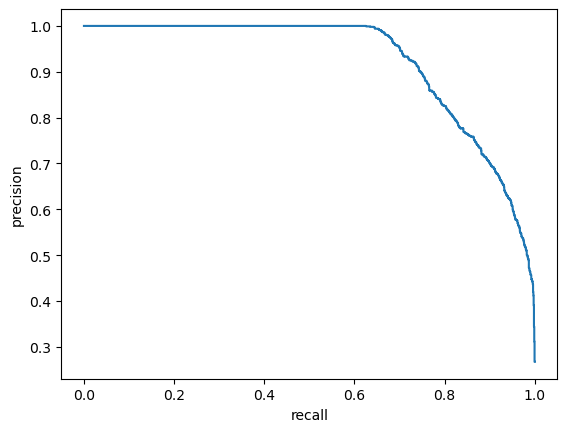

In [280]:
precision, recall, thresholds = precision_recall_curve(y_test, m_log_reg_kbin_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [281]:
auc(recall, precision)

0.9228994060226526

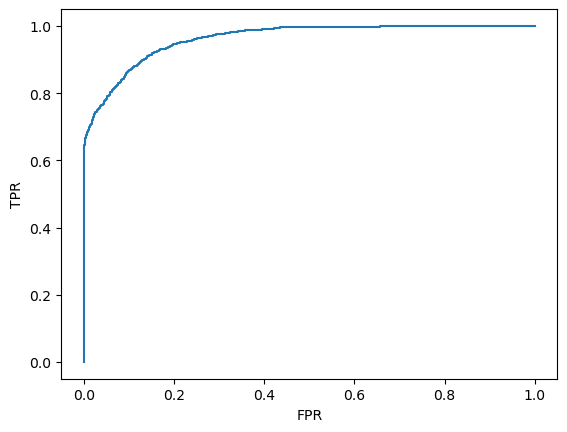

In [282]:
fpr, tpr, thresholds = roc_curve(y_test, m_log_reg_kbin_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## log reg + poly high + selectk

In [283]:
%%time


X = SelectKBest(k=2).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"penalty": ['l1', 'l2', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 300)}

searcher = GridSearchCV(LogisticRegression(random_state=88, multi_class="ovr"), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
log_reg_poly_high6_best_param = searcher.best_params_
log_reg_poly_high6_best_param

CPU times: user 16min 33s, sys: 8.43 s, total: 16min 41s
Wall time: 4min 10s


{'C': 1e-10, 'penalty': 'none'}

In [284]:
m_log_reg_poly_high_selectk_best_6 = Pipeline(steps=[("preprocessing", column_trans_poly_high), ("selectk", SelectKBest(k=2)), ("estimator", LogisticRegression(**log_reg_poly_high6_best_param, random_state=88))])
m_log_reg_poly_high_selectk_best_6.fit(X_train, y_train)

y_test_pred = m_log_reg_poly_high_selectk_best_6.predict(X_test)
y_train_pred = m_log_reg_poly_high_selectk_best_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


In [285]:
print(f"presicion: {precision_score(y_test, y_test_pred)}")
print(f"recall: {recall_score(y_test, y_test_pred)}")

presicion: 1.0
recall: 0.6724367509986684


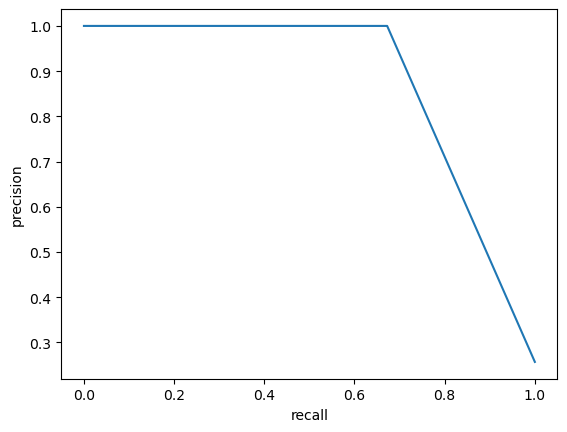

In [286]:
precision, recall, thresholds = precision_recall_curve(y_test, m_log_reg_poly_high_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [287]:
auc(recall, precision)

0.8782696575506163

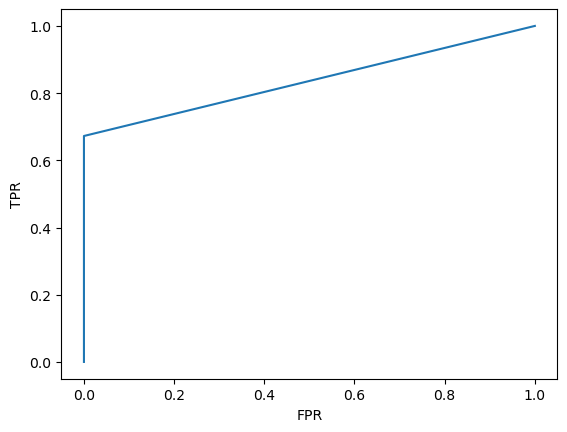

In [288]:
fpr, tpr, thresholds = roc_curve(y_test, m_log_reg_poly_high_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## forest + kbin + selectk

In [289]:
%%time


X = SelectKBest(k=60).fit_transform(column_trans_kbin.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"n_estimators": np.arange(25, 30), "max_depth": np.arange(1, 11), "max_features": np.linspace(0.001, 0.5, 4)}

searcher = GridSearchCV(RandomForestClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_kbin6_best_param = searcher.best_params_
forest_kbin6_best_param

CPU times: user 15min 15s, sys: 243 ms, total: 15min 15s
Wall time: 15min 15s


{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 25}

In [290]:
m_forest_kbin_selectk_best_6 = Pipeline(steps=[("preprocessing", column_trans_kbin), ("selectk", SelectKBest(k=60)), ("estimator", RandomForestClassifier(**forest_kbin6_best_param, random_state=88))])
m_forest_kbin_selectk_best_6.fit(X_train, y_train)

y_test_pred = m_forest_kbin_selectk_best_6.predict(X_test)
y_train_pred = m_forest_kbin_selectk_best_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.28404887023848674
  train: 0.22532028485964323

Accuracy score:
  test: 0.9193162393162393
  train: 0.9492307692307692


In [291]:
print(f"presicion: {precision_score(y_test, y_test_pred)}")
print(f"recall: {recall_score(y_test, y_test_pred)}")

presicion: 0.9614695340501792
recall: 0.7143808255659121


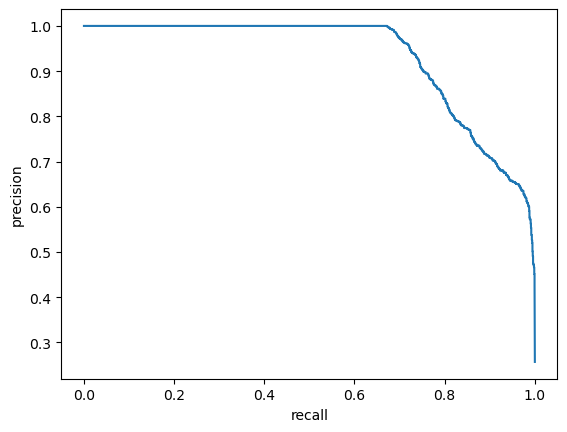

In [292]:
precision, recall, thresholds = precision_recall_curve(y_test, m_forest_kbin_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [293]:
auc(recall, precision)

0.9317592181677492

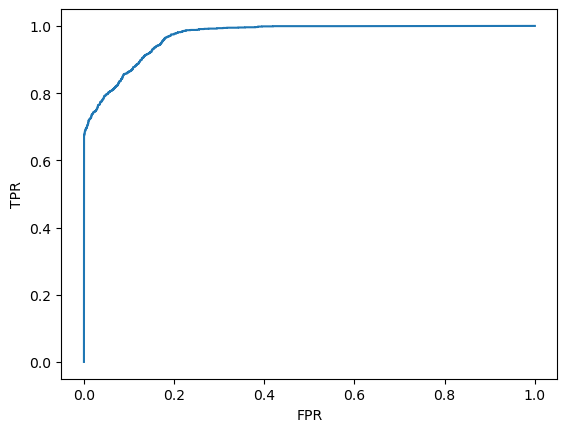

In [294]:
fpr, tpr, thresholds = roc_curve(y_test, m_forest_kbin_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## forest + poly low + selectk

In [295]:
%%time

X = SelectKBest(k=2).fit_transform(column_trans_poly_low.fit_transform(df.drop(["loan_status", "y_reg"], axis=1)), df.y_reg)


param_grid_tmp = {"n_estimators": np.arange(25, 30), "max_depth": np.arange(1, 11), "max_features": np.linspace(0.001, 0.5, 4)}

searcher = GridSearchCV(RandomForestClassifier(random_state=88), param_grid=param_grid_tmp, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, df.y_reg)
forest_poly_low6_best_param = searcher.best_params_
forest_poly_low6_best_param

CPU times: user 2min 20s, sys: 137 ms, total: 2min 20s
Wall time: 2min 20s


{'max_depth': 1, 'max_features': 0.001, 'n_estimators': 25}

In [296]:
m_forest_poly_low_selectk_best_6 = Pipeline(steps=[("preprocessing", column_trans_poly_low), ("selectk", SelectKBest(k=2)), ("estimator", RandomForestClassifier(**forest_poly_low6_best_param, random_state=88))])
m_forest_poly_low_selectk_best_6.fit(X_train, y_train)

y_test_pred = m_forest_poly_low_selectk_best_6.predict(X_test)
y_train_pred = m_forest_poly_low_selectk_best_6.predict(X_train)

score_clf(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.2900044208327937
  train: 0.28310160746014873

Accuracy score:
  test: 0.9158974358974359
  train: 0.9198534798534799


In [297]:
print(f"presicion: {precision_score(y_test, y_test_pred)}")
print(f"recall: {recall_score(y_test, y_test_pred)}")

presicion: 1.0
recall: 0.6724367509986684


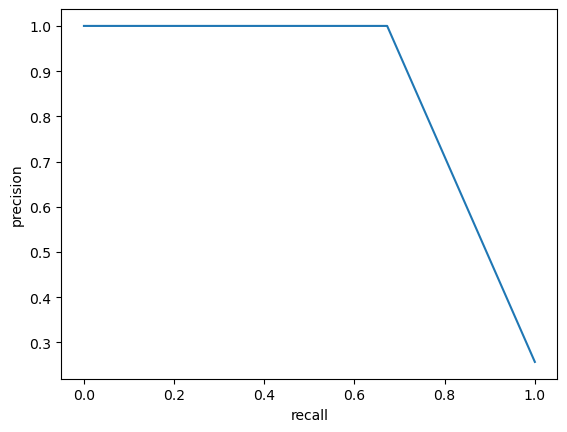

In [298]:
precision, recall, thresholds = precision_recall_curve(y_test, m_forest_poly_low_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [299]:
auc(recall, precision)

0.8782696575506163

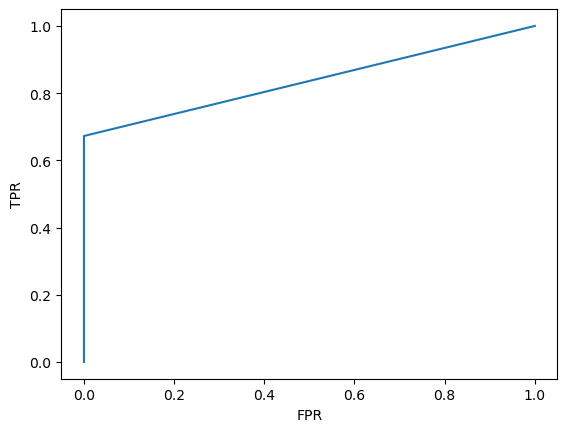

In [300]:
fpr, tpr, thresholds = roc_curve(y_test, m_forest_poly_low_selectk_best_6.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 7. Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `ЕКЗ_Прізвище_Ім'я.ipynb`. Окремо додати файли `predictions_reg.csv` та `predictions_clf.csv`.


In [301]:
time_end = time.time()

In [303]:
time_real_6 = time.strftime("%H:%M:%S", time.gmtime(time_end - time_4))


send_message(f'Час виконання 6 завдання (clf завершено): {time_real_6}')

In [304]:
time_real = time.strftime("%H:%M:%S", time.gmtime(time_end - time_st))


send_message(f'Програма завершила виконання.\nЧас виконання всієї програми: {time_real}')